In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
    
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
sheet_names = ['MLR', 'DT', 'RF', 'KNN', 'SVM']
x_ticks = ['MLR train R', 'MLR test R', 'DT train R', 'DT test R', 'RF train R', 'RF test R', 'KNN train R', 'KNN test R', 'SVM train R', 'SVM test R']
random_states = [15, 28, 42]

In [3]:
def prepare_histogram_data(target_name, max_number_of_features):
    
    excel_files = []
    
    for name in glob.glob('../Data/Quality_'+str(target_name)+'*'):
        excel_files.append(name)
        
    random_state_15 = []
    random_state_28 = []
    random_state_42 = []
    features_15 = []
    features_28 = []
    features_42 = []
    random_states = [15, 28, 42]
    
    for random_state in range(len(random_states)):
        tmp = []
        to_plot = []
        values = []
        number_of_features = []
        for sheet in sheet_names:
            tmp.append(pd.read_excel(excel_files[random_state], sheet_name=sheet))
        for data in tmp:
            temp = data[data['Number of features'] <= max_number_of_features]
            to_plot.append(temp[temp['Test data R^2 score'] == max(temp['Test data R^2 score'])])
        for value in to_plot:
            values.append(value['Training data R^2 score'].tail(1))
            values.append(value['Test data R^2 score'].tail(1))
            number_of_features.append(value['Number of features'].tail(1))
        for element in values:
            if random_state == 0:
                random_state_15.append(float(element))
            elif random_state == 1:
                random_state_28.append(float(element))                      
            elif random_state == 2:
                random_state_42.append(float(element))
            else:
                print("Error with conditions...")
                
        for features in number_of_features:
            if random_state == 0:
                features_15.append(float(features))
            elif random_state == 1:
                features_28.append(float(features))                      
            elif random_state == 2:
                features_42.append(float(features))
            else:
                print("Error with conditions...")
        
                
    return  random_state_15, random_state_28, random_state_42, features_15, features_28, features_42

In [4]:
def handle_negative_corr(list_):
    res = []
    for element in list_:
        if element < 0:
            res.append(0.01)
        else:
            res.append(np.sqrt(element))
    return res

In [5]:
def prepare_plot(data, name, max_number_of_features):

    fig = plt.figure(figsize=(20,10))
    X = x_ticks
    y_15 = handle_negative_corr(data[0])
    y_28 = handle_negative_corr(data[1])
    y_42 = handle_negative_corr(data[2])

    X_axis = np.arange(len(X))
    y_ax = [x/100 for x in range(0, 105, 5)]
    plt.yticks(y_ax)
    plt.bar(X_axis - 0.2, y_15, 0.2, label = 'Random state 15')
    plt.bar(X_axis + 0.0, y_28, 0.2, label = 'Random state 28')
    plt.bar(X_axis + 0.2, y_42, 0.2, label = 'Random state 42')

    plt.xticks(X_axis, X, weight='bold', fontsize=14)
    plt.xlabel("Methodology", fontsize=20, weight='bold')
    plt.ylabel("Correlation coefficient", fontsize=18, weight='bold')
    plt.ylim([0.0, 1.0])
    plt.title("Quality of each methodology - "+str(name)+' '+str('max number of features: '+str(max_number_of_features)), fontsize=24, weight='bold')
    plt.grid(visible=True)
    plt.legend()
    plt.savefig('Figures/'+'_'+str(name)+'_'+str(max_number_of_features)+'_'+'.pdf', bbox_inches='tight') #new line
    plt.show()
    for i, state in enumerate(random_states):
        print('Random state - '+str(state)+' '+str(update_description(sheet_names, data[i+3])))

In [6]:
def update_description(x_axis_labels, number_of_features):
    
    MLR = str(x_axis_labels[0])+' - number of features used: '+str(number_of_features[0])
    DT = str(x_axis_labels[1])+' - number of features used: '+str(number_of_features[1])
    RF = str(x_axis_labels[2])+' - number of features used: '+str(number_of_features[2])
    KNN = str(x_axis_labels[3])+' - number of features used: '+str(number_of_features[3])
    SVM = str(x_axis_labels[4])+' - number of features used: '+str(number_of_features[4])
    
    return MLR, DT, RF, KNN, SVM
    

## A549

In [7]:
a549 = prepare_histogram_data('A549', 8)

In [8]:
a549

([0.4280888527210002,
  0.6266334128725354,
  0.8466334342142815,
  0.7153113378079368,
  0.9249742021818756,
  0.7525559593594799,
  0.5819621881074415,
  0.8307821665232054,
  0.4153462878154097,
  0.5885571370707737],
 [0.538457470613332,
  0.4261368142722509,
  0.8170806259589886,
  0.4076872049316587,
  0.8930162932196327,
  0.800771797336556,
  0.6790766967915924,
  0.1008539619720636,
  0.4984934257197747,
  0.4089742856265142],
 [0.4548140725424477,
  0.4923632130931052,
  0.8796761209043098,
  0.5671139561031637,
  0.9141127094423355,
  0.5770141099401139,
  0.575237291235299,
  0.4548654061537126,
  0.4142337951213418,
  0.4458030446072588],
 [3.0, 5.0, 8.0, 8.0, 5.0],
 [8.0, 7.0, 8.0, 8.0, 8.0],
 [3.0, 8.0, 7.0, 3.0, 3.0])

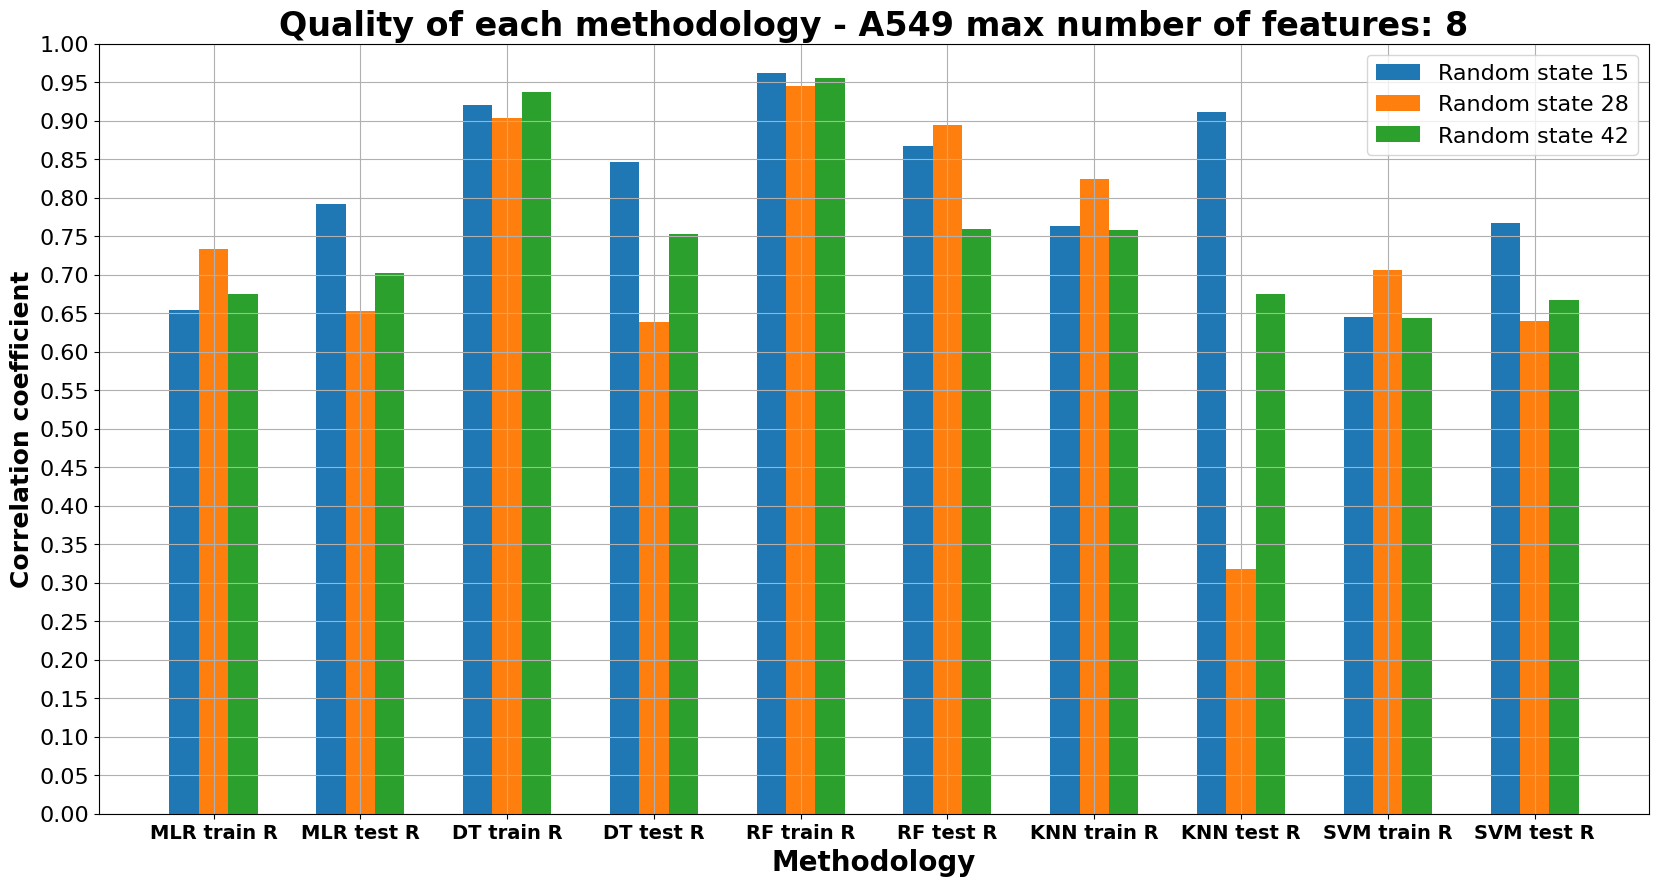

Random state - 15 ('MLR - number of features used: 3.0', 'DT - number of features used: 5.0', 'RF - number of features used: 8.0', 'KNN - number of features used: 8.0', 'SVM - number of features used: 5.0')
Random state - 28 ('MLR - number of features used: 8.0', 'DT - number of features used: 7.0', 'RF - number of features used: 8.0', 'KNN - number of features used: 8.0', 'SVM - number of features used: 8.0')
Random state - 42 ('MLR - number of features used: 3.0', 'DT - number of features used: 8.0', 'RF - number of features used: 7.0', 'KNN - number of features used: 3.0', 'SVM - number of features used: 3.0')


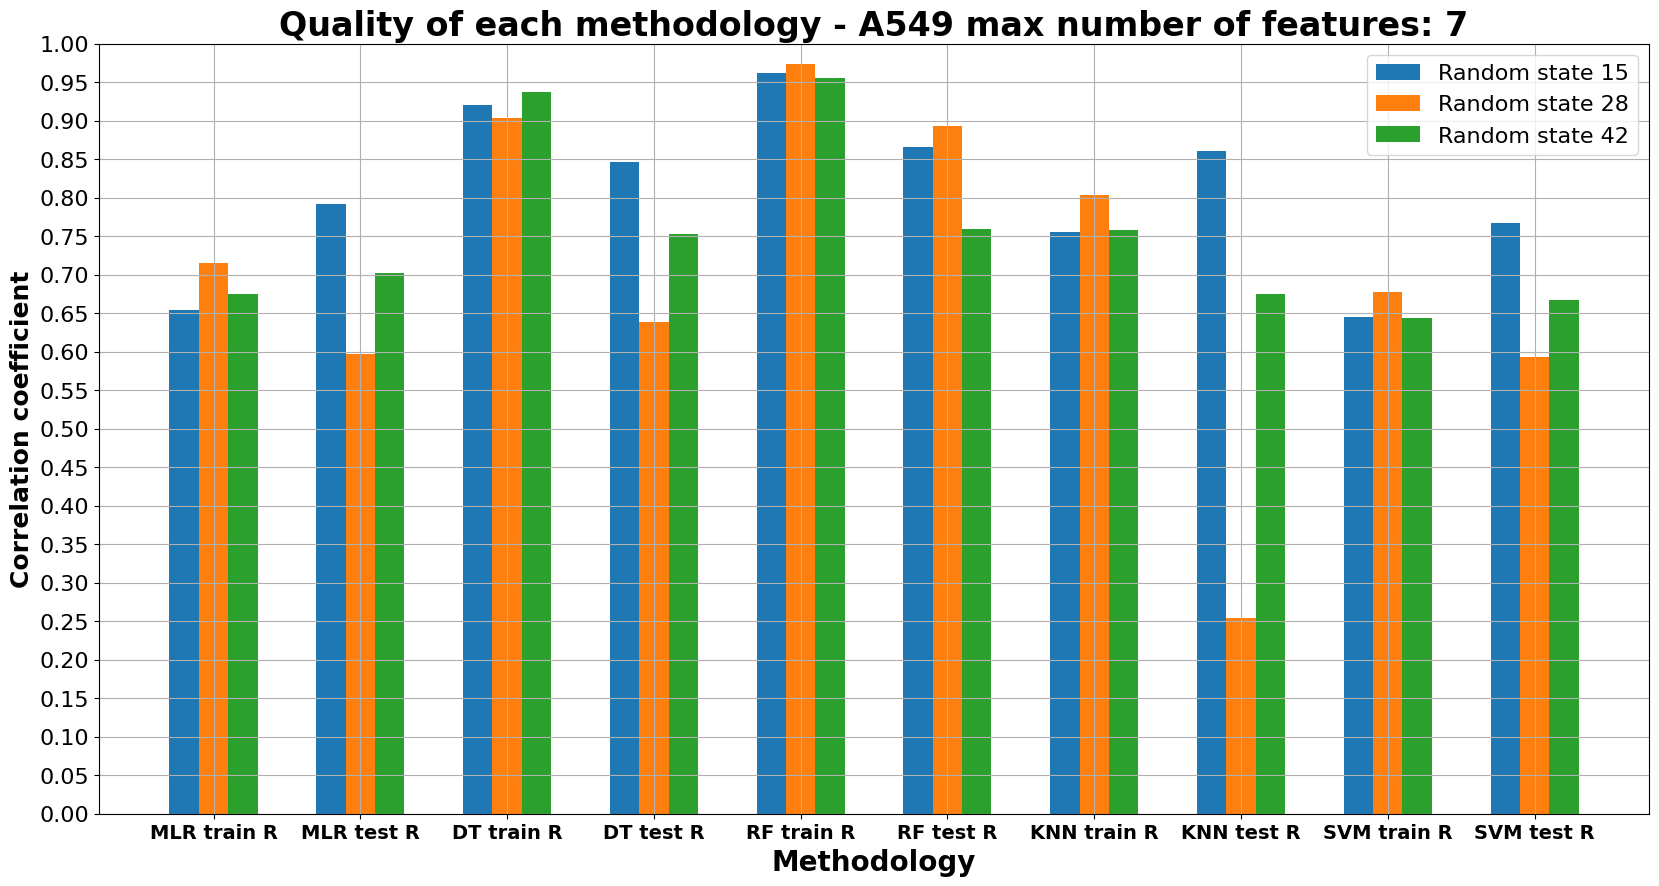

Random state - 15 ('MLR - number of features used: 3.0', 'DT - number of features used: 5.0', 'RF - number of features used: 7.0', 'KNN - number of features used: 7.0', 'SVM - number of features used: 5.0')
Random state - 28 ('MLR - number of features used: 7.0', 'DT - number of features used: 7.0', 'RF - number of features used: 7.0', 'KNN - number of features used: 7.0', 'SVM - number of features used: 7.0')
Random state - 42 ('MLR - number of features used: 3.0', 'DT - number of features used: 7.0', 'RF - number of features used: 7.0', 'KNN - number of features used: 3.0', 'SVM - number of features used: 3.0')


Random state - 15 ('MLR - number of features used: 3.0', 'DT - number of features used: 5.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 5.0', 'SVM - number of features used: 5.0')
Random state - 28 ('MLR - number of features used: 4.0', 'DT - number of features used: 4.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 5.0', 'SVM - number of features used: 5.0')
Random state - 42 ('MLR - number of features used: 3.0', 'DT - number of features used: 5.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 3.0', 'SVM - number of features used: 3.0')


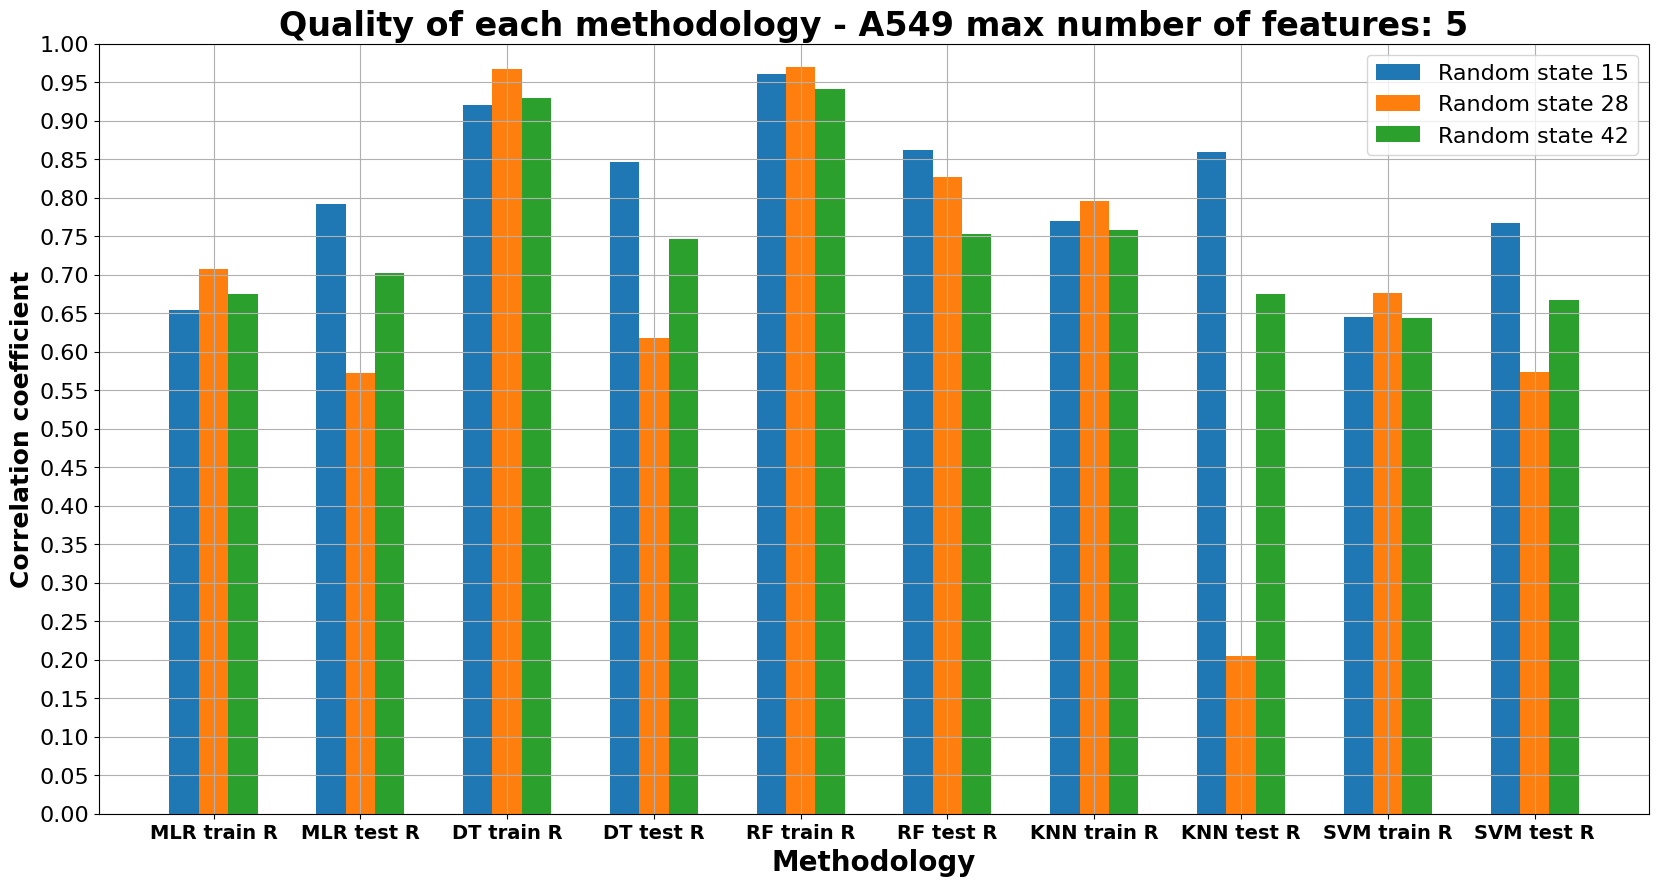

Random state - 15 ('MLR - number of features used: 3.0', 'DT - number of features used: 5.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 5.0', 'SVM - number of features used: 5.0')
Random state - 28 ('MLR - number of features used: 4.0', 'DT - number of features used: 4.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 5.0', 'SVM - number of features used: 5.0')
Random state - 42 ('MLR - number of features used: 3.0', 'DT - number of features used: 5.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 3.0', 'SVM - number of features used: 3.0')


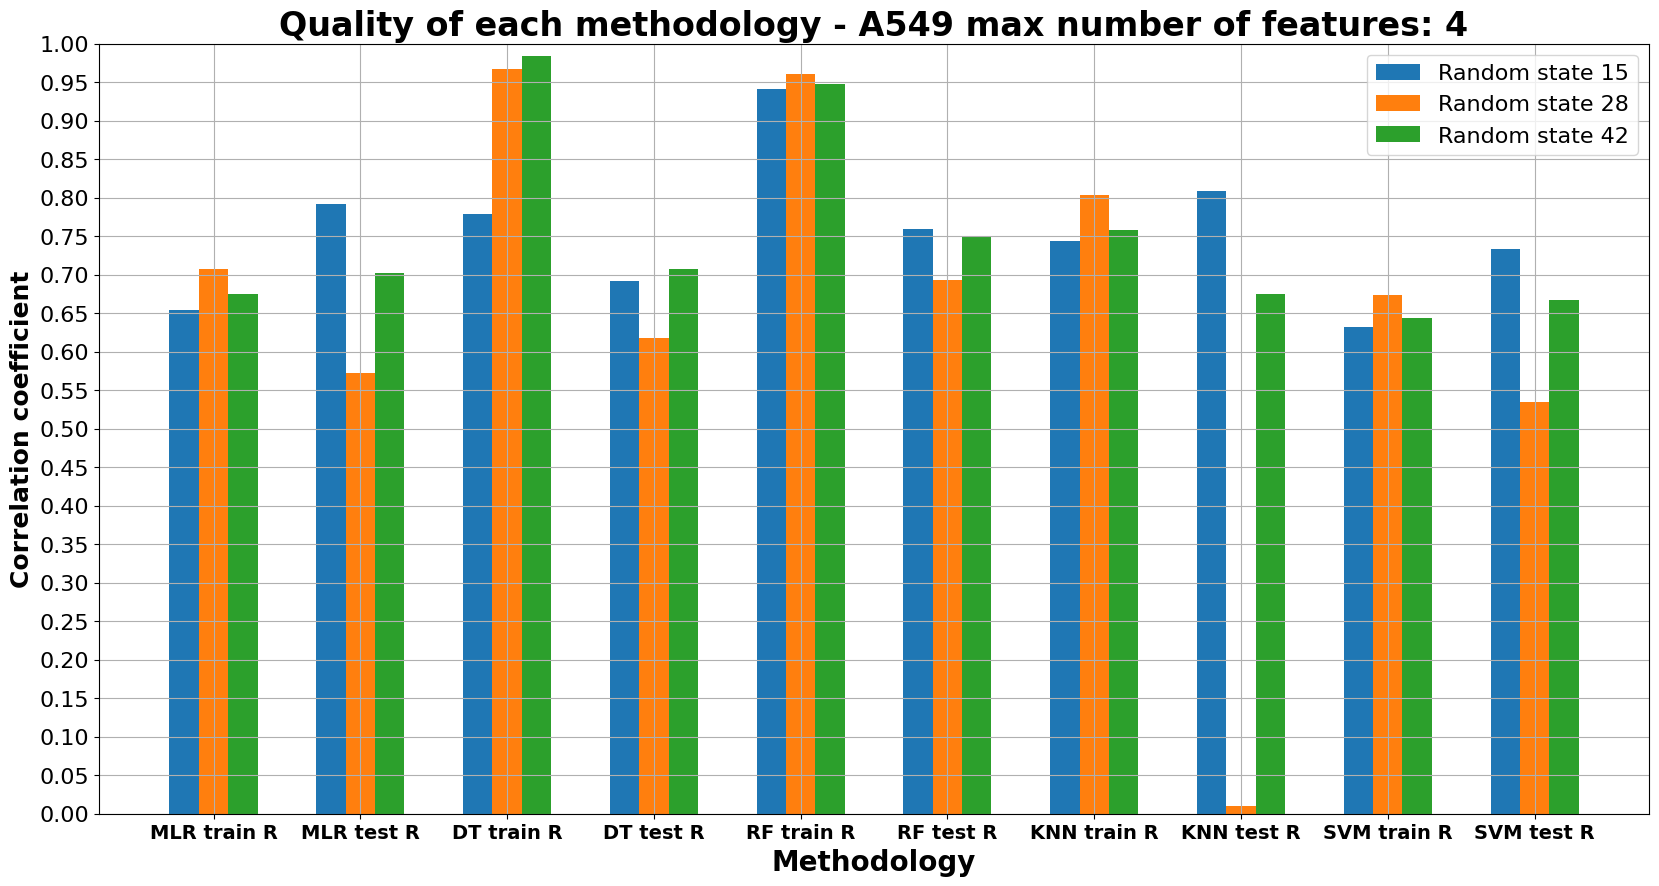

Random state - 15 ('MLR - number of features used: 3.0', 'DT - number of features used: 3.0', 'RF - number of features used: 4.0', 'KNN - number of features used: 3.0', 'SVM - number of features used: 3.0')
Random state - 28 ('MLR - number of features used: 4.0', 'DT - number of features used: 4.0', 'RF - number of features used: 4.0', 'KNN - number of features used: 4.0', 'SVM - number of features used: 4.0')
Random state - 42 ('MLR - number of features used: 3.0', 'DT - number of features used: 3.0', 'RF - number of features used: 3.0', 'KNN - number of features used: 3.0', 'SVM - number of features used: 3.0')


In [9]:
for i in range(8, 3, -1):
    a549 = prepare_histogram_data('A549', i)
    prepare_plot(a549, 'A549', i)

## MCF-7

Random state - 15 ('MLR - number of features used: 8.0', 'DT - number of features used: 6.0', 'RF - number of features used: 8.0', 'KNN - number of features used: 8.0', 'SVM - number of features used: 4.0')
Random state - 28 ('MLR - number of features used: 6.0', 'DT - number of features used: 4.0', 'RF - number of features used: 8.0', 'KNN - number of features used: 6.0', 'SVM - number of features used: 8.0')
Random state - 42 ('MLR - number of features used: 4.0', 'DT - number of features used: 8.0', 'RF - number of features used: 8.0', 'KNN - number of features used: 6.0', 'SVM - number of features used: 4.0')


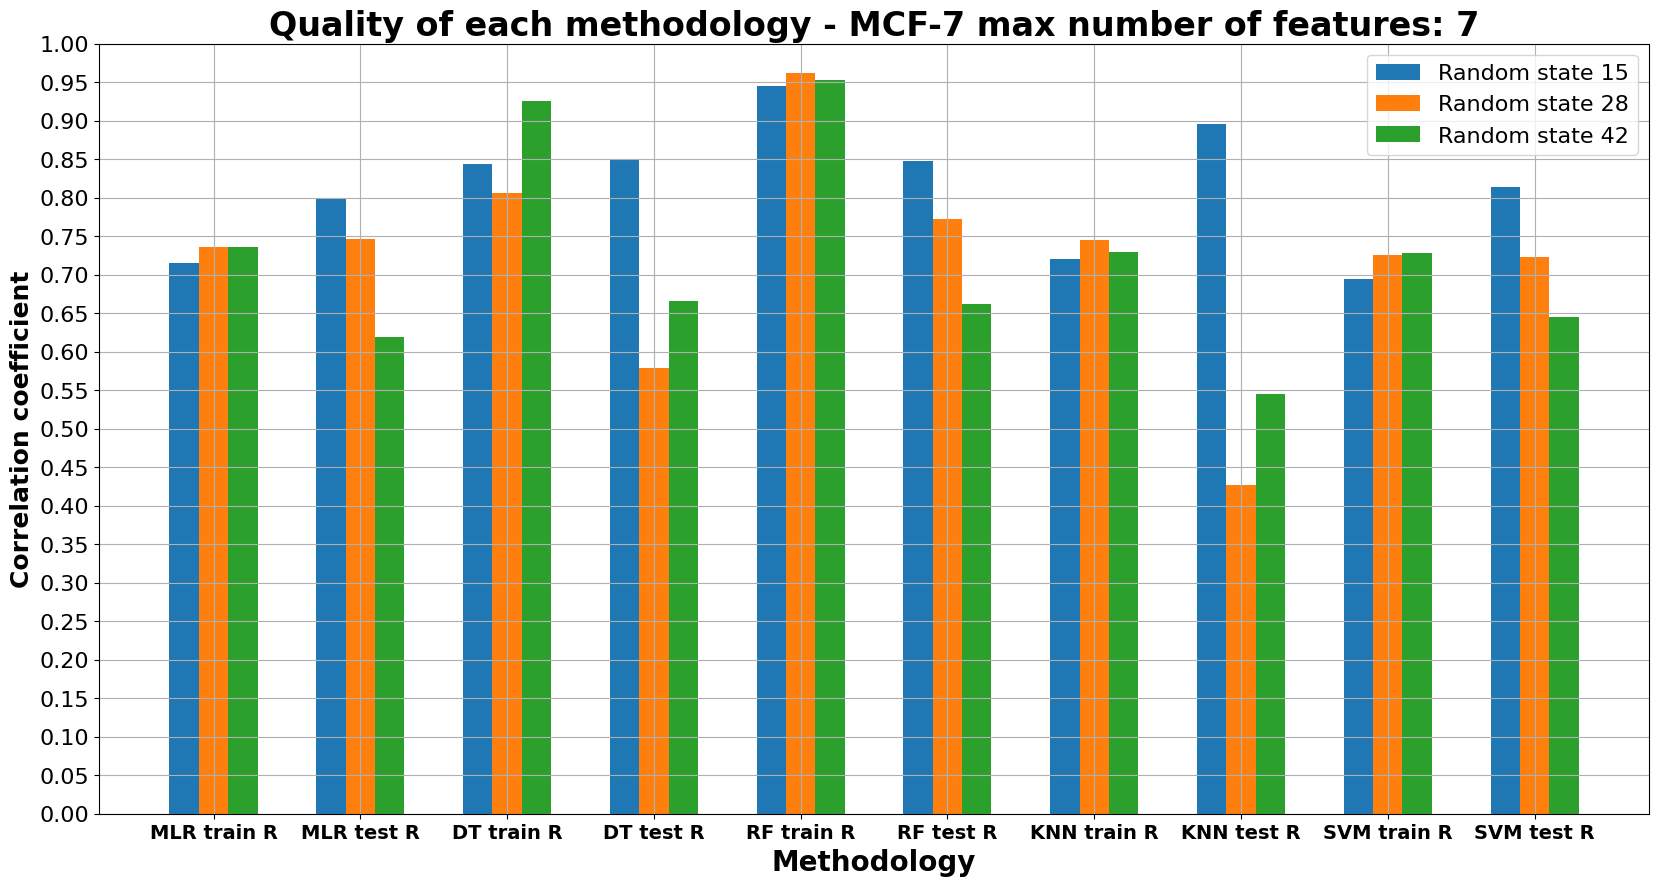

Random state - 15 ('MLR - number of features used: 6.0', 'DT - number of features used: 6.0', 'RF - number of features used: 6.0', 'KNN - number of features used: 6.0', 'SVM - number of features used: 4.0')
Random state - 28 ('MLR - number of features used: 6.0', 'DT - number of features used: 4.0', 'RF - number of features used: 6.0', 'KNN - number of features used: 6.0', 'SVM - number of features used: 6.0')
Random state - 42 ('MLR - number of features used: 4.0', 'DT - number of features used: 6.0', 'RF - number of features used: 6.0', 'KNN - number of features used: 6.0', 'SVM - number of features used: 4.0')


Random state - 15 ('MLR - number of features used: 6.0', 'DT - number of features used: 6.0', 'RF - number of features used: 6.0', 'KNN - number of features used: 6.0', 'SVM - number of features used: 4.0')
Random state - 28 ('MLR - number of features used: 6.0', 'DT - number of features used: 4.0', 'RF - number of features used: 6.0', 'KNN - number of features used: 6.0', 'SVM - number of features used: 6.0')
Random state - 42 ('MLR - number of features used: 4.0', 'DT - number of features used: 6.0', 'RF - number of features used: 6.0', 'KNN - number of features used: 6.0', 'SVM - number of features used: 4.0')


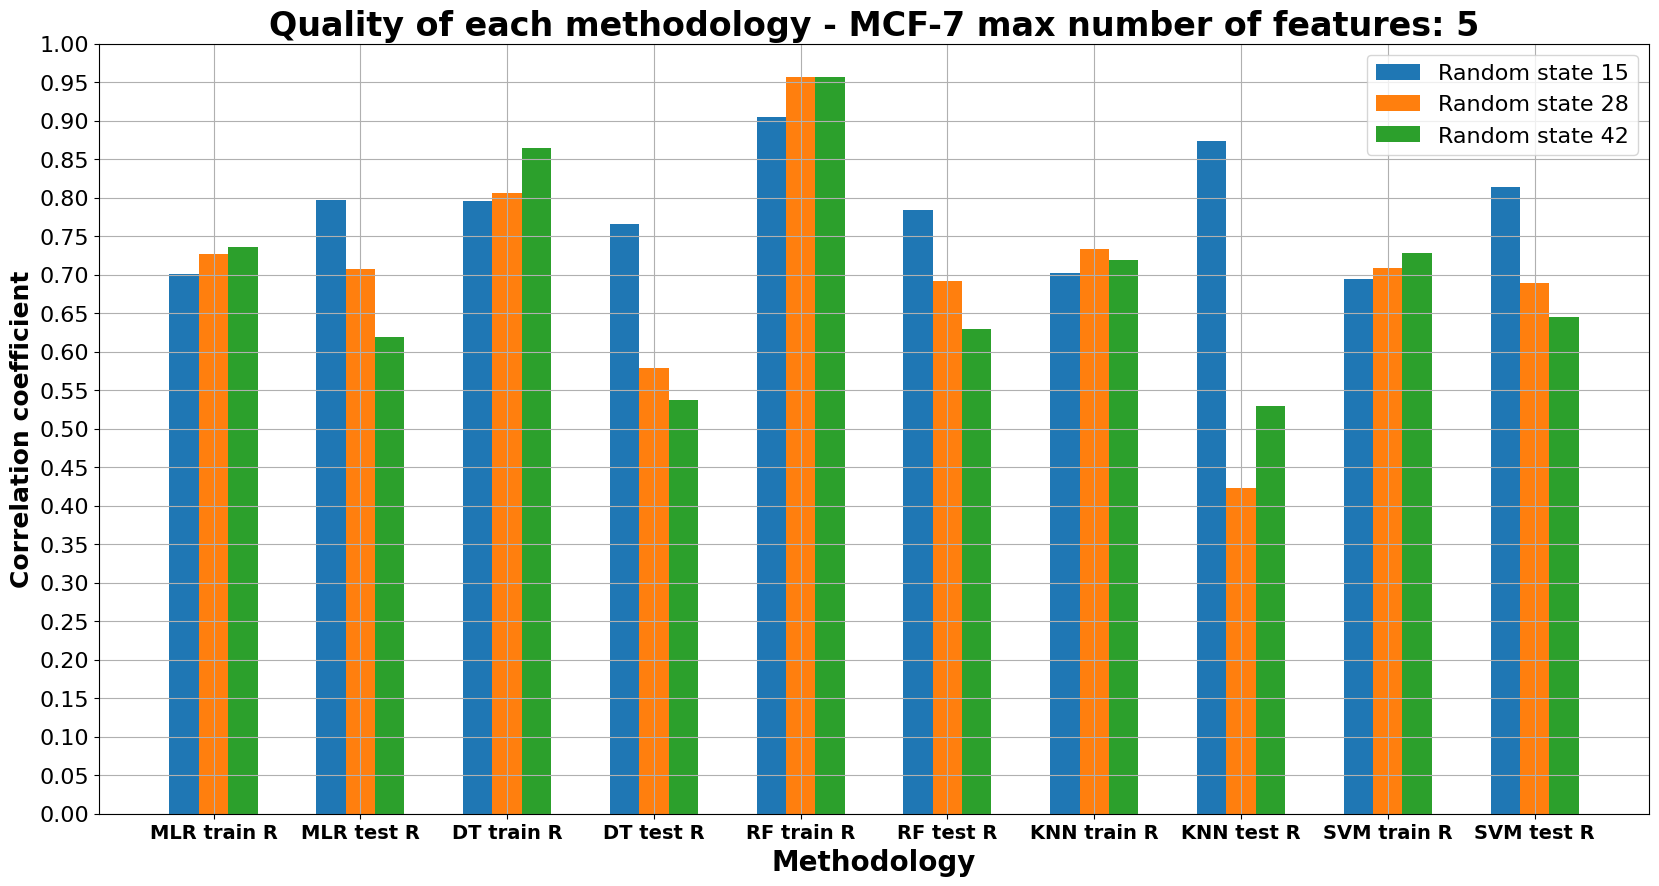

Random state - 15 ('MLR - number of features used: 4.0', 'DT - number of features used: 4.0', 'RF - number of features used: 4.0', 'KNN - number of features used: 4.0', 'SVM - number of features used: 4.0')
Random state - 28 ('MLR - number of features used: 4.0', 'DT - number of features used: 4.0', 'RF - number of features used: 4.0', 'KNN - number of features used: 4.0', 'SVM - number of features used: 4.0')
Random state - 42 ('MLR - number of features used: 4.0', 'DT - number of features used: 4.0', 'RF - number of features used: 4.0', 'KNN - number of features used: 4.0', 'SVM - number of features used: 4.0')


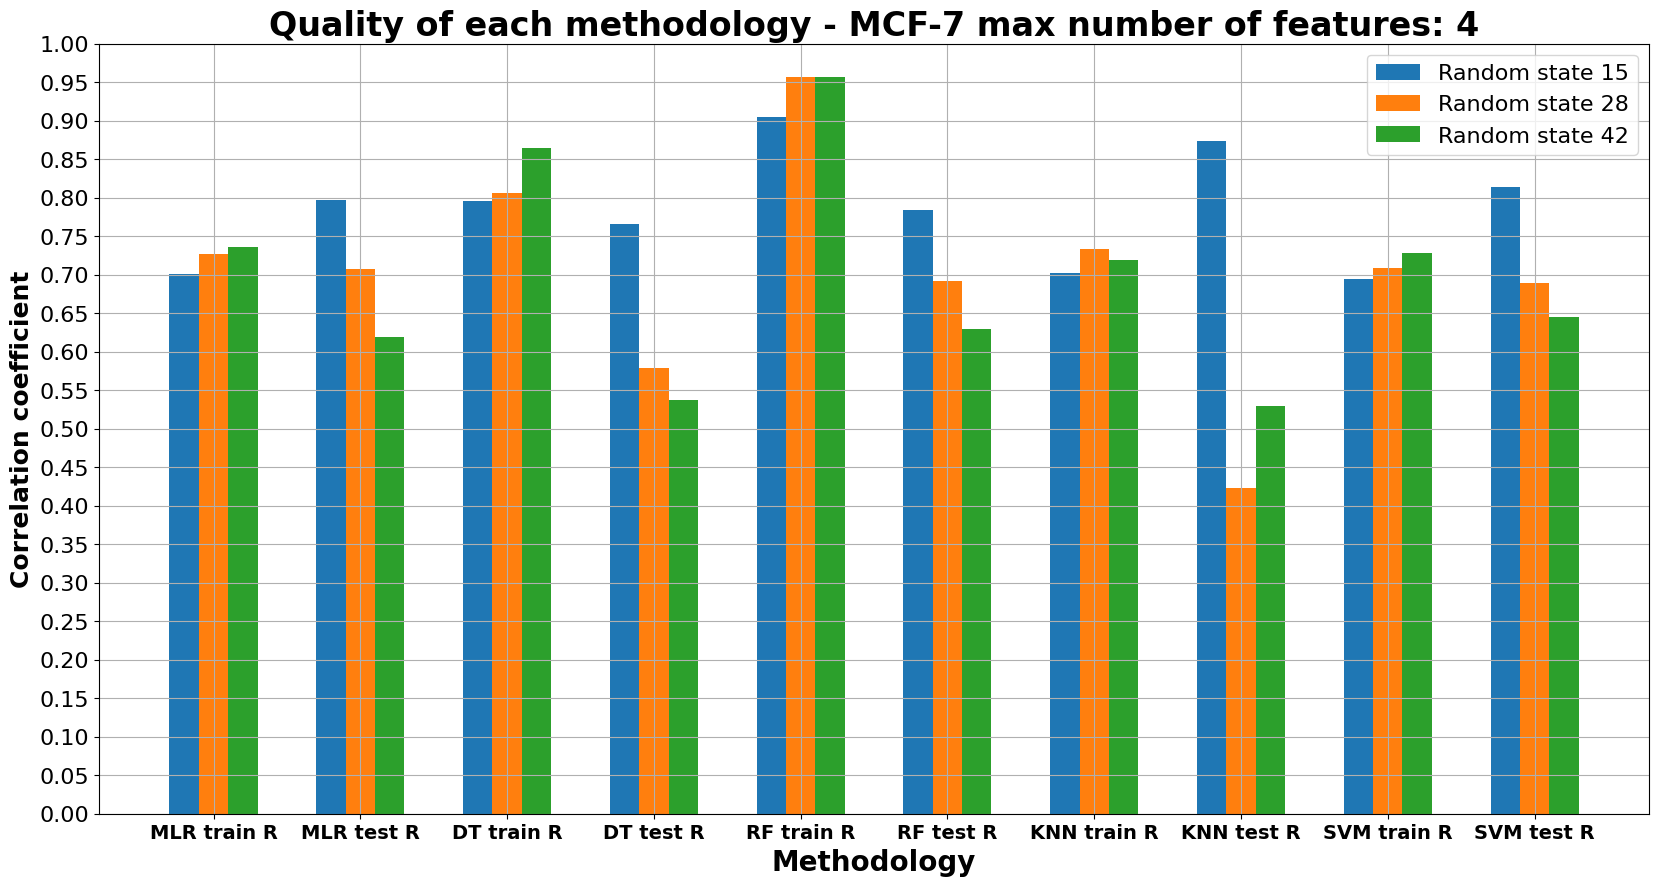

Random state - 15 ('MLR - number of features used: 4.0', 'DT - number of features used: 4.0', 'RF - number of features used: 4.0', 'KNN - number of features used: 4.0', 'SVM - number of features used: 4.0')
Random state - 28 ('MLR - number of features used: 4.0', 'DT - number of features used: 4.0', 'RF - number of features used: 4.0', 'KNN - number of features used: 4.0', 'SVM - number of features used: 4.0')
Random state - 42 ('MLR - number of features used: 4.0', 'DT - number of features used: 4.0', 'RF - number of features used: 4.0', 'KNN - number of features used: 4.0', 'SVM - number of features used: 4.0')


In [10]:
for i in range(8, 3, -1):
    mcf7 = prepare_histogram_data('MCF-7', i)
    prepare_plot(mcf7, 'MCF-7', i)

## LoVo

Random state - 15 ('MLR - number of features used: 6.0', 'DT - number of features used: 7.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 5.0', 'SVM - number of features used: 6.0')
Random state - 28 ('MLR - number of features used: 2.0', 'DT - number of features used: 3.0', 'RF - number of features used: 7.0', 'KNN - number of features used: 7.0', 'SVM - number of features used: 2.0')
Random state - 42 ('MLR - number of features used: 3.0', 'DT - number of features used: 3.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 5.0', 'SVM - number of features used: 2.0')


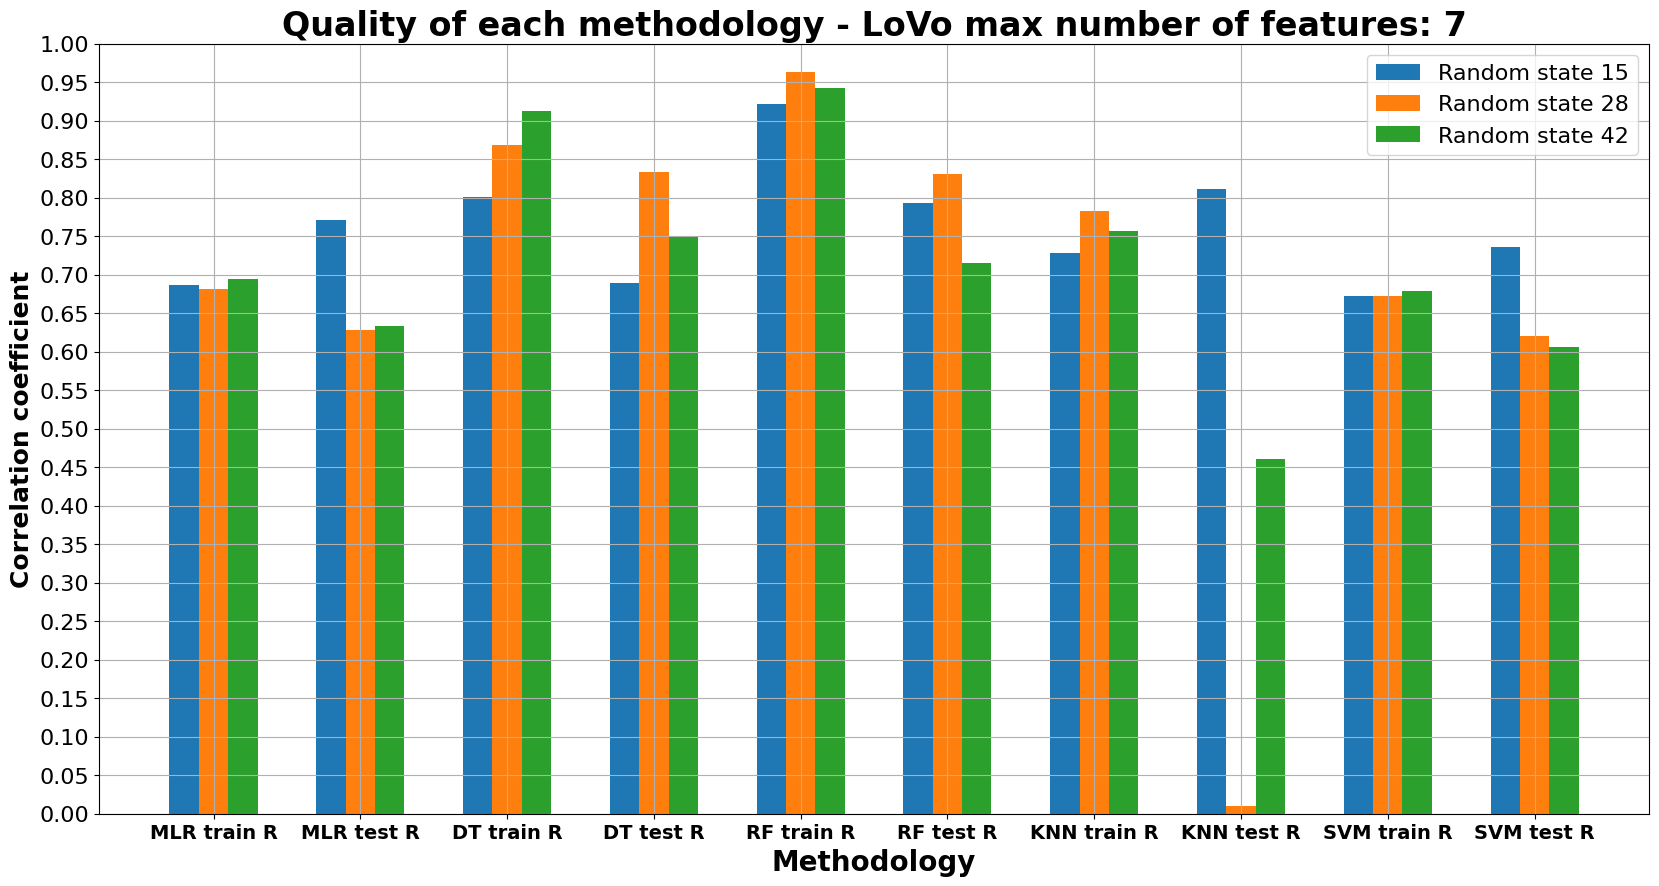

Random state - 15 ('MLR - number of features used: 6.0', 'DT - number of features used: 7.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 5.0', 'SVM - number of features used: 6.0')
Random state - 28 ('MLR - number of features used: 2.0', 'DT - number of features used: 3.0', 'RF - number of features used: 7.0', 'KNN - number of features used: 7.0', 'SVM - number of features used: 2.0')
Random state - 42 ('MLR - number of features used: 3.0', 'DT - number of features used: 3.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 5.0', 'SVM - number of features used: 2.0')


Random state - 15 ('MLR - number of features used: 6.0', 'DT - number of features used: 6.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 5.0', 'SVM - number of features used: 6.0')
Random state - 28 ('MLR - number of features used: 2.0', 'DT - number of features used: 3.0', 'RF - number of features used: 6.0', 'KNN - number of features used: 2.0', 'SVM - number of features used: 2.0')
Random state - 42 ('MLR - number of features used: 3.0', 'DT - number of features used: 3.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 5.0', 'SVM - number of features used: 2.0')


Random state - 15 ('MLR - number of features used: 5.0', 'DT - number of features used: 5.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 5.0', 'SVM - number of features used: 5.0')
Random state - 28 ('MLR - number of features used: 2.0', 'DT - number of features used: 3.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 2.0', 'SVM - number of features used: 2.0')
Random state - 42 ('MLR - number of features used: 3.0', 'DT - number of features used: 3.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 5.0', 'SVM - number of features used: 2.0')


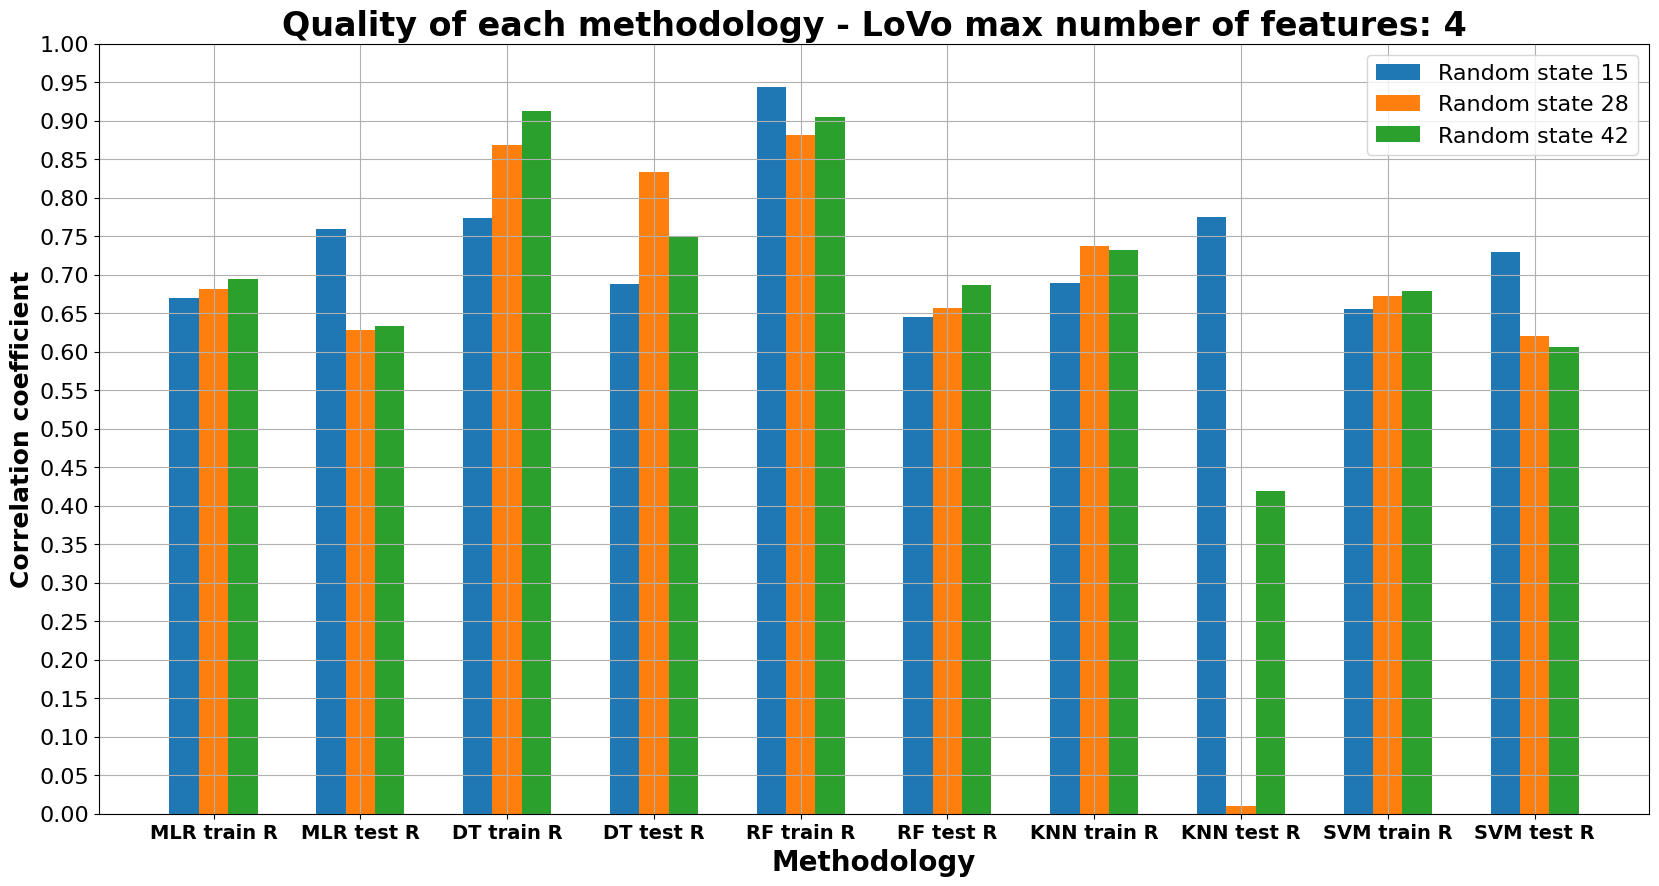

Random state - 15 ('MLR - number of features used: 3.0', 'DT - number of features used: 3.0', 'RF - number of features used: 3.0', 'KNN - number of features used: 2.0', 'SVM - number of features used: 2.0')
Random state - 28 ('MLR - number of features used: 2.0', 'DT - number of features used: 3.0', 'RF - number of features used: 2.0', 'KNN - number of features used: 2.0', 'SVM - number of features used: 2.0')
Random state - 42 ('MLR - number of features used: 3.0', 'DT - number of features used: 3.0', 'RF - number of features used: 2.0', 'KNN - number of features used: 2.0', 'SVM - number of features used: 2.0')


Random state - 15 ('MLR - number of features used: 3.0', 'DT - number of features used: 3.0', 'RF - number of features used: 3.0', 'KNN - number of features used: 2.0', 'SVM - number of features used: 2.0')
Random state - 28 ('MLR - number of features used: 2.0', 'DT - number of features used: 3.0', 'RF - number of features used: 2.0', 'KNN - number of features used: 2.0', 'SVM - number of features used: 2.0')
Random state - 42 ('MLR - number of features used: 3.0', 'DT - number of features used: 3.0', 'RF - number of features used: 2.0', 'KNN - number of features used: 2.0', 'SVM - number of features used: 2.0')


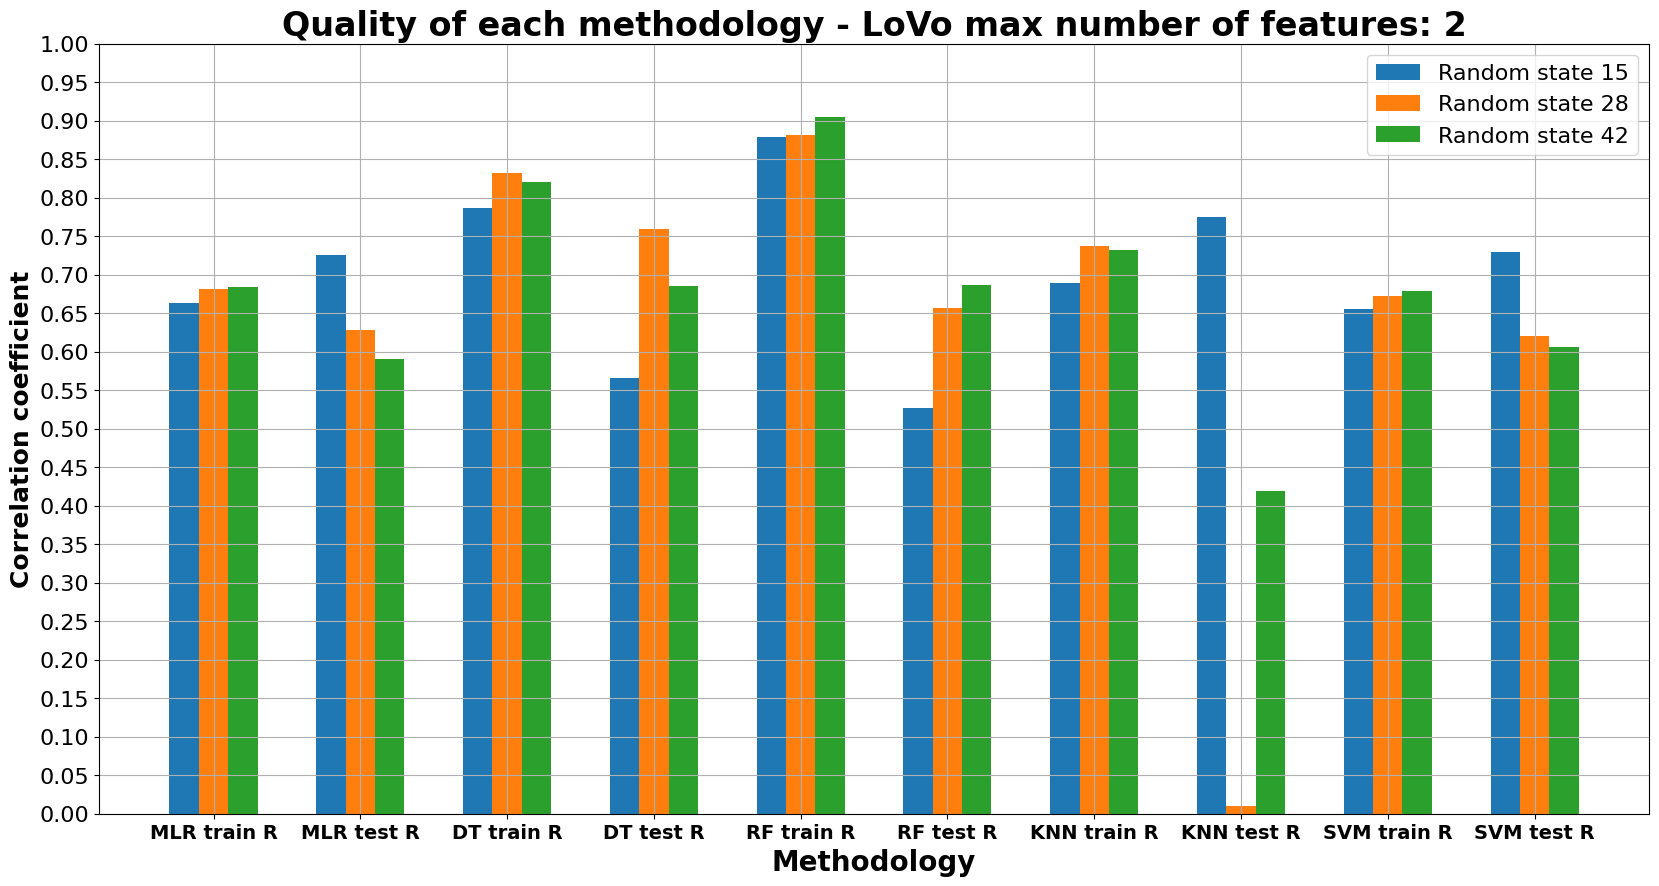

Random state - 15 ('MLR - number of features used: 2.0', 'DT - number of features used: 2.0', 'RF - number of features used: 2.0', 'KNN - number of features used: 2.0', 'SVM - number of features used: 2.0')
Random state - 28 ('MLR - number of features used: 2.0', 'DT - number of features used: 2.0', 'RF - number of features used: 2.0', 'KNN - number of features used: 2.0', 'SVM - number of features used: 2.0')
Random state - 42 ('MLR - number of features used: 2.0', 'DT - number of features used: 2.0', 'RF - number of features used: 2.0', 'KNN - number of features used: 2.0', 'SVM - number of features used: 2.0')


In [11]:
for i in range(8, 1, -1): # 2 -> 1
    lovo = prepare_histogram_data('LoVo', i)
    prepare_plot(lovo, 'LoVo', i)

## LoVo/DX

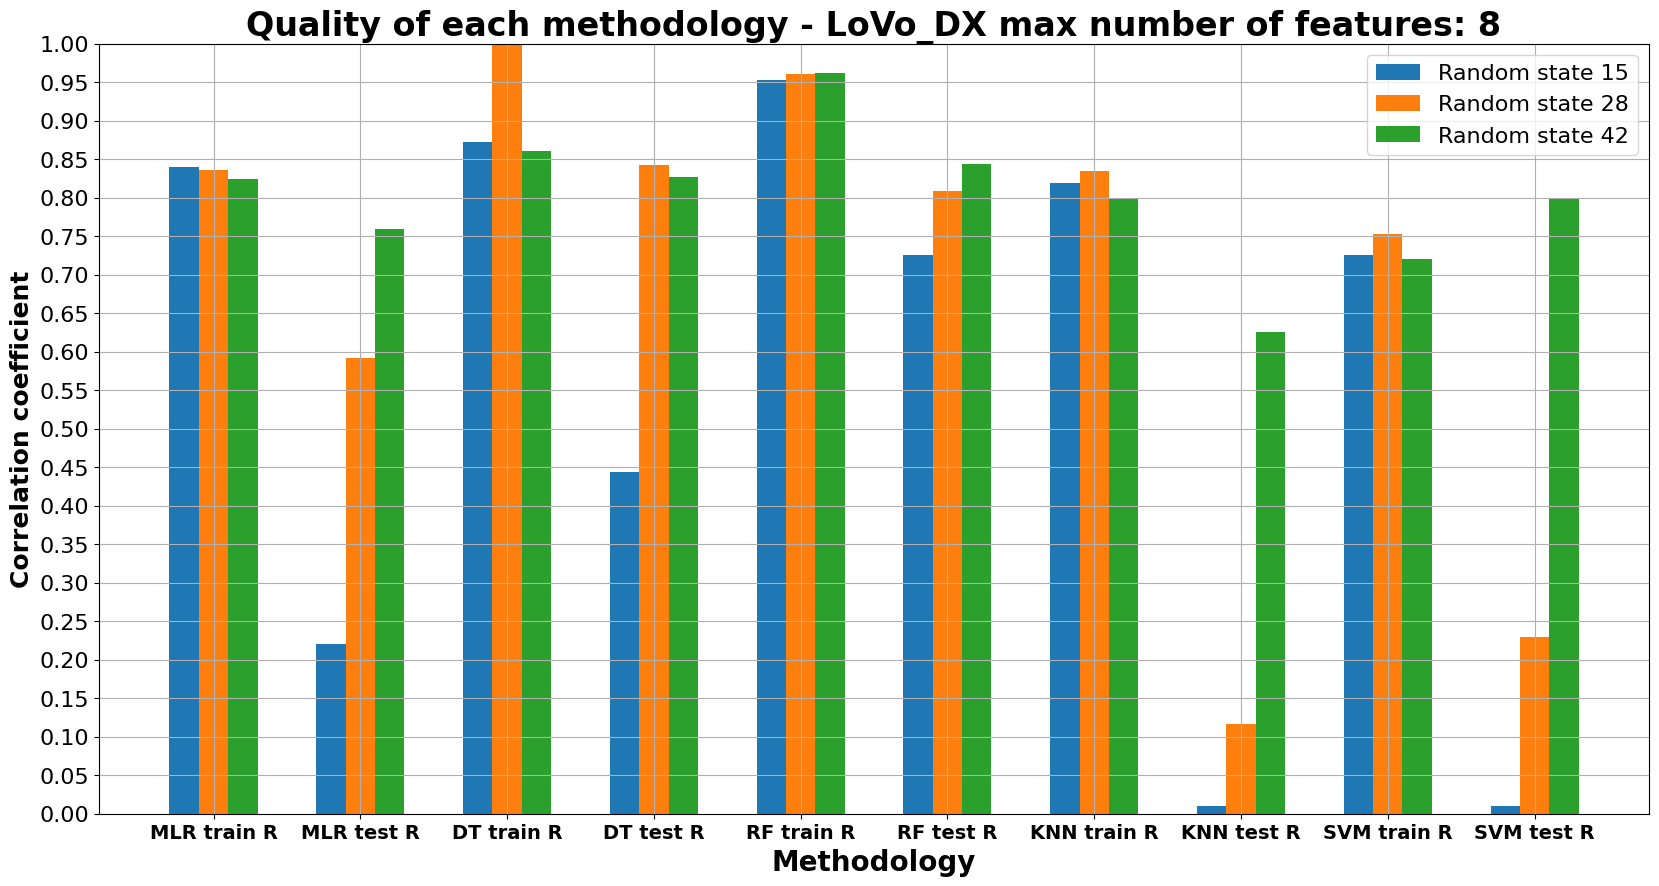

Random state - 15 ('MLR - number of features used: 8.0', 'DT - number of features used: 7.0', 'RF - number of features used: 8.0', 'KNN - number of features used: 7.0', 'SVM - number of features used: 5.0')
Random state - 28 ('MLR - number of features used: 7.0', 'DT - number of features used: 5.0', 'RF - number of features used: 8.0', 'KNN - number of features used: 8.0', 'SVM - number of features used: 8.0')
Random state - 42 ('MLR - number of features used: 8.0', 'DT - number of features used: 7.0', 'RF - number of features used: 7.0', 'KNN - number of features used: 7.0', 'SVM - number of features used: 8.0')


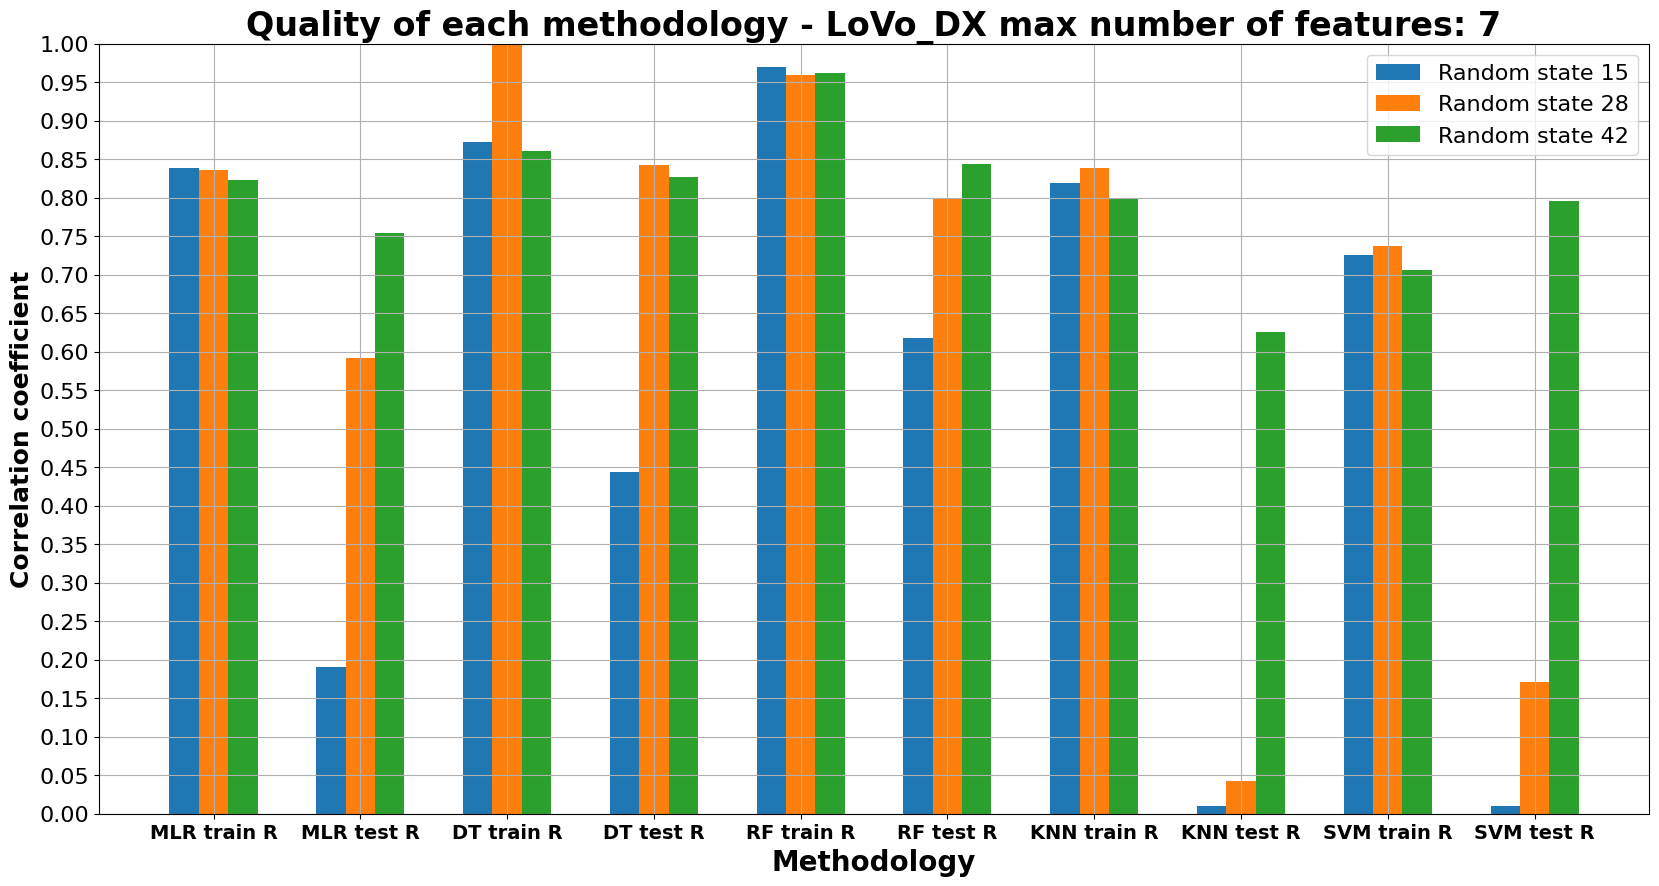

Random state - 15 ('MLR - number of features used: 7.0', 'DT - number of features used: 7.0', 'RF - number of features used: 7.0', 'KNN - number of features used: 7.0', 'SVM - number of features used: 5.0')
Random state - 28 ('MLR - number of features used: 7.0', 'DT - number of features used: 5.0', 'RF - number of features used: 7.0', 'KNN - number of features used: 7.0', 'SVM - number of features used: 5.0')
Random state - 42 ('MLR - number of features used: 7.0', 'DT - number of features used: 7.0', 'RF - number of features used: 7.0', 'KNN - number of features used: 7.0', 'SVM - number of features used: 7.0')


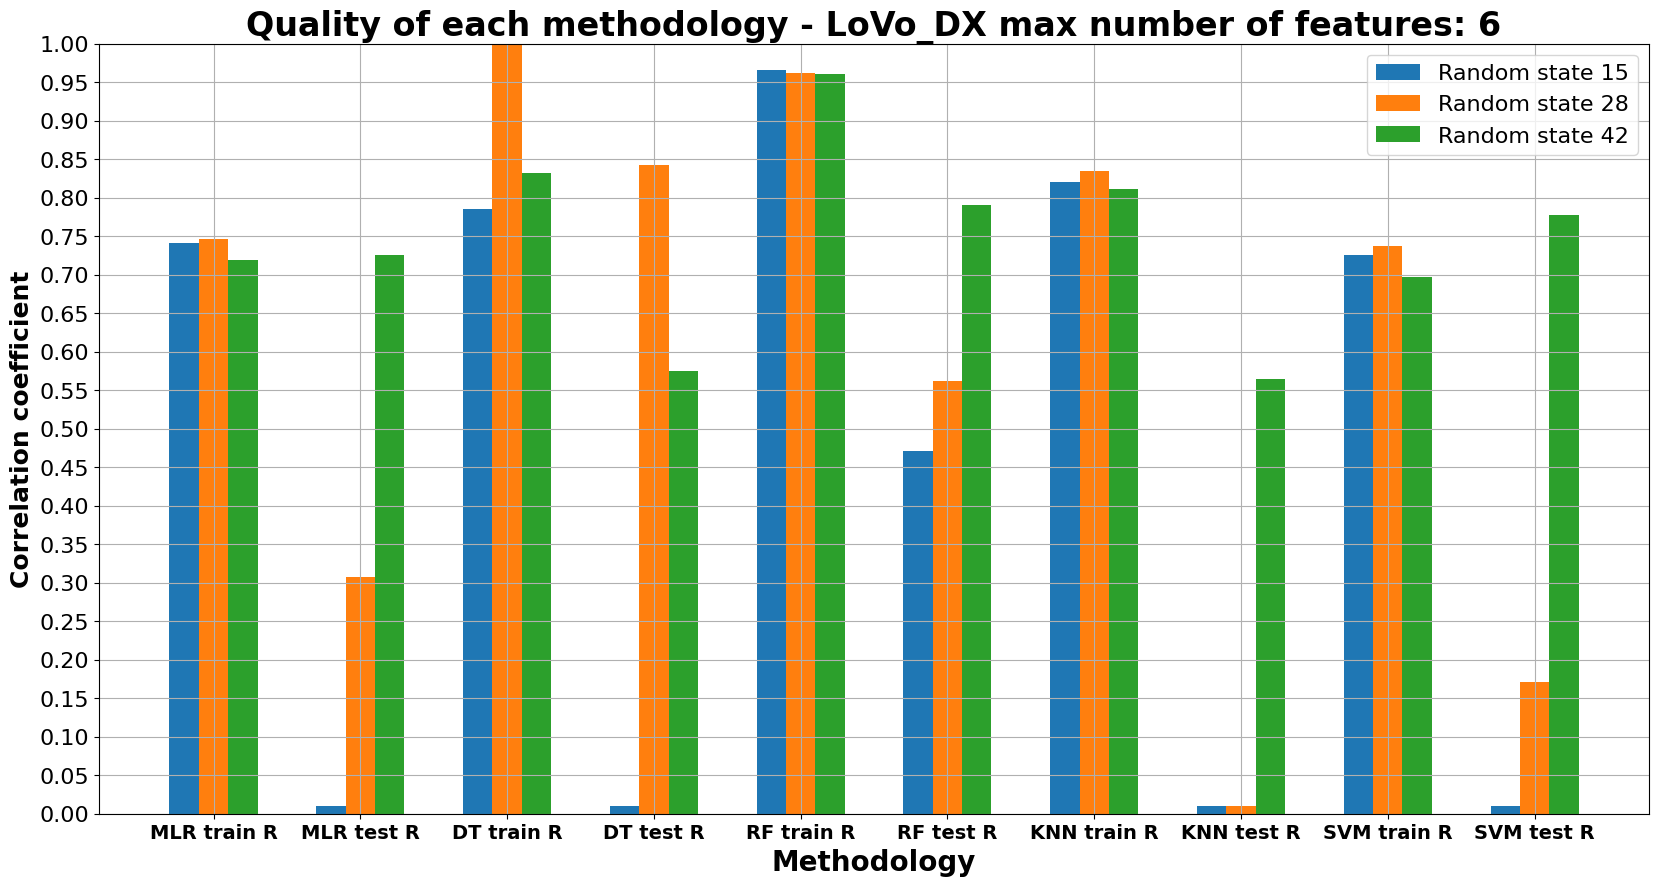

Random state - 15 ('MLR - number of features used: 5.0', 'DT - number of features used: 5.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 5.0', 'SVM - number of features used: 5.0')
Random state - 28 ('MLR - number of features used: 5.0', 'DT - number of features used: 5.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 5.0', 'SVM - number of features used: 5.0')
Random state - 42 ('MLR - number of features used: 5.0', 'DT - number of features used: 5.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 5.0', 'SVM - number of features used: 5.0')


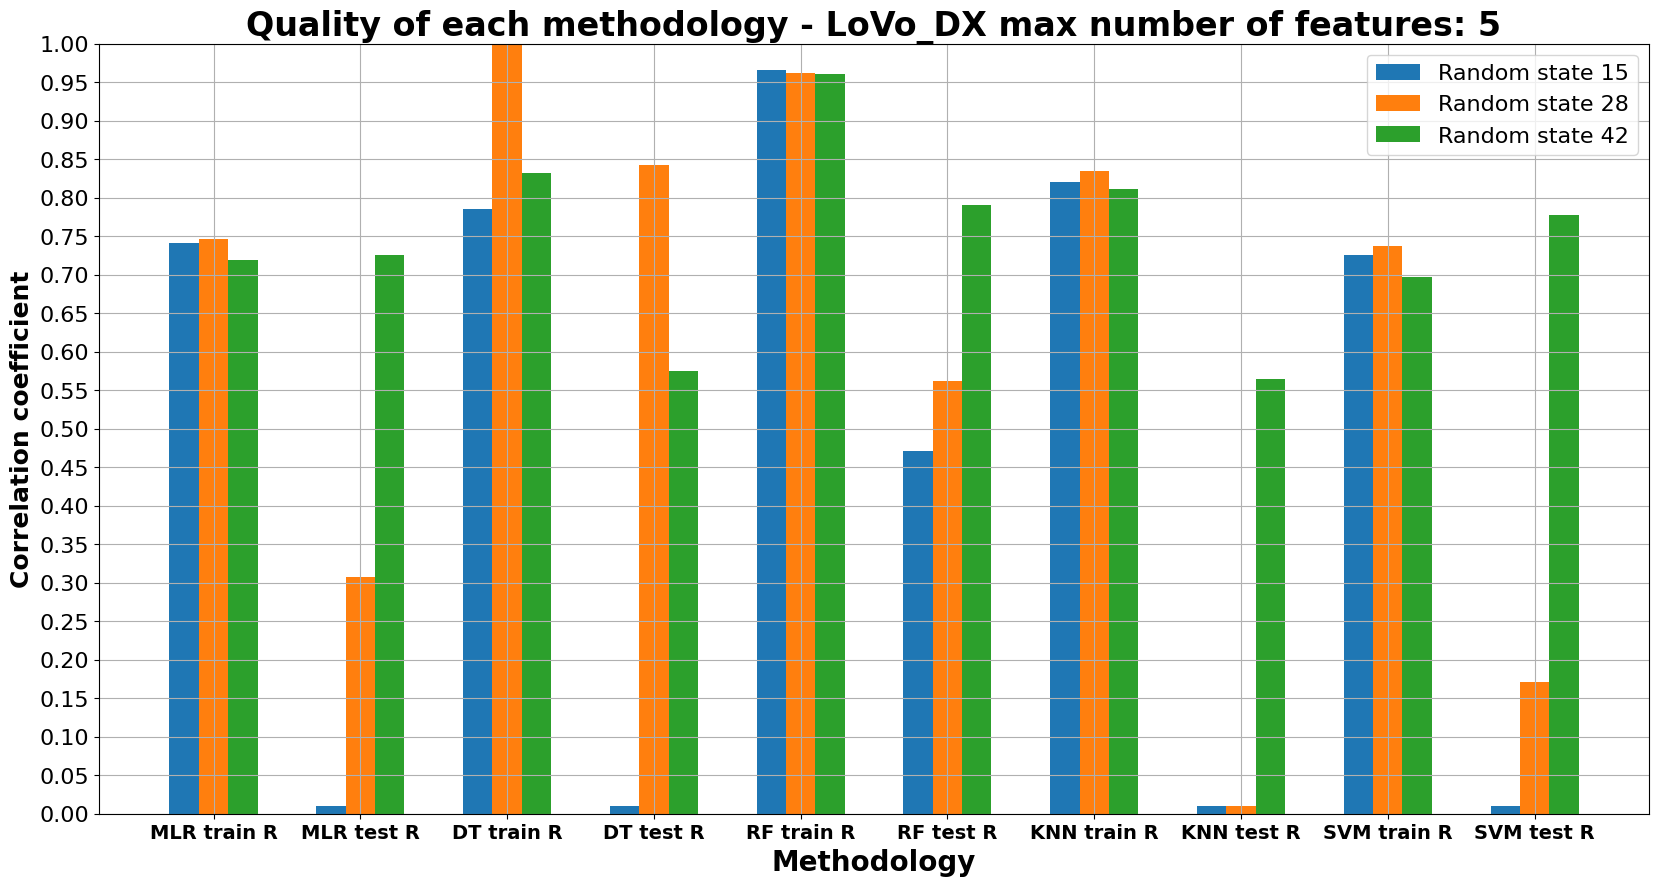

Random state - 15 ('MLR - number of features used: 5.0', 'DT - number of features used: 5.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 5.0', 'SVM - number of features used: 5.0')
Random state - 28 ('MLR - number of features used: 5.0', 'DT - number of features used: 5.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 5.0', 'SVM - number of features used: 5.0')
Random state - 42 ('MLR - number of features used: 5.0', 'DT - number of features used: 5.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 5.0', 'SVM - number of features used: 5.0')


In [12]:
for i in range(8, 4, -1): # 5 -> 4
    lovo_dx = prepare_histogram_data('LoVo_DX', i)
    prepare_plot(lovo_dx, 'LoVo_DX', i)

## BALB/3T3

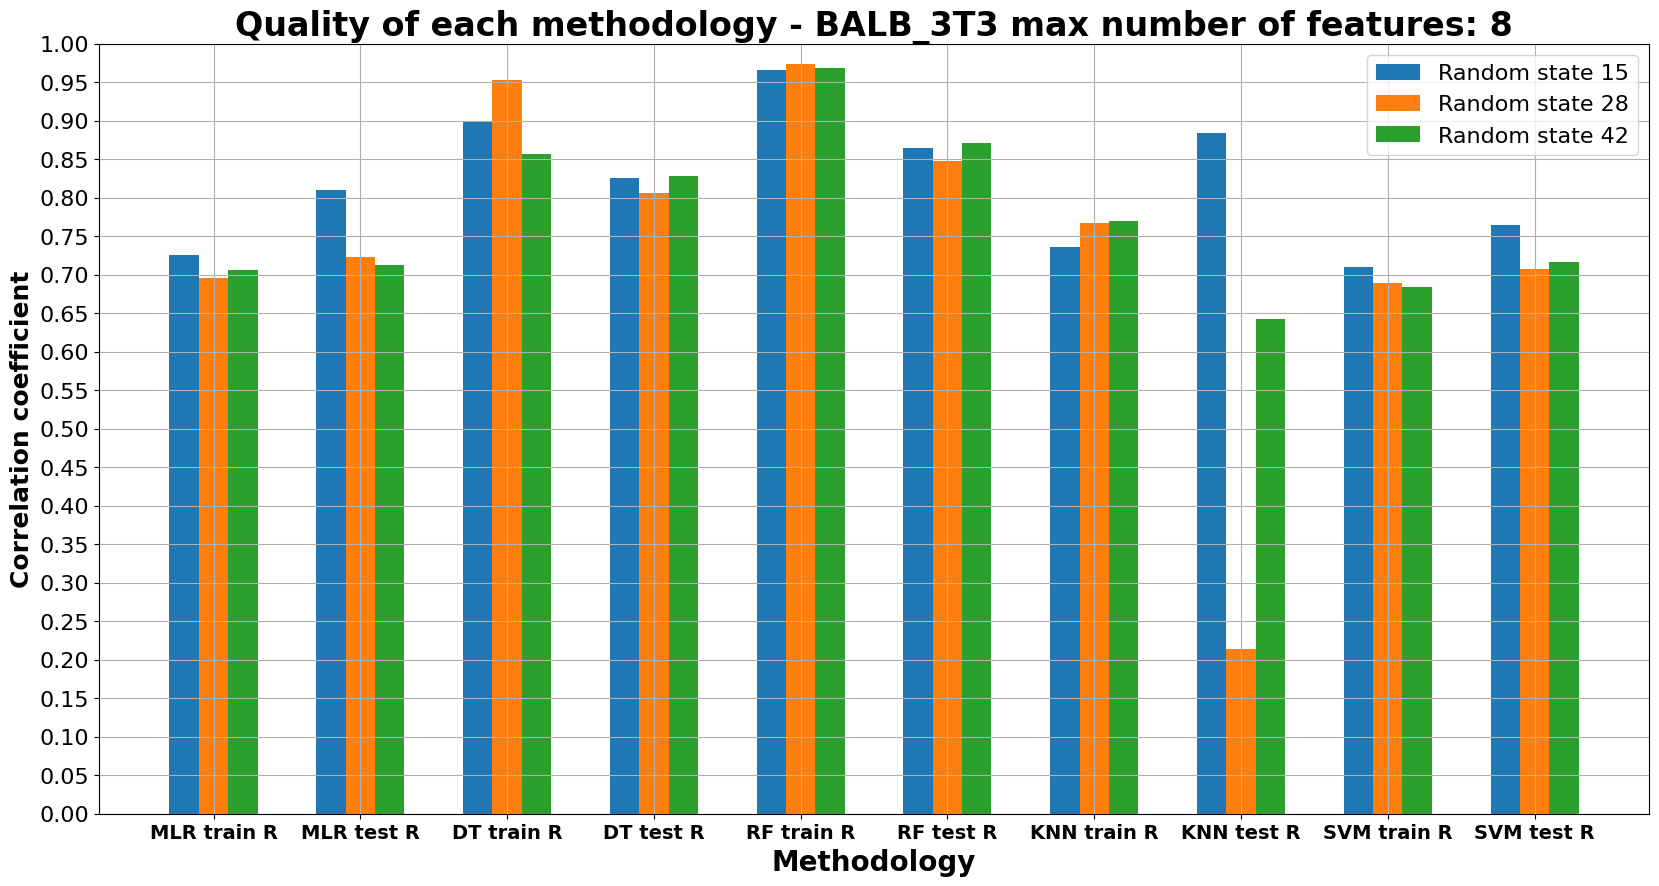

Random state - 15 ('MLR - number of features used: 7.0', 'DT - number of features used: 6.0', 'RF - number of features used: 6.0', 'KNN - number of features used: 6.0', 'SVM - number of features used: 7.0')
Random state - 28 ('MLR - number of features used: 2.0', 'DT - number of features used: 6.0', 'RF - number of features used: 7.0', 'KNN - number of features used: 3.0', 'SVM - number of features used: 2.0')
Random state - 42 ('MLR - number of features used: 3.0', 'DT - number of features used: 6.0', 'RF - number of features used: 7.0', 'KNN - number of features used: 7.0', 'SVM - number of features used: 3.0')


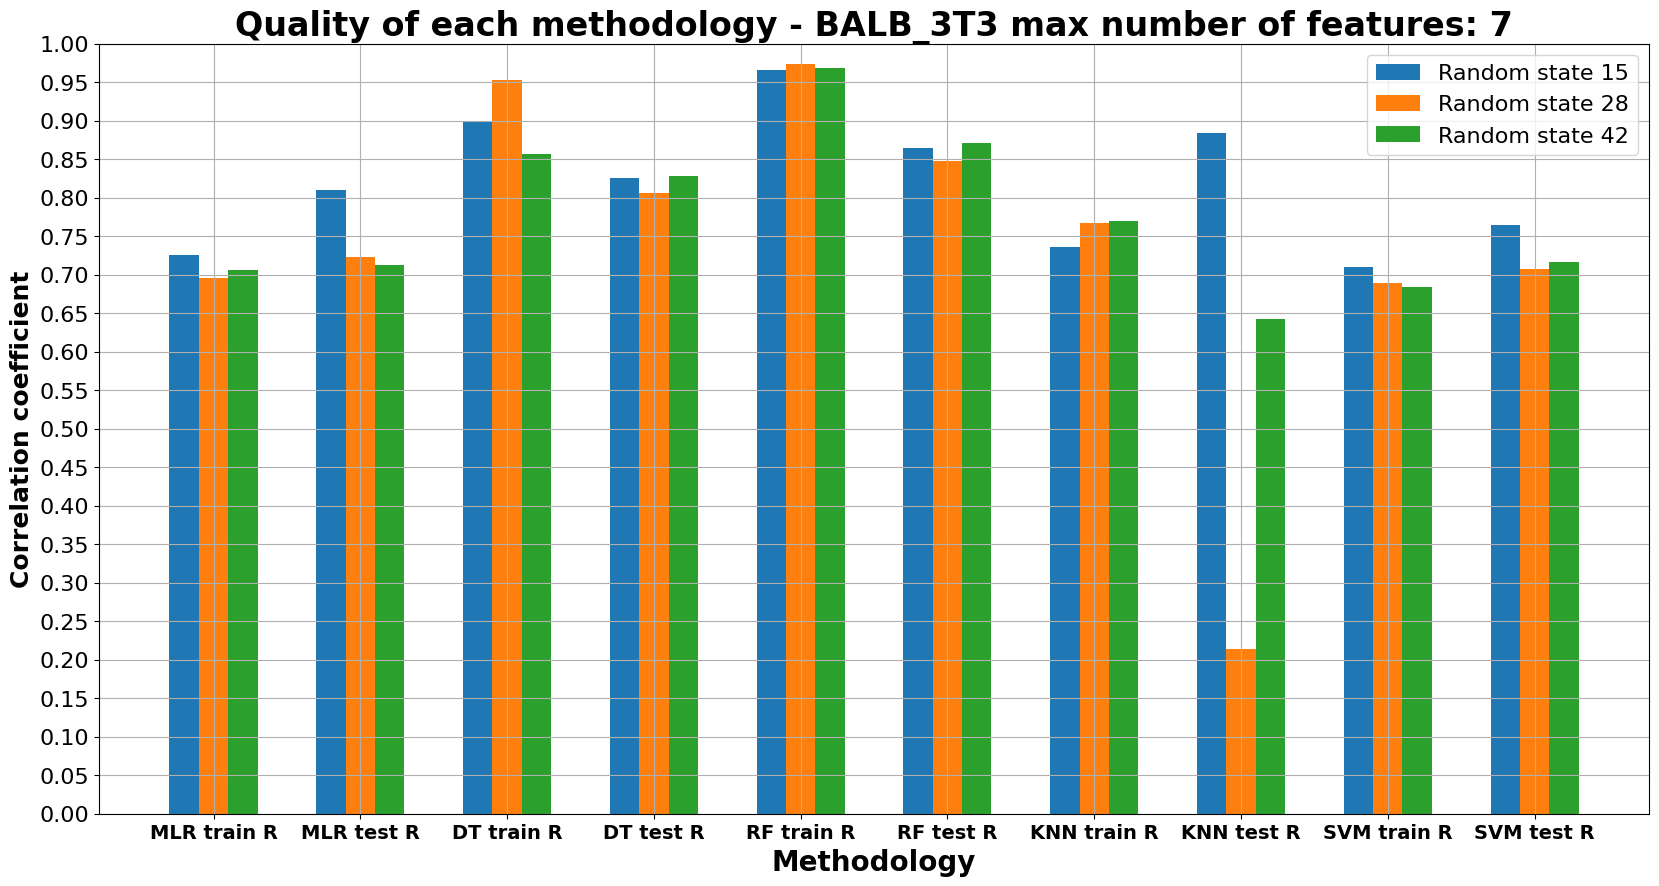

Random state - 15 ('MLR - number of features used: 7.0', 'DT - number of features used: 6.0', 'RF - number of features used: 6.0', 'KNN - number of features used: 6.0', 'SVM - number of features used: 7.0')
Random state - 28 ('MLR - number of features used: 2.0', 'DT - number of features used: 6.0', 'RF - number of features used: 7.0', 'KNN - number of features used: 3.0', 'SVM - number of features used: 2.0')
Random state - 42 ('MLR - number of features used: 3.0', 'DT - number of features used: 6.0', 'RF - number of features used: 7.0', 'KNN - number of features used: 7.0', 'SVM - number of features used: 3.0')


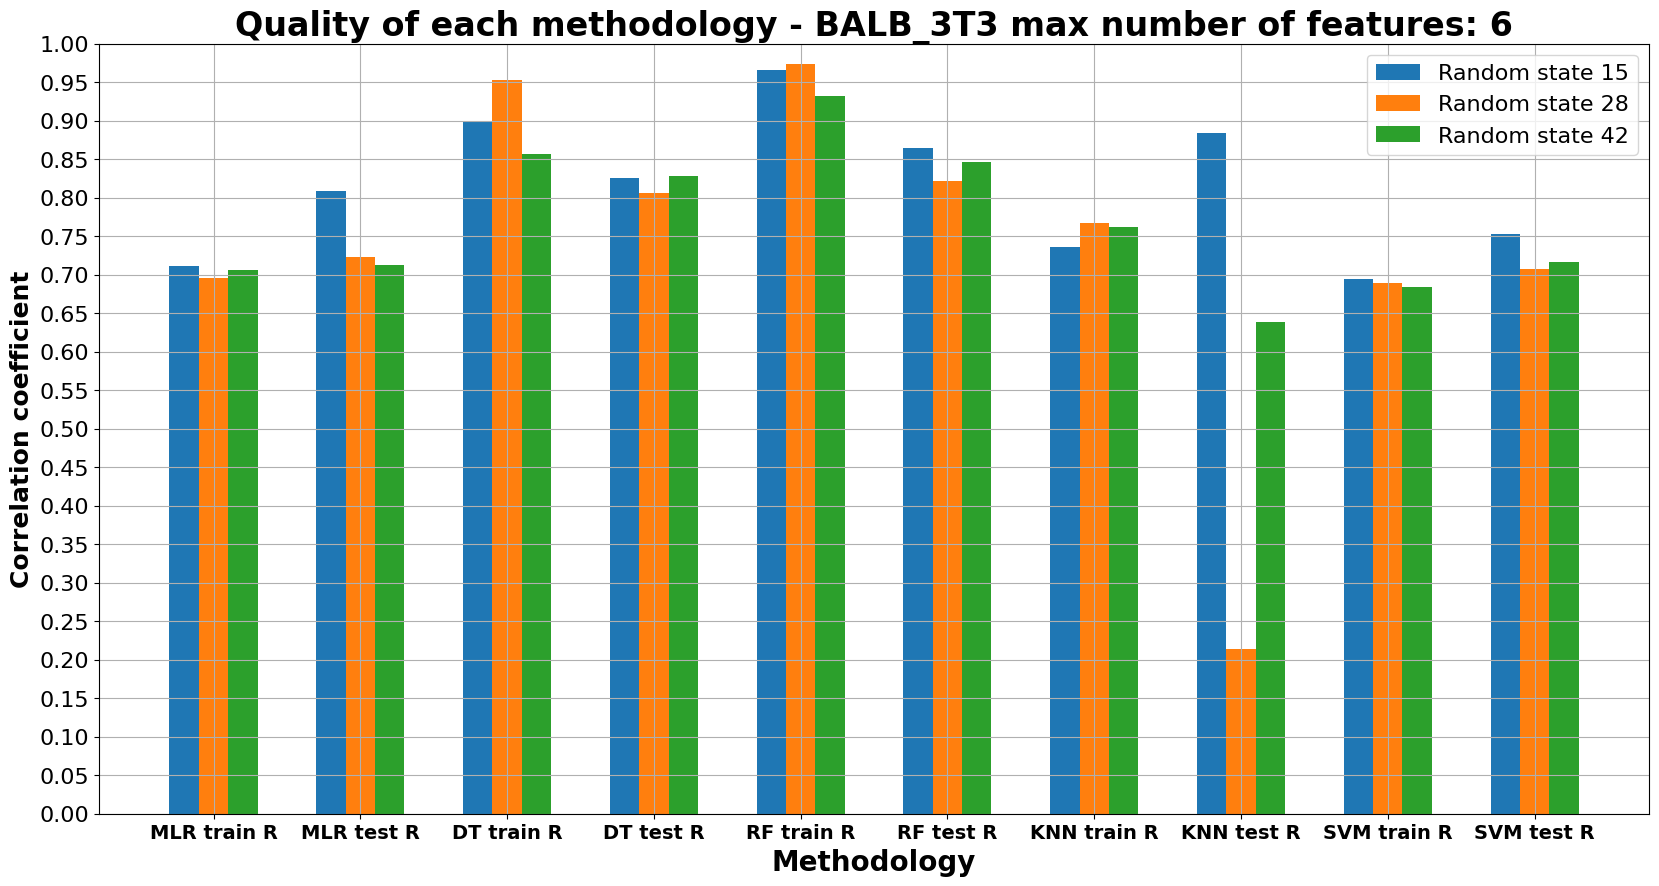

Random state - 15 ('MLR - number of features used: 6.0', 'DT - number of features used: 6.0', 'RF - number of features used: 6.0', 'KNN - number of features used: 6.0', 'SVM - number of features used: 5.0')
Random state - 28 ('MLR - number of features used: 2.0', 'DT - number of features used: 6.0', 'RF - number of features used: 6.0', 'KNN - number of features used: 3.0', 'SVM - number of features used: 2.0')
Random state - 42 ('MLR - number of features used: 3.0', 'DT - number of features used: 6.0', 'RF - number of features used: 6.0', 'KNN - number of features used: 3.0', 'SVM - number of features used: 3.0')


Random state - 15 ('MLR - number of features used: 5.0', 'DT - number of features used: 5.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 5.0', 'SVM - number of features used: 5.0')
Random state - 28 ('MLR - number of features used: 2.0', 'DT - number of features used: 3.0', 'RF - number of features used: 5.0', 'KNN - number of features used: 3.0', 'SVM - number of features used: 2.0')
Random state - 42 ('MLR - number of features used: 3.0', 'DT - number of features used: 2.0', 'RF - number of features used: 2.0', 'KNN - number of features used: 3.0', 'SVM - number of features used: 3.0')


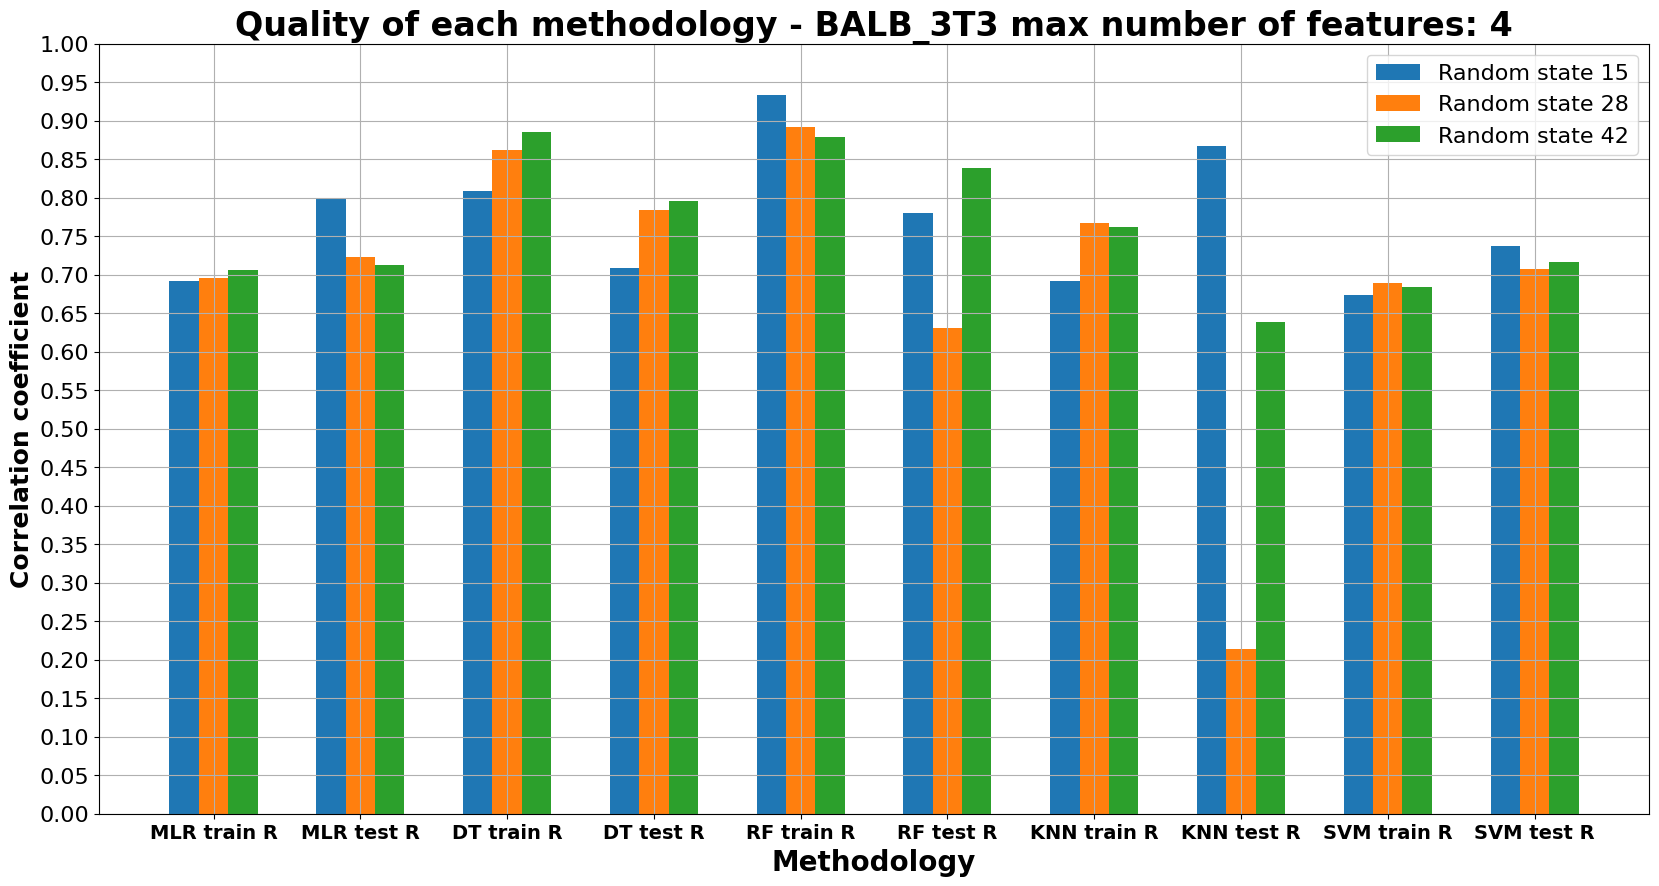

Random state - 15 ('MLR - number of features used: 3.0', 'DT - number of features used: 3.0', 'RF - number of features used: 3.0', 'KNN - number of features used: 2.0', 'SVM - number of features used: 3.0')
Random state - 28 ('MLR - number of features used: 2.0', 'DT - number of features used: 3.0', 'RF - number of features used: 2.0', 'KNN - number of features used: 3.0', 'SVM - number of features used: 2.0')
Random state - 42 ('MLR - number of features used: 3.0', 'DT - number of features used: 2.0', 'RF - number of features used: 2.0', 'KNN - number of features used: 3.0', 'SVM - number of features used: 3.0')


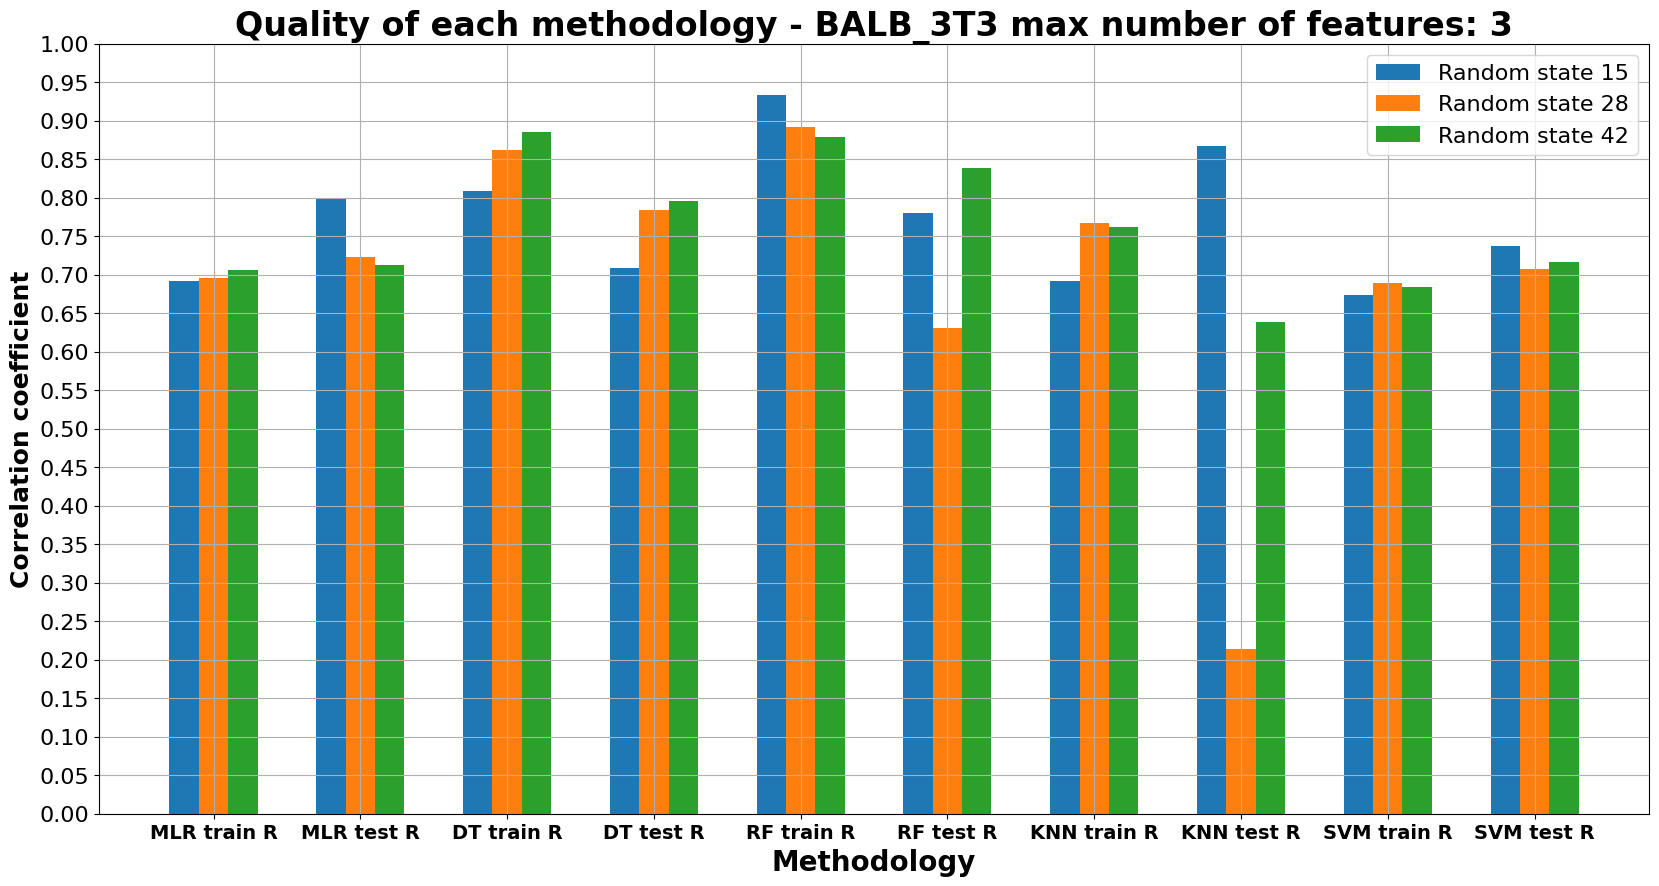

Random state - 15 ('MLR - number of features used: 3.0', 'DT - number of features used: 3.0', 'RF - number of features used: 3.0', 'KNN - number of features used: 2.0', 'SVM - number of features used: 3.0')
Random state - 28 ('MLR - number of features used: 2.0', 'DT - number of features used: 3.0', 'RF - number of features used: 2.0', 'KNN - number of features used: 3.0', 'SVM - number of features used: 2.0')
Random state - 42 ('MLR - number of features used: 3.0', 'DT - number of features used: 2.0', 'RF - number of features used: 2.0', 'KNN - number of features used: 3.0', 'SVM - number of features used: 3.0')


In [13]:
for i in range(8, 2, -1):
    balb = prepare_histogram_data('BALB_3T3', i)
    prepare_plot(balb, 'BALB_3T3', i)

## Best models selection

In [14]:
def prepare_best_plot(target_name, max_number_of_features):
    
    excel_files = []
    
    for name in glob.glob('../Data/Quality_'+str(target_name)+'*'):
        excel_files.append(name)
        
    random_state_15 = []
    random_state_28 = []
    random_state_42 = []
    features_15 = []
    features_28 = []
    features_42 = []
    random_states = [15, 28, 42]
    
    for random_state in range(len(random_states)):
        tmp = []
        to_plot = []
        values = []
        number_of_features = []
        for sheet in sheet_names:
            tmp.append(pd.read_excel(excel_files[random_state], sheet_name=sheet))
        for data in tmp:
            temp = data[data['Number of features'] <= max_number_of_features]
            to_plot.append(temp[temp['Test data R^2 score'] == max(temp['Test data R^2 score'])])
        for value in to_plot:
            values.append(value['Training data R^2 score'].tail(1))
            values.append(value['Test data R^2 score'].tail(1))
            number_of_features.append(value['Number of features'].tail(1))
        for element in values:
            if random_state == 0:
                random_state_15.append(float(element))
            elif random_state == 1:
                random_state_28.append(float(element))                      
            elif random_state == 2:
                random_state_42.append(float(element))
            else:
                print("Error with conditions...")
                
        for features in number_of_features:
            if random_state == 0:
                features_15.append(float(features))
            elif random_state == 1:
                features_28.append(float(features))                      
            elif random_state == 2:
                features_42.append(float(features))
            else:
                print("Error with conditions...")
        
                
    return  random_state_15, random_state_28, random_state_42, features_15, features_28, features_42

In [15]:
def prepare_plot(data, name, max_number_of_features):
    fig = plt.figure(figsize=(20,10))
    X = x_ticks
    y_15 = handle_negative_corr(data[0])
    y_28 = handle_negative_corr(data[1])
    y_42 = handle_negative_corr(data[2])

    X_axis = np.arange(len(X))
    y_ax = [x/100 for x in range(0, 105, 5)]
    plt.yticks(y_ax)
    plt.bar(X_axis - 0.2, y_15, 0.2, label = 'Random state 15')
    plt.bar(X_axis + 0.0, y_28, 0.2, label = 'Random state 28')
    plt.bar(X_axis + 0.2, y_42, 0.2, label = 'Random state 42')
    #plt.plot(X_axis, y_15, color='r', label='Random state 15')
    #plt.plot(X_axis, y_28, color='g', label='Random state 28')
    #plt.plot(X_axis, y_42, color='b', label='Random state 42')

    plt.xticks(X_axis, X)
    plt.xlabel("Methodology", fontsize=20, weight='bold')
    plt.ylabel("Correlation coefficient", fontsize=18, weight='bold')
    plt.ylim([0.0, 1.0])
    plt.title("Quality of each methodology - "+str(name)+' '+str('max number of features: '+str(max_number_of_features)), fontsize=24, weight='bold')
    plt.grid(visible=True)
    plt.legend()
    plt.show()
    for i, state in enumerate(random_states):
        print('Random state - '+str(state)+' '+str(update_description(sheet_names, data[i+3])))

In [16]:
def update_description(x_axis_labels, number_of_features):
    
    DT = str(x_axis_labels[0])+' - number of features used: '+str(number_of_features[0])
    RF = str(x_axis_labels[1])+' - number of features used: '+str(number_of_features[1])
    
    return DT, RF

### A549

In [17]:
sheet_names = ['DT', 'RF']

In [18]:
x_ticks = ['DT train R', 'DT test R', 'RF train R', 'RF test R']

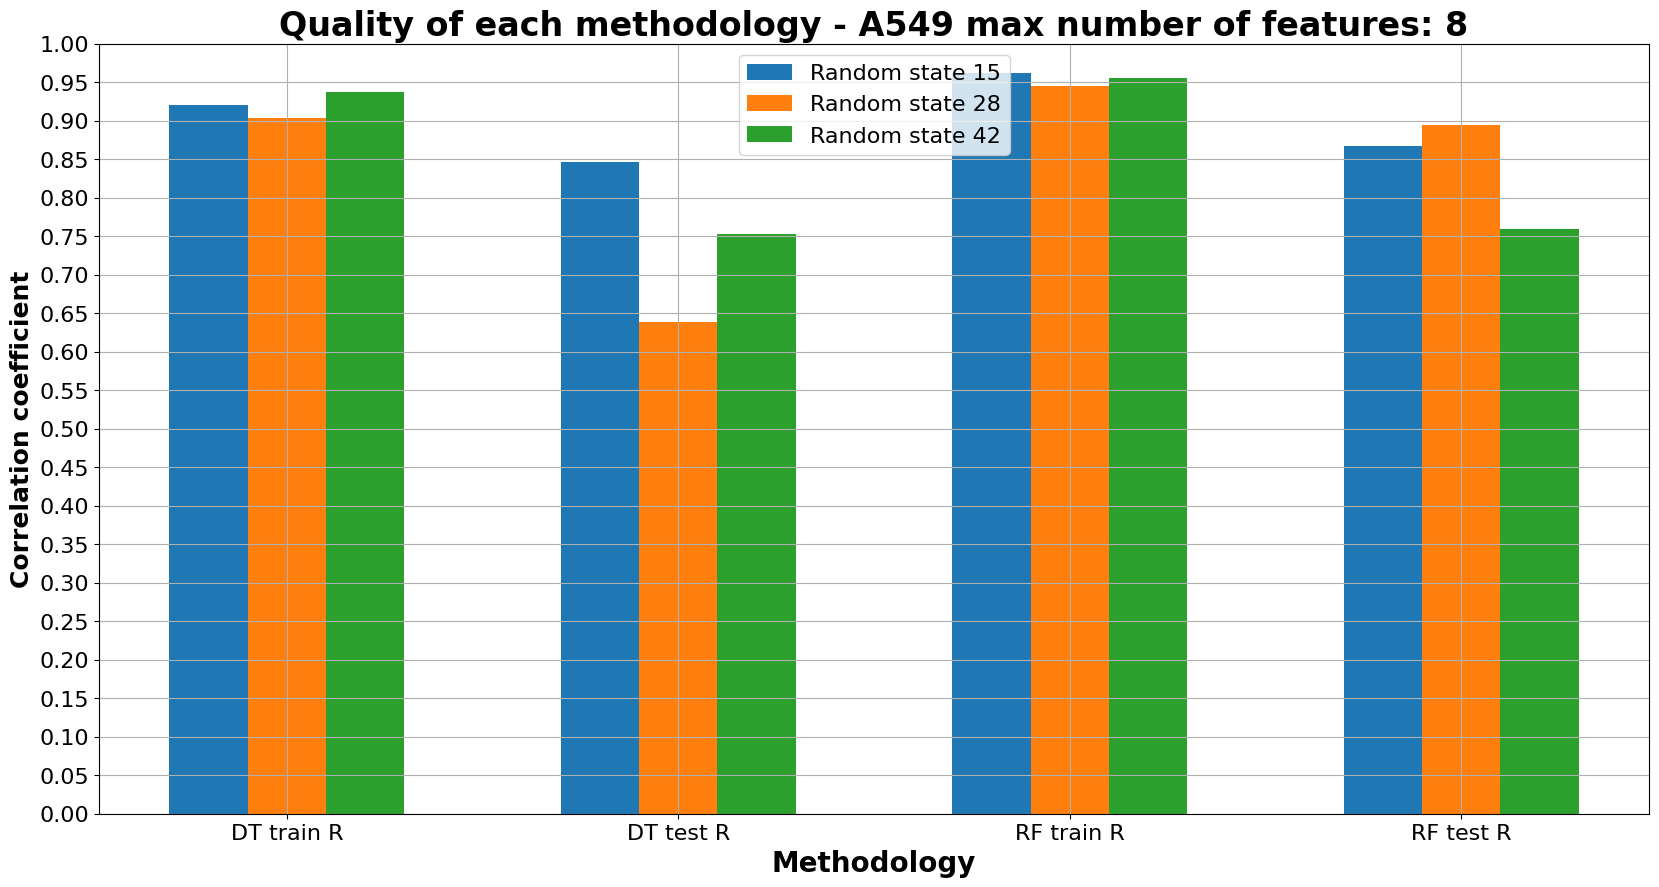

Random state - 15 ('DT - number of features used: 5.0', 'RF - number of features used: 8.0')
Random state - 28 ('DT - number of features used: 7.0', 'RF - number of features used: 8.0')
Random state - 42 ('DT - number of features used: 8.0', 'RF - number of features used: 7.0')
[0.9201268576746804, 0.8457608041331407, 0.9617557913430392, 0.8674998324838339]
[0.9039251218762473, 0.6385038801226338, 0.9449953932266721, 0.8948585348179655]
[0.9379105079400218, 0.7530696887427908, 0.9560924167894731, 0.7596144482170636]


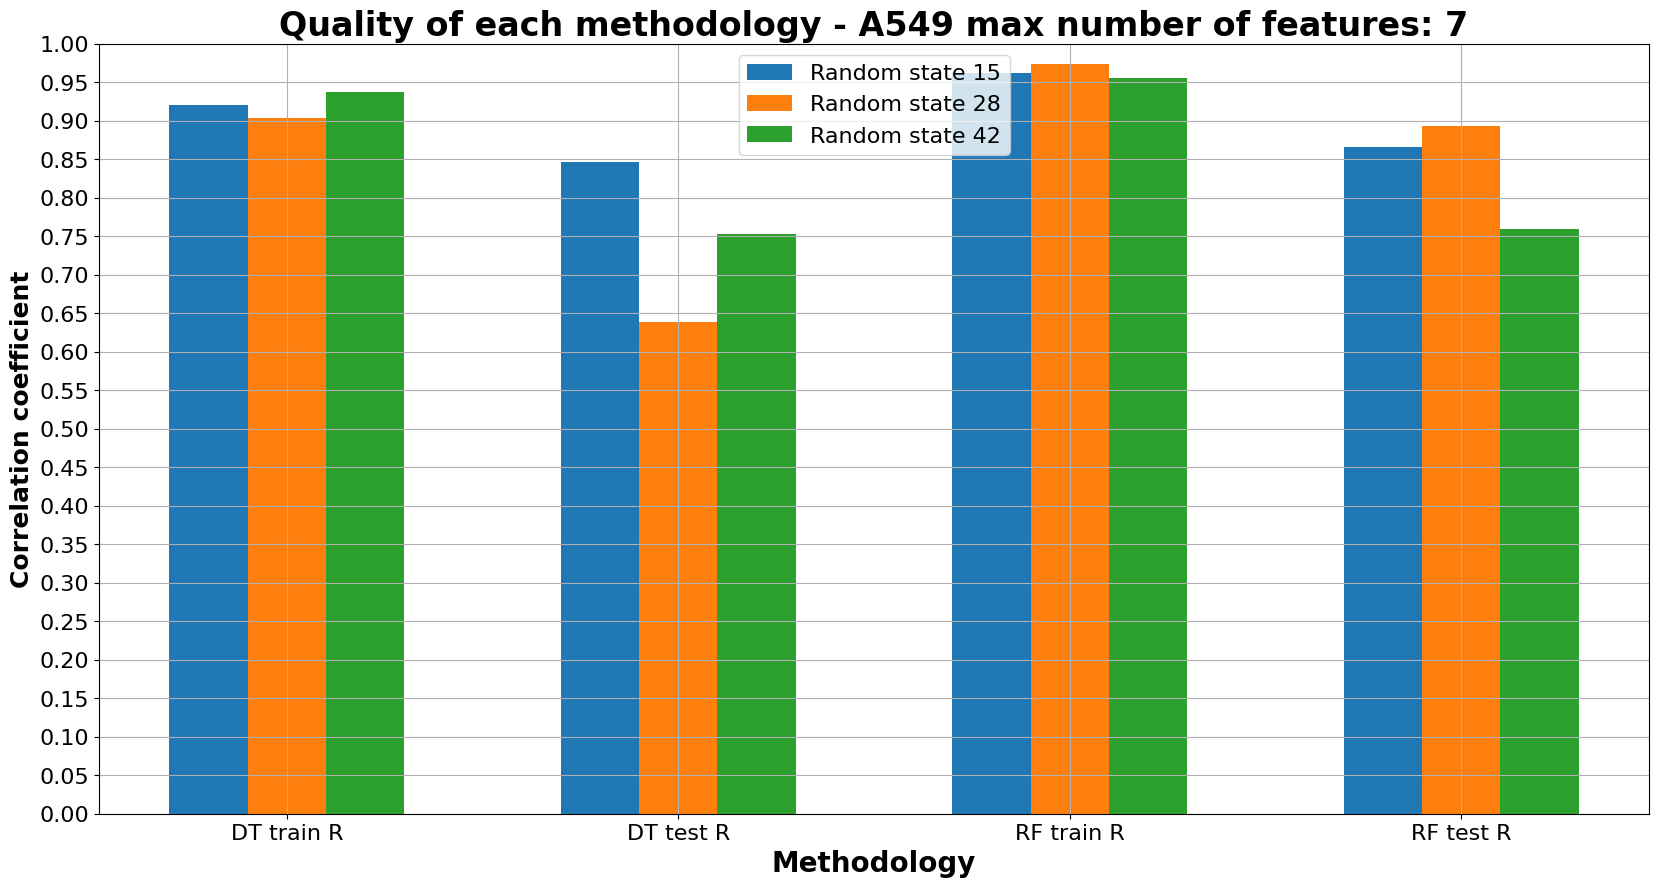

Random state - 15 ('DT - number of features used: 5.0', 'RF - number of features used: 7.0')
Random state - 28 ('DT - number of features used: 7.0', 'RF - number of features used: 7.0')
Random state - 42 ('DT - number of features used: 7.0', 'RF - number of features used: 7.0')
[0.9201268576746804, 0.8457608041331407, 0.9617502720280803, 0.865633475359066]
[0.9039251218762473, 0.6385038801226338, 0.9733717517208741, 0.8936683566006186]
[0.9379105079400218, 0.7530696887427905, 0.9560924167894731, 0.7596144482170636]


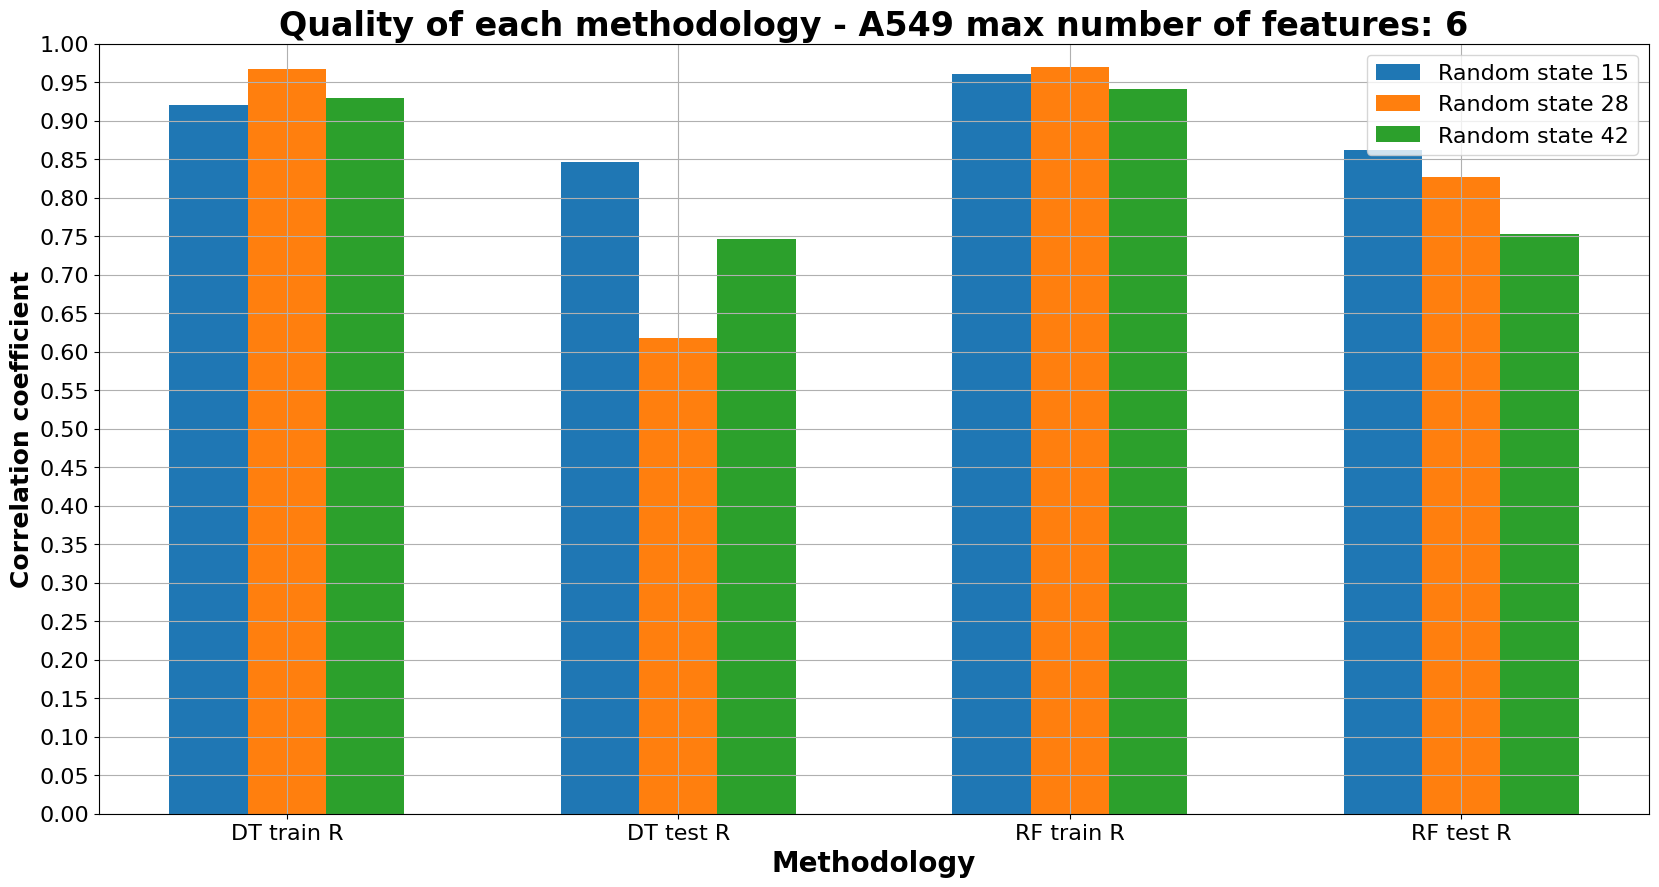

Random state - 15 ('DT - number of features used: 5.0', 'RF - number of features used: 5.0')
Random state - 28 ('DT - number of features used: 4.0', 'RF - number of features used: 5.0')
Random state - 42 ('DT - number of features used: 5.0', 'RF - number of features used: 5.0')
[0.9201268576746804, 0.8457608041331407, 0.960591935079034, 0.8620618597285548]
[0.9669220010492233, 0.6172800607391895, 0.9701820261061275, 0.8267270635721486]
[0.9298029234842533, 0.746434872641246, 0.9417342321043257, 0.7526447589514621]


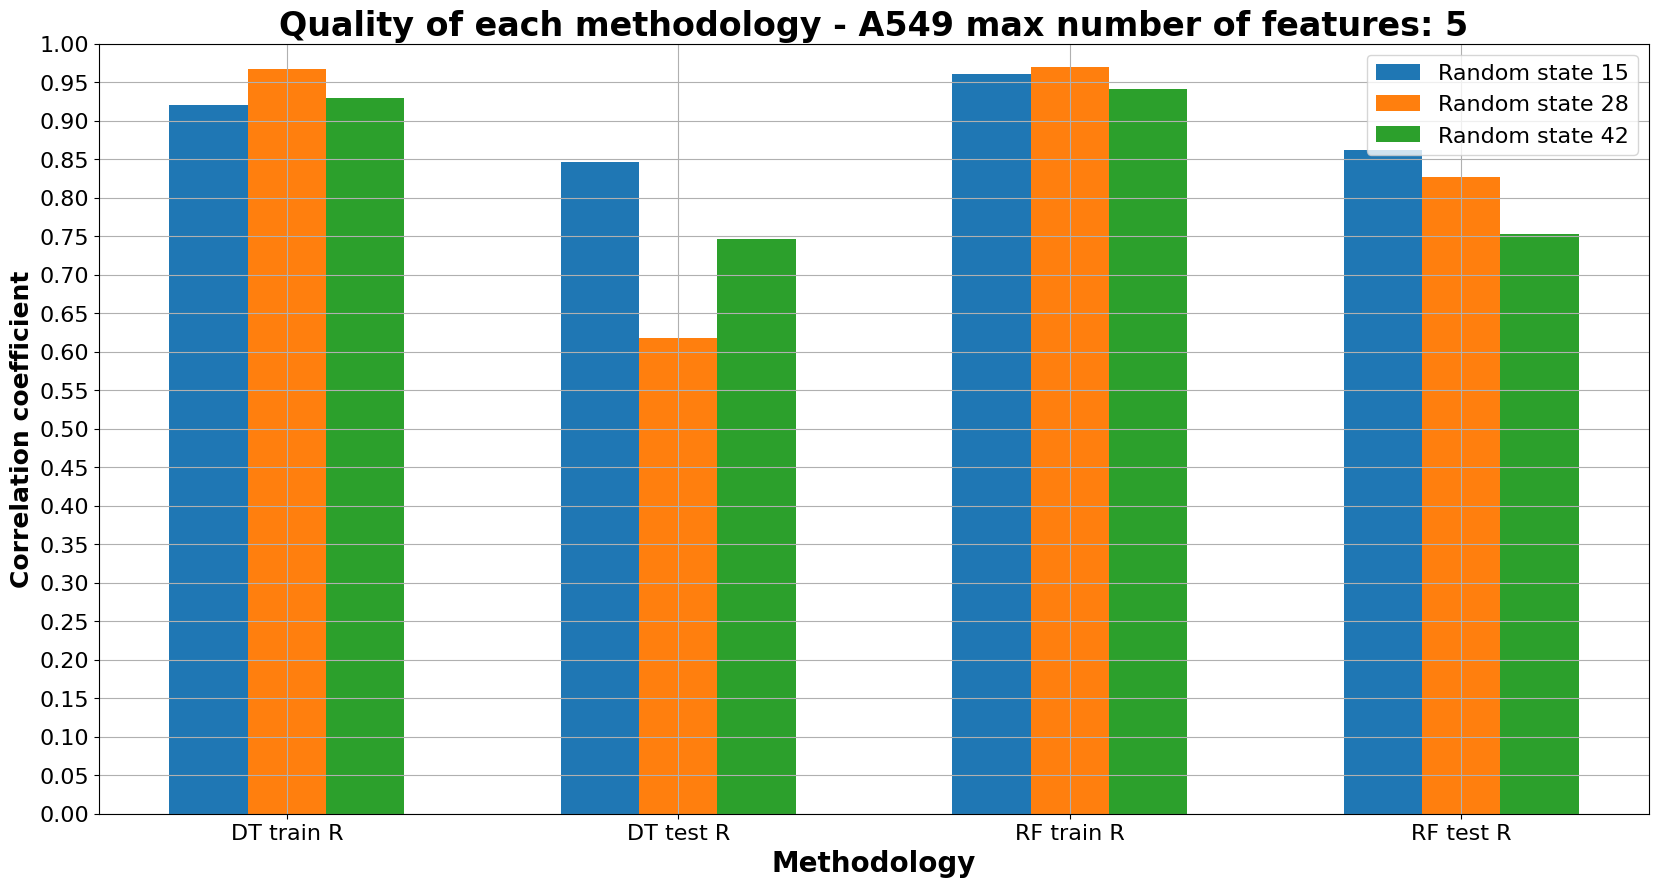

Random state - 15 ('DT - number of features used: 5.0', 'RF - number of features used: 5.0')
Random state - 28 ('DT - number of features used: 4.0', 'RF - number of features used: 5.0')
Random state - 42 ('DT - number of features used: 5.0', 'RF - number of features used: 5.0')
[0.9201268576746804, 0.8457608041331407, 0.960591935079034, 0.8620618597285548]
[0.9669220010492233, 0.6172800607391895, 0.9701820261061275, 0.8267270635721486]
[0.9298029234842533, 0.746434872641246, 0.9417342321043257, 0.7526447589514621]


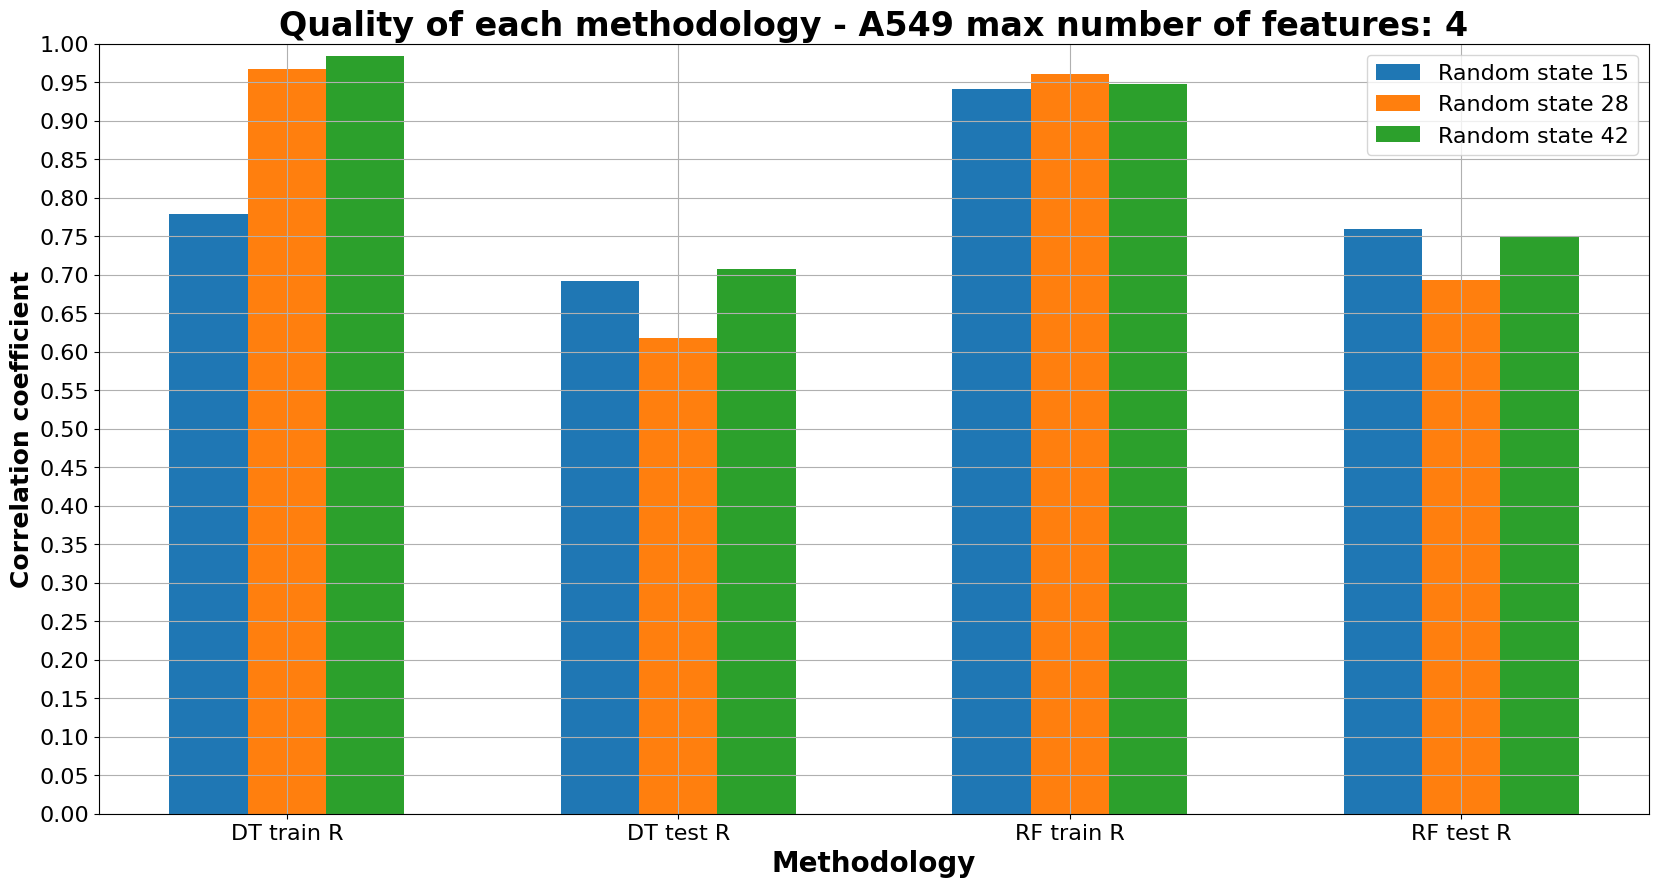

Random state - 15 ('DT - number of features used: 3.0', 'RF - number of features used: 4.0')
Random state - 28 ('DT - number of features used: 4.0', 'RF - number of features used: 4.0')
Random state - 42 ('DT - number of features used: 3.0', 'RF - number of features used: 3.0')
[0.7787561234847591, 0.6915475851498438, 0.94133348297971, 0.7594733568417315]
[0.9669220010492233, 0.6172800607391895, 0.9601878273802564, 0.6926815941771752]
[0.9846195227501177, 0.70753906802074, 0.9477169502251152, 0.7487968593395388]


In [19]:
for i in range(8, 3, -1):
    a549 = prepare_best_plot('A549', i)
    prepare_plot(a549, 'A549', i)
    print(handle_negative_corr(a549[0]))
    print(handle_negative_corr(a549[1]))
    print(handle_negative_corr(a549[2]))

Random state - 15 ('DT - number of features used: 6.0', 'RF - number of features used: 6.0')
Random state - 28 ('DT - number of features used: 6.0', 'RF - number of features used: 7.0')
Random state - 42 ('DT - number of features used: 6.0', 'RF - number of features used: 7.0')
[0.8991491467263336, 0.8261911693918914, 0.9656538230216772, 0.8642992780332693]
[0.9528404289708712, 0.8063470063121128, 0.9733753371944485, 0.8472660678286129]
[0.8574233855704518, 0.8283658235151035, 0.9679324070733115, 0.8709265604132982]


Random state - 15 ('DT - number of features used: 6.0', 'RF - number of features used: 6.0')
Random state - 28 ('DT - number of features used: 6.0', 'RF - number of features used: 7.0')
Random state - 42 ('DT - number of features used: 6.0', 'RF - number of features used: 7.0')
[0.8991491467263336, 0.8261911693918914, 0.9656538230216772, 0.8642992780332693]
[0.9528404289708712, 0.8063470063121128, 0.9733753371944485, 0.8472660678286129]
[0.8574233855704518, 0.8283658235151035, 0.9679324070733115, 0.8709265604132982]


Random state - 15 ('DT - number of features used: 6.0', 'RF - number of features used: 6.0')
Random state - 28 ('DT - number of features used: 6.0', 'RF - number of features used: 6.0')
Random state - 42 ('DT - number of features used: 6.0', 'RF - number of features used: 6.0')
[0.8991491467263336, 0.8261911693918914, 0.9656538230216772, 0.8642992780332693]
[0.9528404289708712, 0.8063470063121128, 0.9732431671159815, 0.8213095110427073]
[0.8574233855704518, 0.8283658235151035, 0.9323265067533627, 0.8462778707935902]


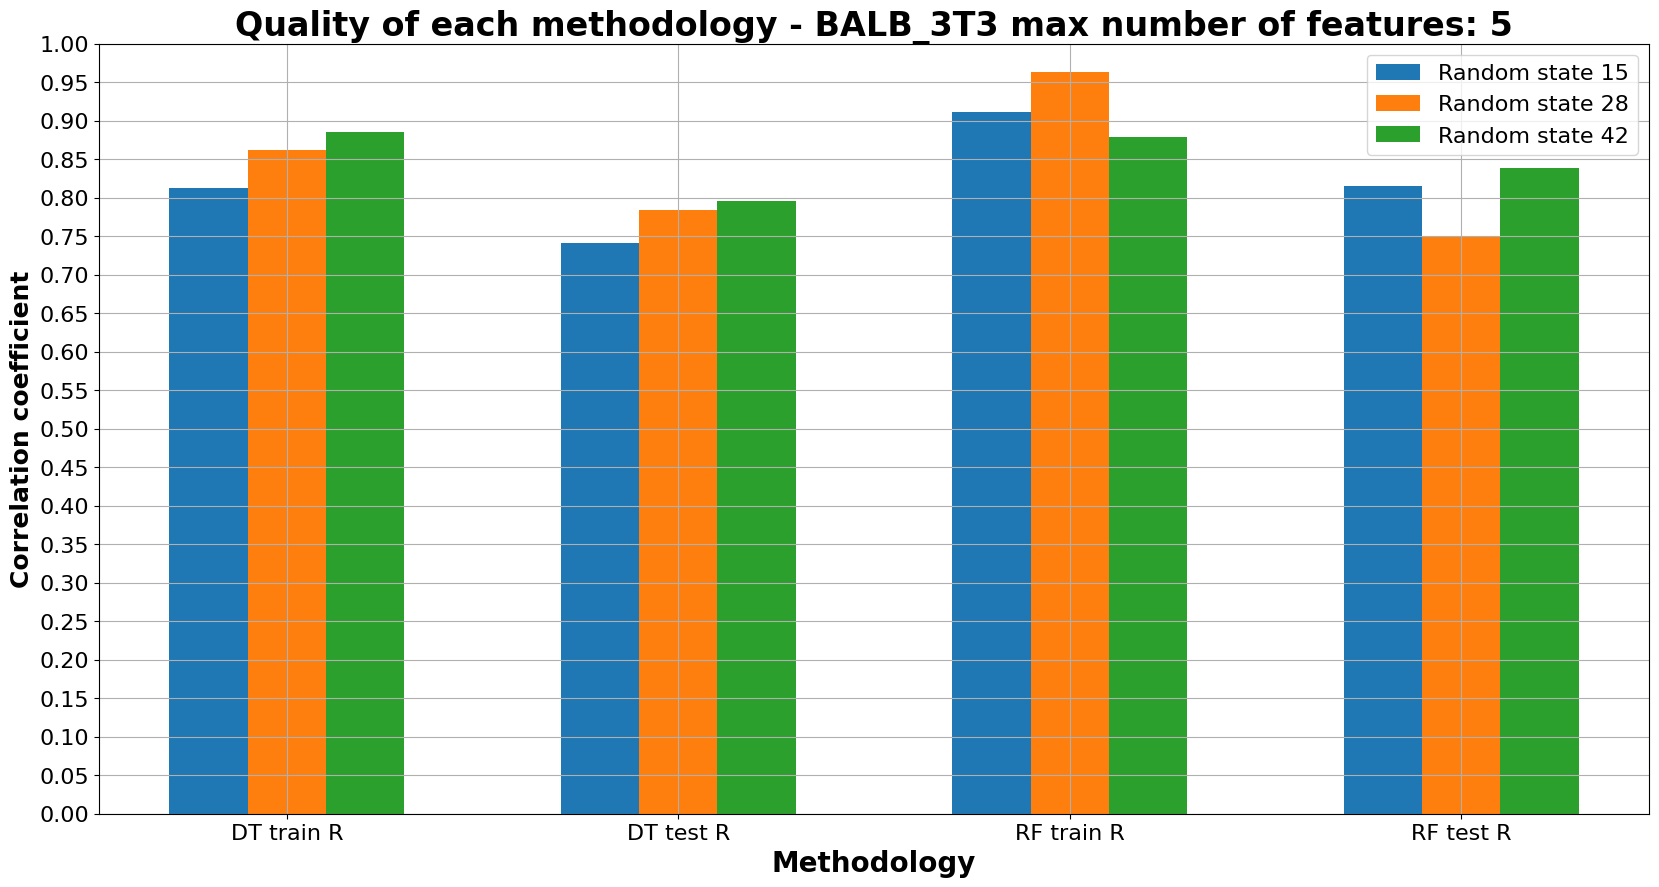

Random state - 15 ('DT - number of features used: 5.0', 'RF - number of features used: 5.0')
Random state - 28 ('DT - number of features used: 3.0', 'RF - number of features used: 5.0')
Random state - 42 ('DT - number of features used: 2.0', 'RF - number of features used: 2.0')
[0.8124040437986895, 0.7410808070808154, 0.9118596336958118, 0.8149483739246309]
[0.8618249162158247, 0.7846752040880232, 0.9628242677281924, 0.7501347353760348]
[0.885912746009139, 0.7955365930788652, 0.8792917450164119, 0.8379661052032461]


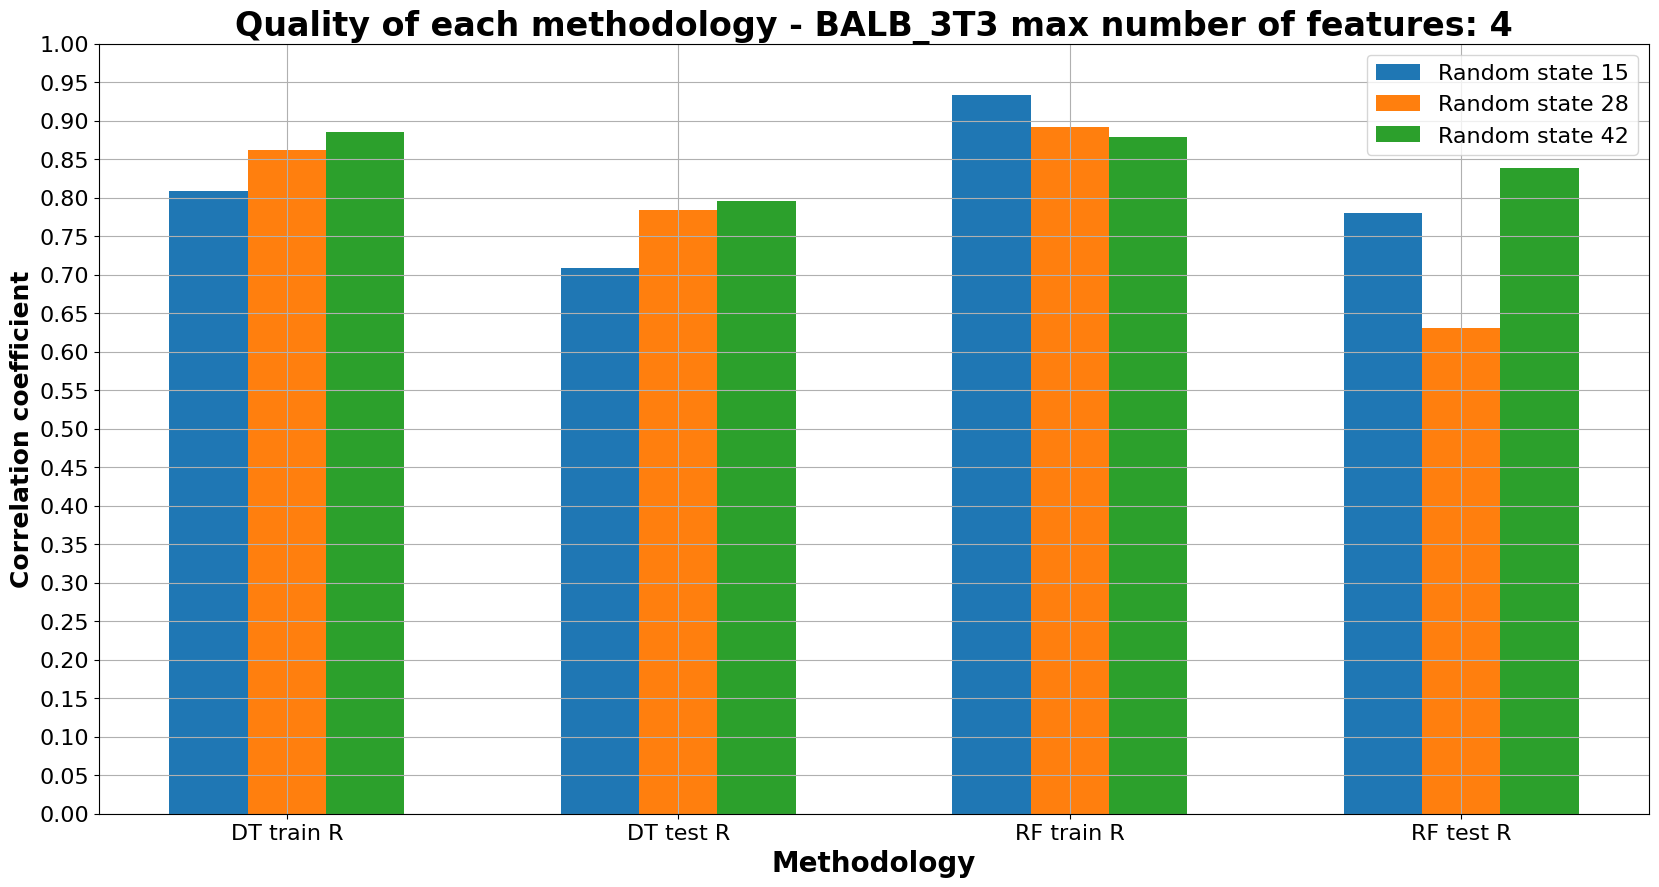

Random state - 15 ('DT - number of features used: 3.0', 'RF - number of features used: 3.0')
Random state - 28 ('DT - number of features used: 3.0', 'RF - number of features used: 2.0')
Random state - 42 ('DT - number of features used: 2.0', 'RF - number of features used: 2.0')
[0.8089681087052601, 0.7083667815152337, 0.9331579969232232, 0.780272449227771]
[0.8618249162158247, 0.7846752040880232, 0.8911999290100625, 0.6303440412443166]
[0.885912746009139, 0.7955365930788652, 0.8792917450164119, 0.8379661052032461]


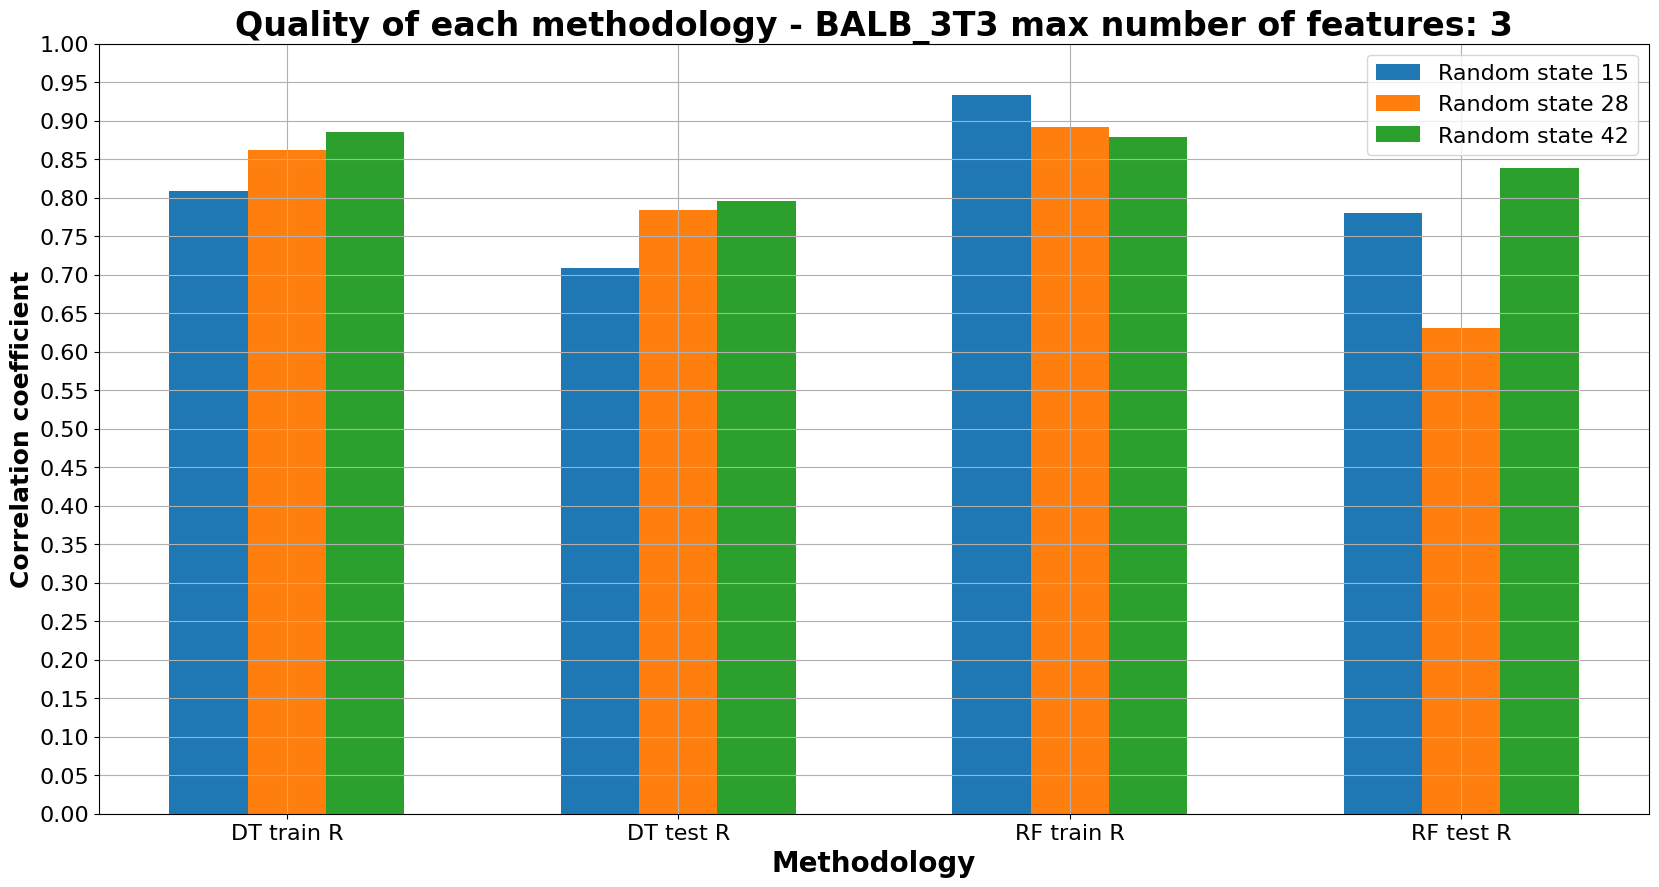

Random state - 15 ('DT - number of features used: 3.0', 'RF - number of features used: 3.0')
Random state - 28 ('DT - number of features used: 3.0', 'RF - number of features used: 2.0')
Random state - 42 ('DT - number of features used: 2.0', 'RF - number of features used: 2.0')
[0.8089681087052601, 0.7083667815152337, 0.9331579969232232, 0.780272449227771]
[0.8618249162158247, 0.7846752040880232, 0.8911999290100625, 0.6303440412443166]
[0.885912746009139, 0.7955365930788652, 0.8792917450164119, 0.8379661052032461]


In [20]:
for i in range(8, 2, -1):
    x = prepare_best_plot('BALB_3T3', i)
    prepare_plot(x, 'BALB_3T3', i)
    print(handle_negative_corr(x[0]))
    print(handle_negative_corr(x[1]))
    print(handle_negative_corr(x[2]))

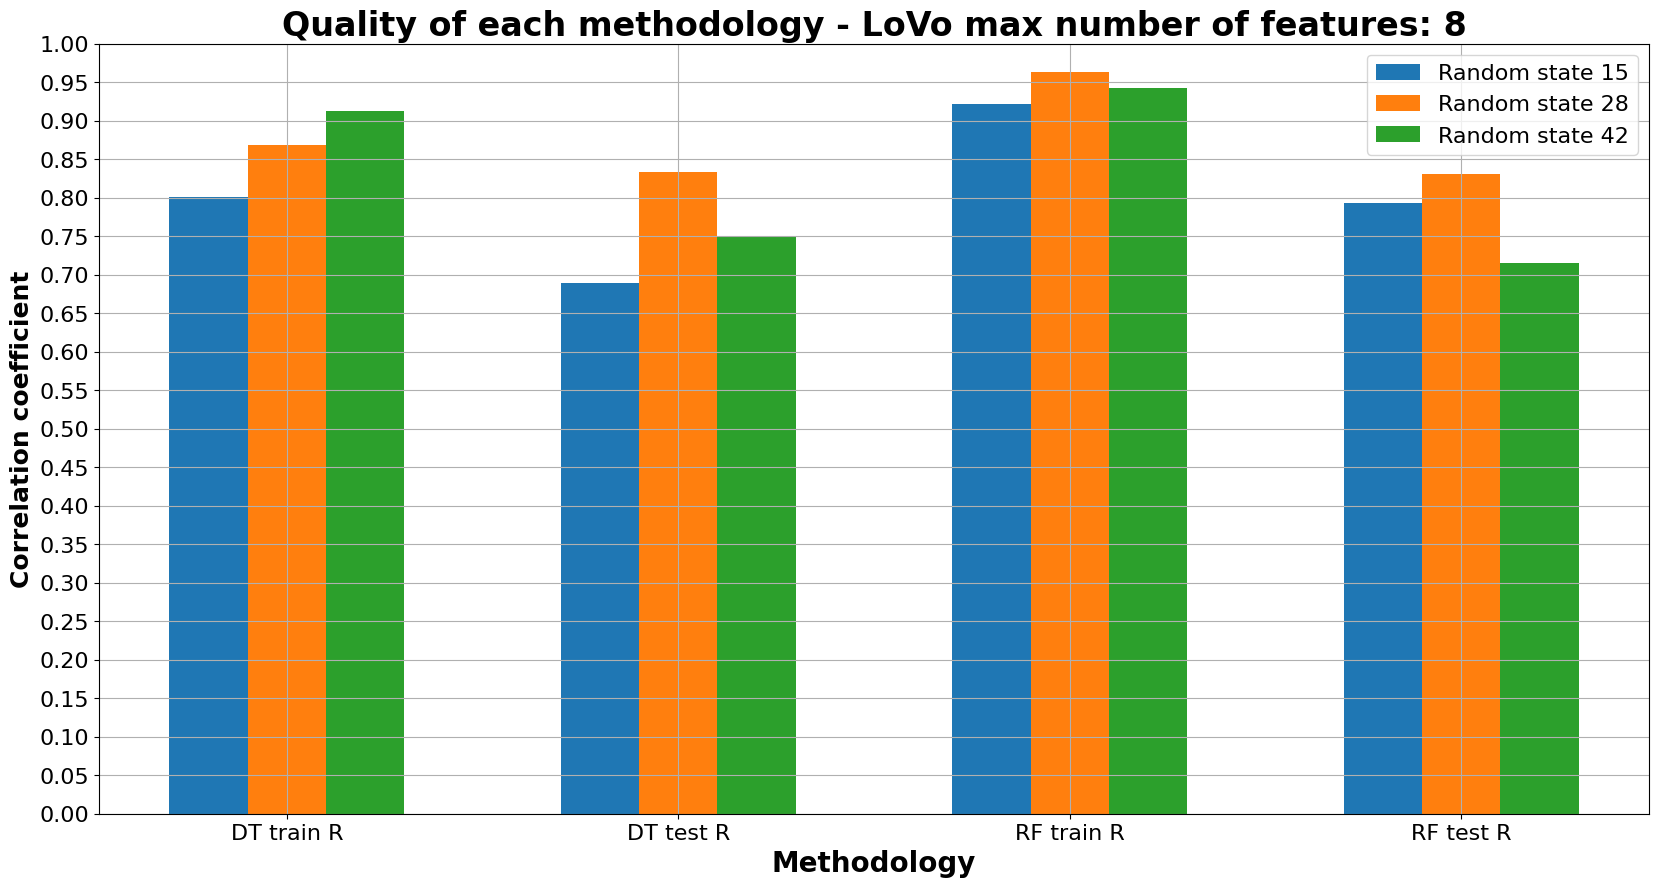

Random state - 15 ('DT - number of features used: 7.0', 'RF - number of features used: 5.0')
Random state - 28 ('DT - number of features used: 3.0', 'RF - number of features used: 7.0')
Random state - 42 ('DT - number of features used: 3.0', 'RF - number of features used: 5.0')
[0.8012547599591731, 0.6895731340974959, 0.9218472144749, 0.7937730901899727]
[0.8682412855125715, 0.8337432078795763, 0.9636653219744876, 0.8305193093908672]
[0.9121710628859598, 0.7499171098832387, 0.9423441595215349, 0.7153725648027842]


Random state - 15 ('DT - number of features used: 7.0', 'RF - number of features used: 5.0')
Random state - 28 ('DT - number of features used: 3.0', 'RF - number of features used: 7.0')
Random state - 42 ('DT - number of features used: 3.0', 'RF - number of features used: 5.0')
[0.8012547599591731, 0.6895731340974959, 0.9218472144749, 0.7937730901899727]
[0.8682412855125715, 0.8337432078795763, 0.9636653219744876, 0.8305193093908672]
[0.9121710628859598, 0.7499171098832387, 0.9423441595215349, 0.7153725648027842]


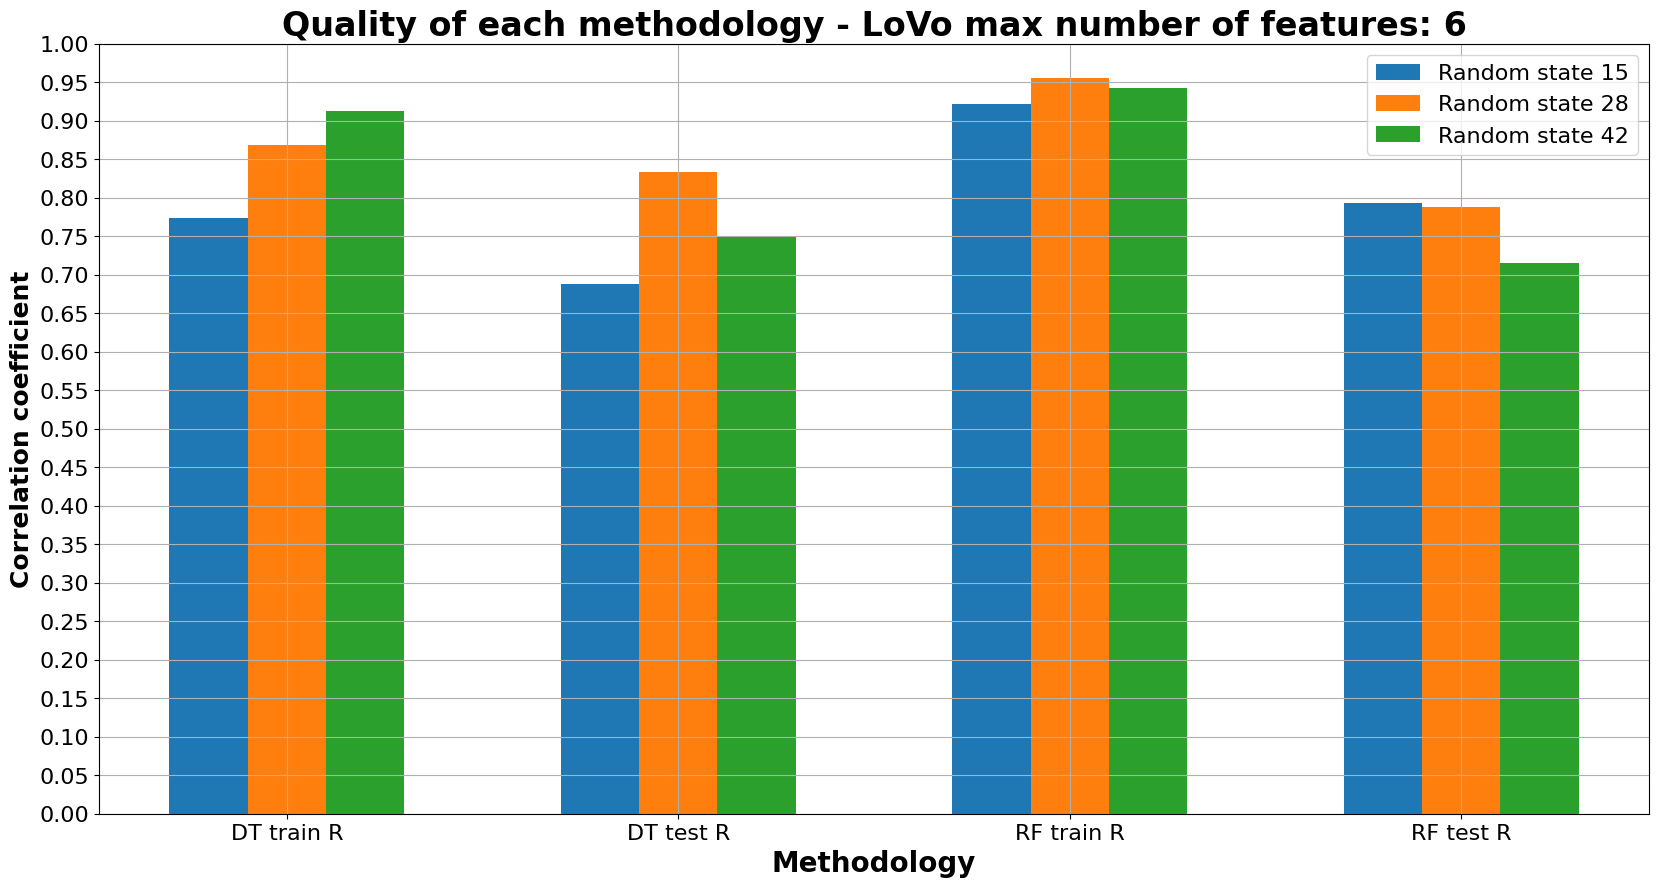

Random state - 15 ('DT - number of features used: 6.0', 'RF - number of features used: 5.0')
Random state - 28 ('DT - number of features used: 3.0', 'RF - number of features used: 6.0')
Random state - 42 ('DT - number of features used: 3.0', 'RF - number of features used: 5.0')
[0.7738495519932647, 0.6881453471088331, 0.9218472144749, 0.7937730901899727]
[0.8682412855125715, 0.8337432078795763, 0.9549618967523424, 0.7874289926703334]
[0.9121710628859598, 0.7499171098832387, 0.9423441595215349, 0.7153725648027842]


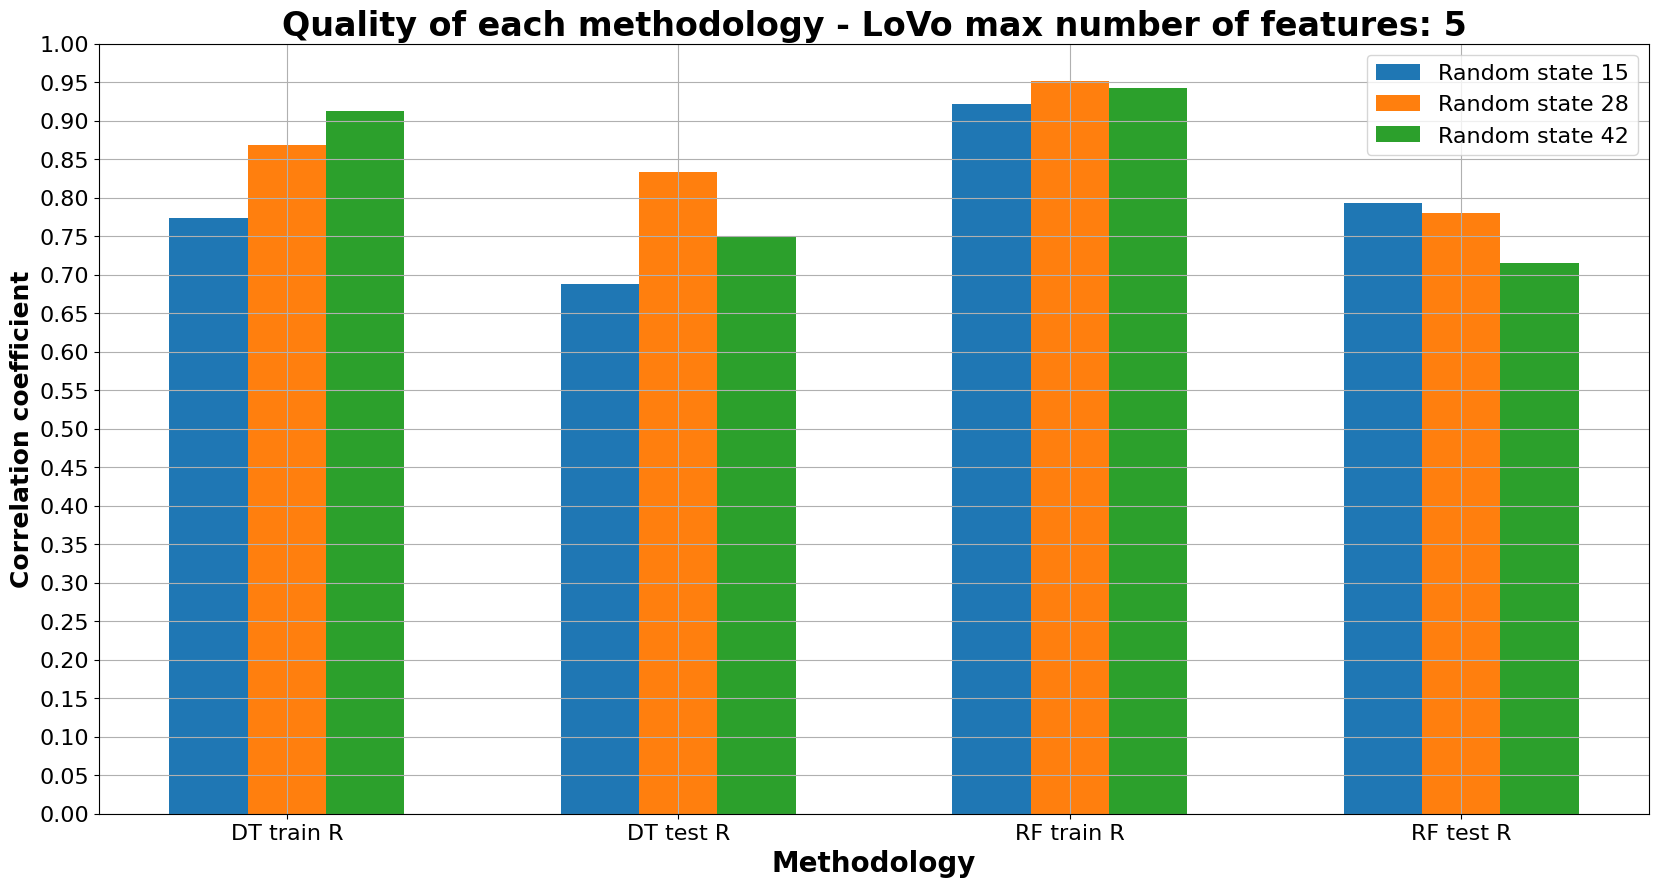

Random state - 15 ('DT - number of features used: 5.0', 'RF - number of features used: 5.0')
Random state - 28 ('DT - number of features used: 3.0', 'RF - number of features used: 5.0')
Random state - 42 ('DT - number of features used: 3.0', 'RF - number of features used: 5.0')
[0.7738495519932644, 0.688145347108833, 0.9218472144749, 0.7937730901899727]
[0.8682412855125715, 0.8337432078795763, 0.95161256233916, 0.780370388796789]
[0.9121710628859598, 0.7499171098832387, 0.9423441595215349, 0.7153725648027842]


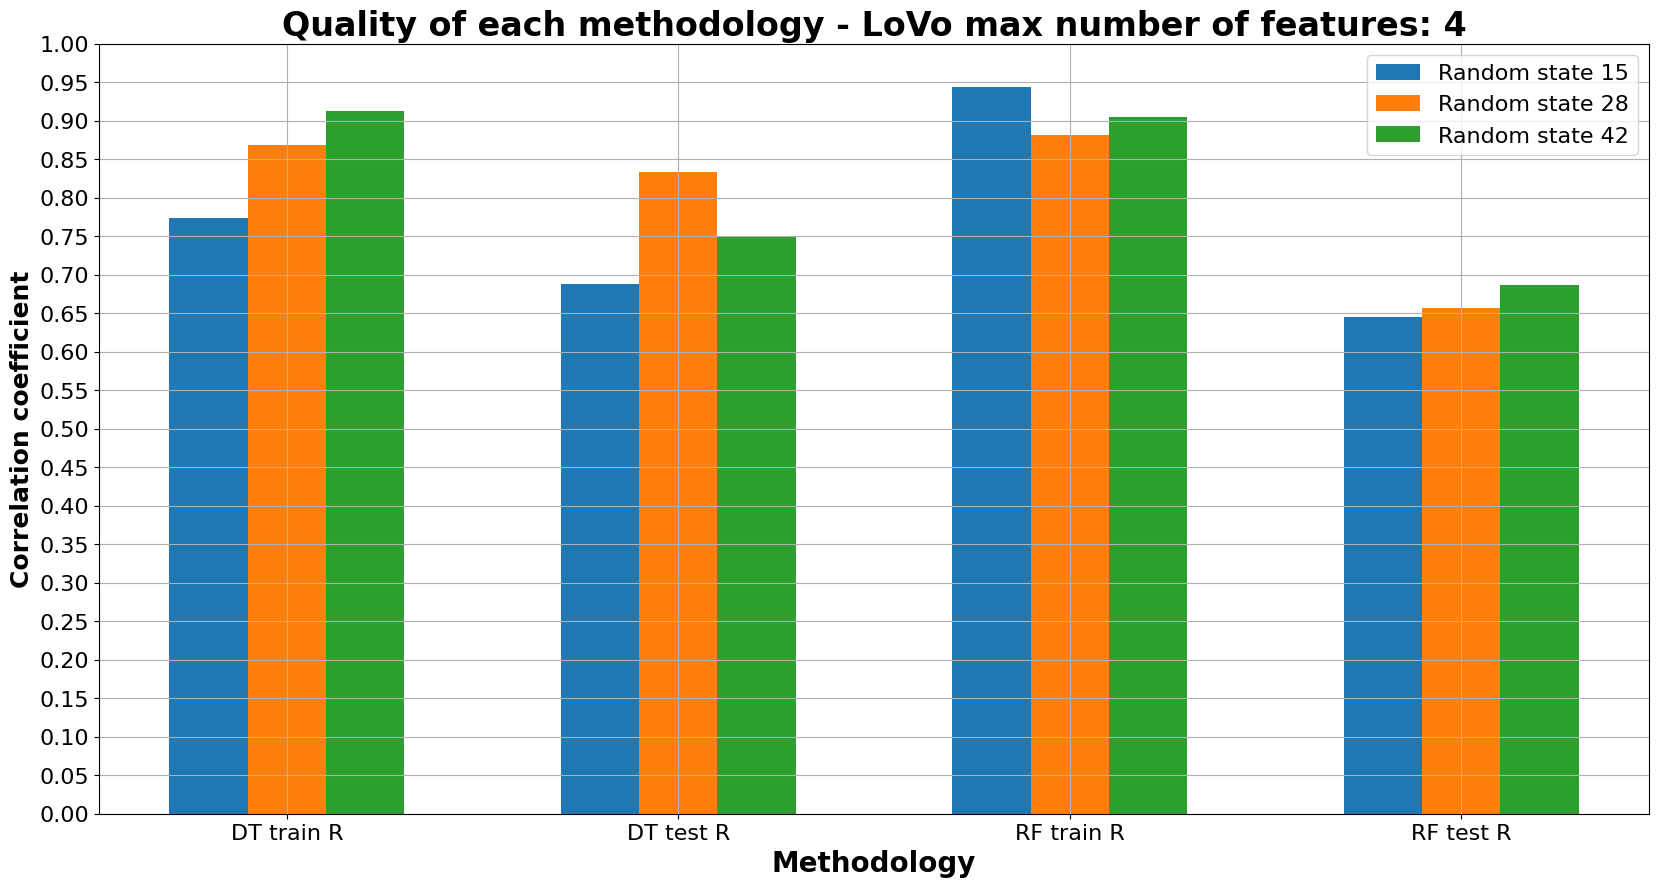

Random state - 15 ('DT - number of features used: 3.0', 'RF - number of features used: 3.0')
Random state - 28 ('DT - number of features used: 3.0', 'RF - number of features used: 2.0')
Random state - 42 ('DT - number of features used: 3.0', 'RF - number of features used: 2.0')
[0.7738495519932647, 0.6881453471088325, 0.9435896757858103, 0.6450408235184336]
[0.8682412855125715, 0.8337432078795763, 0.8811267812945673, 0.6572630628008767]
[0.9121710628859598, 0.7499171098832387, 0.9053674539315217, 0.6872057325646179]


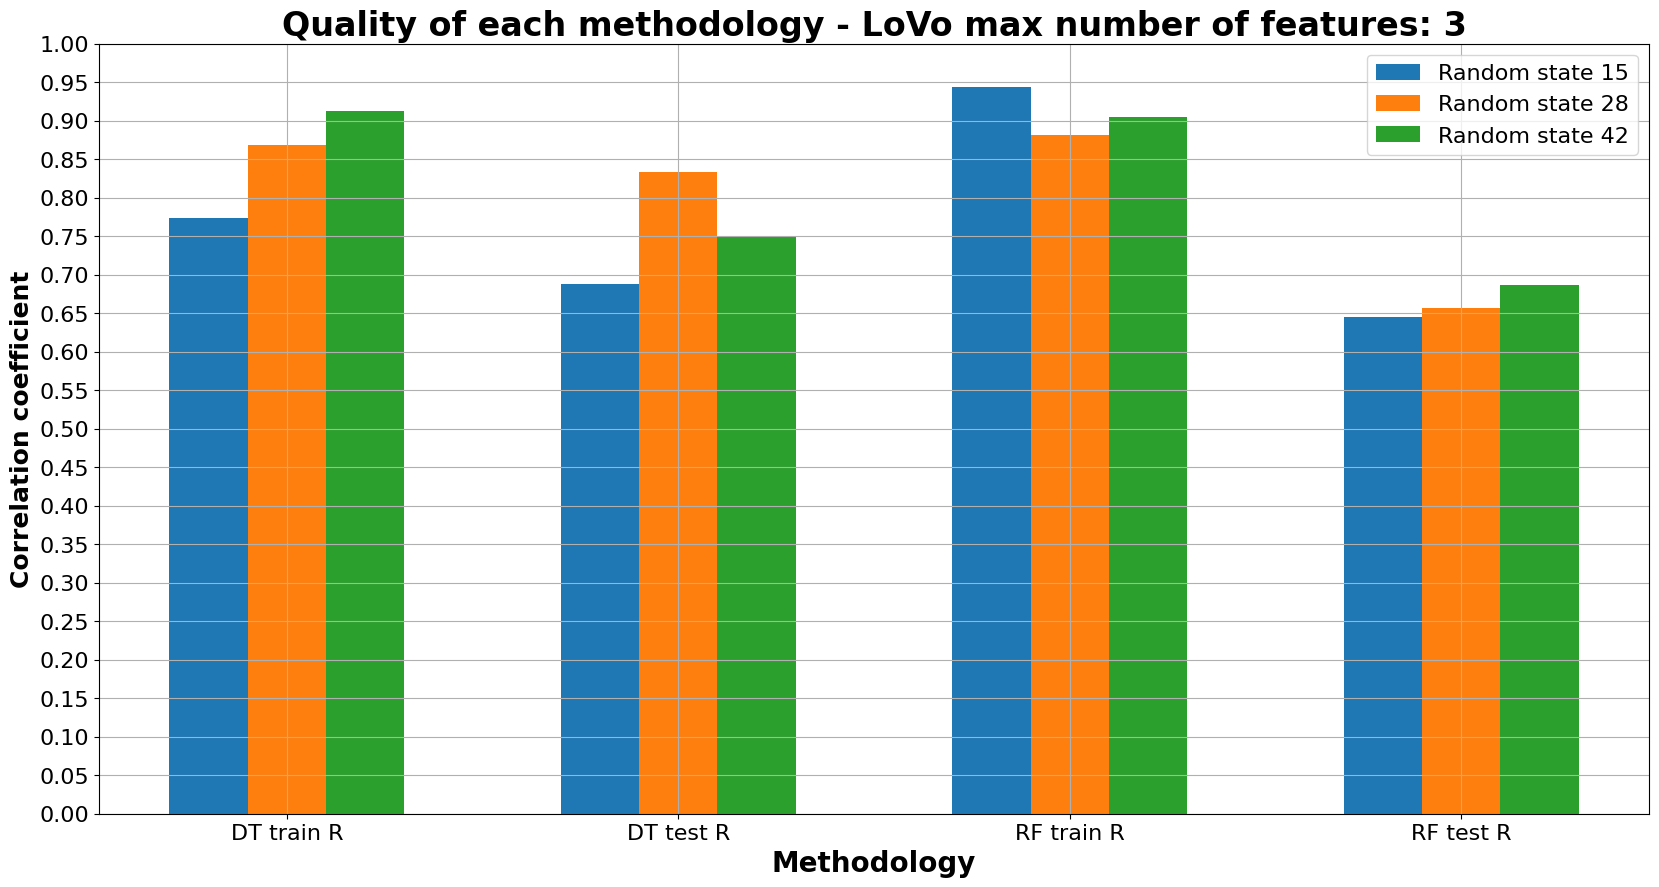

Random state - 15 ('DT - number of features used: 3.0', 'RF - number of features used: 3.0')
Random state - 28 ('DT - number of features used: 3.0', 'RF - number of features used: 2.0')
Random state - 42 ('DT - number of features used: 3.0', 'RF - number of features used: 2.0')
[0.7738495519932647, 0.6881453471088325, 0.9435896757858103, 0.6450408235184336]
[0.8682412855125715, 0.8337432078795763, 0.8811267812945673, 0.6572630628008767]
[0.9121710628859598, 0.7499171098832387, 0.9053674539315217, 0.6872057325646179]


In [21]:
for i in range(8, 2, -1):
    x = prepare_best_plot('LoVo', i)
    prepare_plot(x, 'LoVo', i)
    print(handle_negative_corr(x[0]))
    print(handle_negative_corr(x[1]))
    print(handle_negative_corr(x[2]))

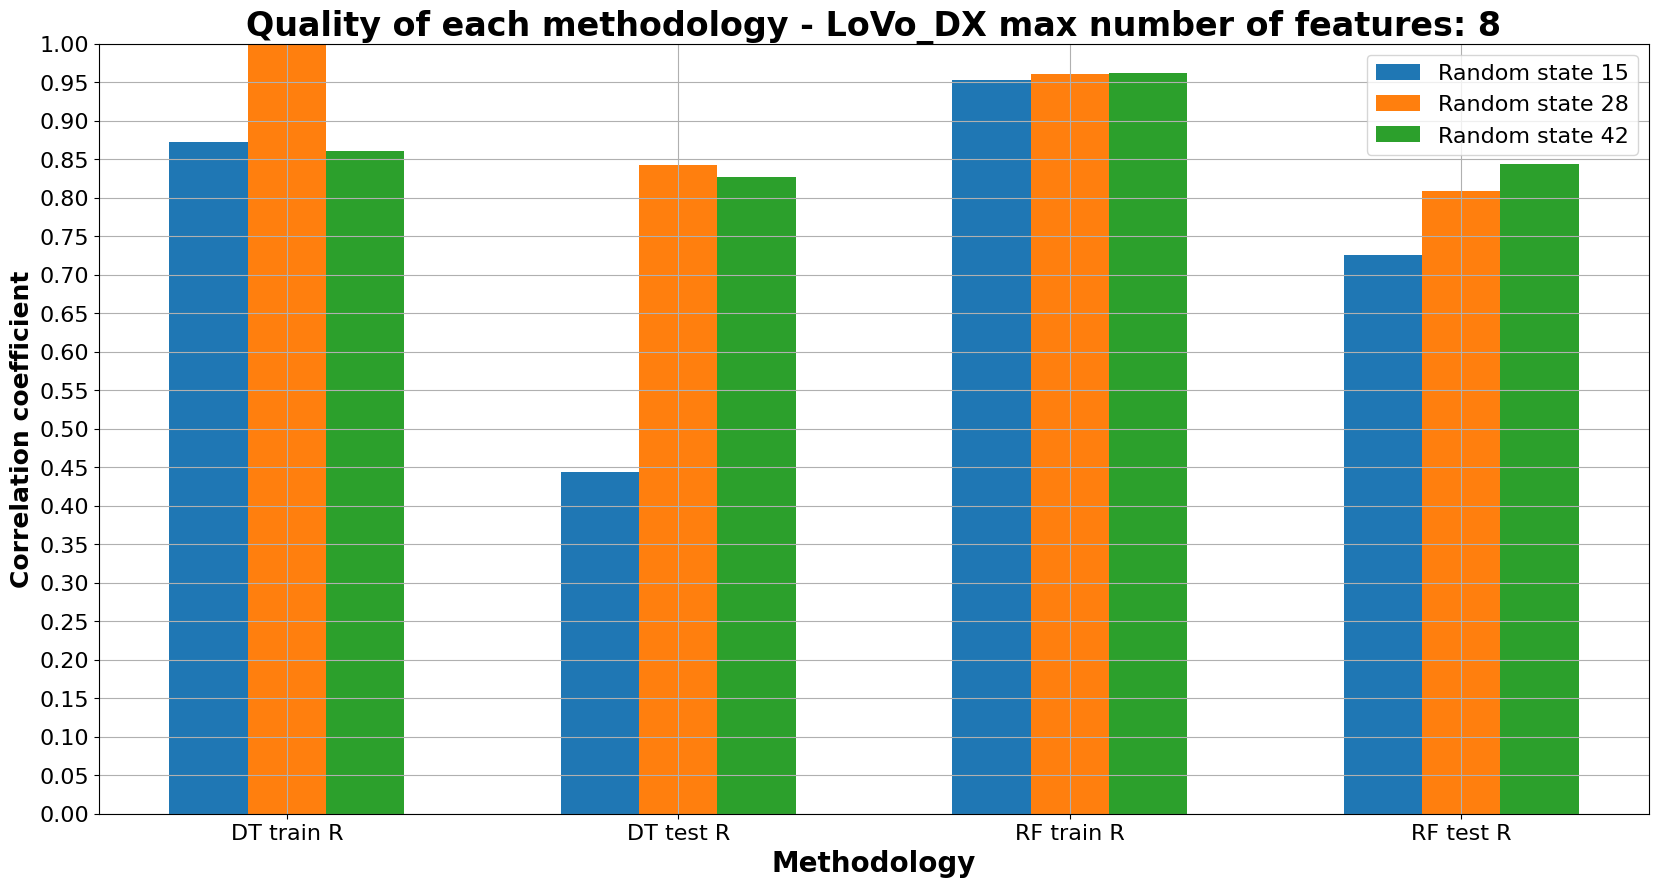

Random state - 15 ('DT - number of features used: 7.0', 'RF - number of features used: 8.0')
Random state - 28 ('DT - number of features used: 5.0', 'RF - number of features used: 8.0')
Random state - 42 ('DT - number of features used: 7.0', 'RF - number of features used: 7.0')
[0.8724994277322107, 0.44416679666061354, 0.9531465584369622, 0.7258930436657147]
[0.9998881595139364, 0.8430877655864321, 0.9608248729709339, 0.8093430351511413]
[0.8607935732823858, 0.8271783219542648, 0.9614894965852848, 0.8437279214475684]


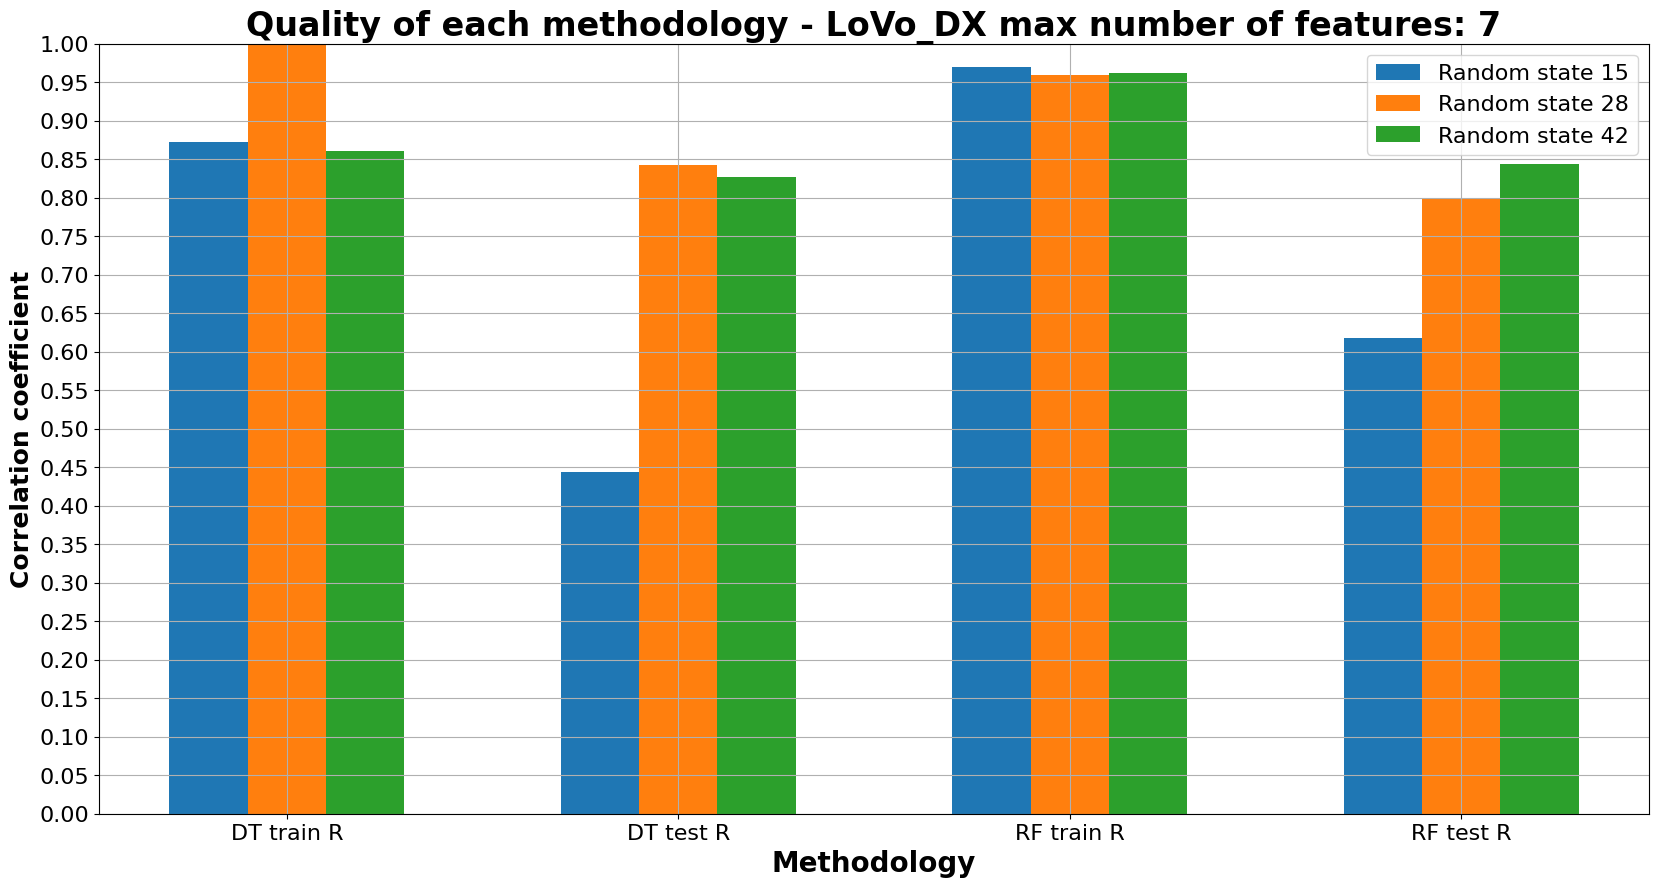

Random state - 15 ('DT - number of features used: 7.0', 'RF - number of features used: 7.0')
Random state - 28 ('DT - number of features used: 5.0', 'RF - number of features used: 7.0')
Random state - 42 ('DT - number of features used: 7.0', 'RF - number of features used: 7.0')
[0.8724994277322107, 0.44416679666061354, 0.9701730613127154, 0.6181792070920507]
[0.9998881595139364, 0.8430877655864321, 0.95913927288201, 0.7997866699043976]
[0.8607935732823858, 0.8271783219542648, 0.9614894965852848, 0.8437279214475684]


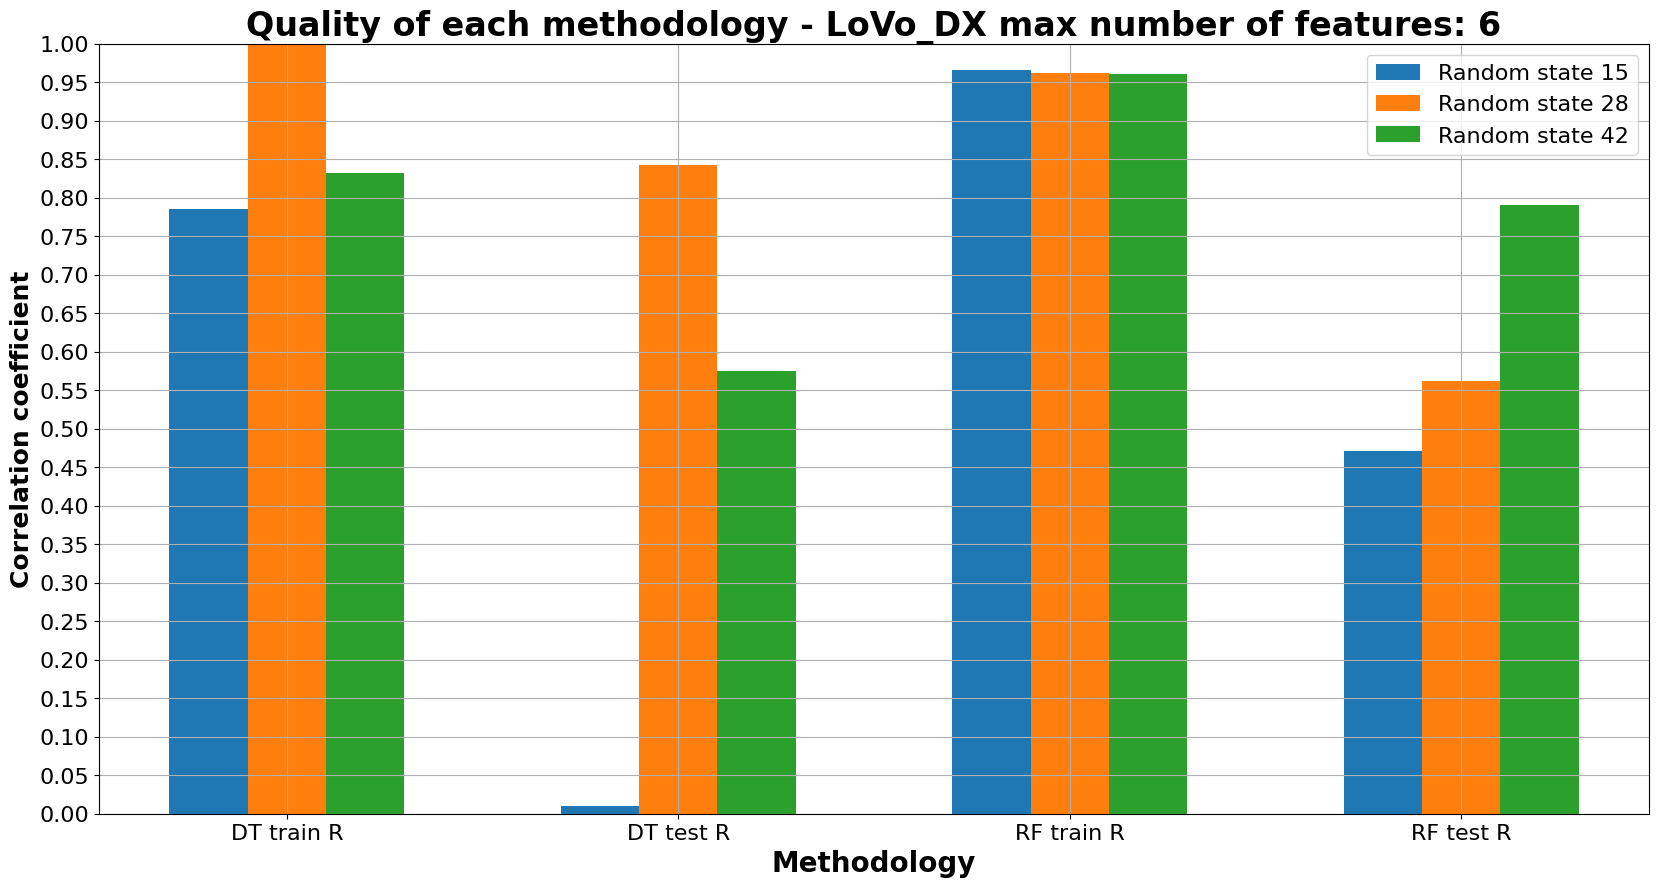

Random state - 15 ('DT - number of features used: 5.0', 'RF - number of features used: 5.0')
Random state - 28 ('DT - number of features used: 5.0', 'RF - number of features used: 5.0')
Random state - 42 ('DT - number of features used: 5.0', 'RF - number of features used: 5.0')
[0.7851394944455857, 0.01, 0.965938844054454, 0.4715560592926372]
[0.9998881595139364, 0.8430877655864321, 0.9619512068981969, 0.5614693906239112]
[0.832498347961302, 0.5745589174162089, 0.9610074984048745, 0.790562123545645]


In [22]:
for i in range(8, 5, -1):
    x = prepare_best_plot('LoVo_DX', i)
    prepare_plot(x, 'LoVo_DX', i)
    print(handle_negative_corr(x[0]))
    print(handle_negative_corr(x[1]))
    print(handle_negative_corr(x[2]))

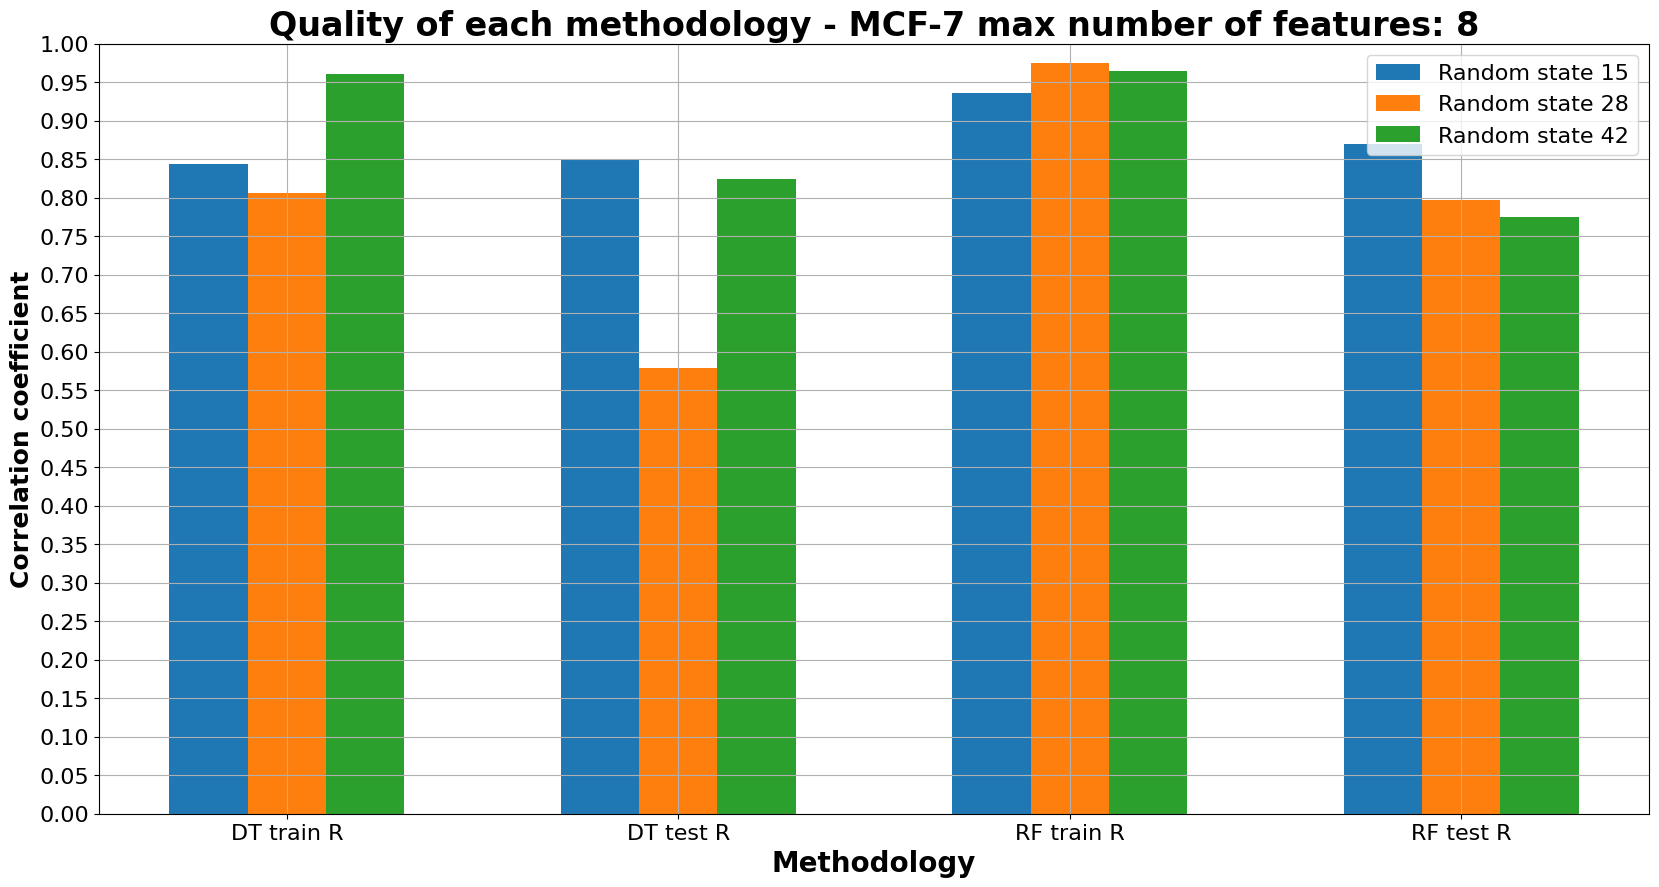

Random state - 15 ('DT - number of features used: 6.0', 'RF - number of features used: 8.0')
Random state - 28 ('DT - number of features used: 4.0', 'RF - number of features used: 8.0')
Random state - 42 ('DT - number of features used: 8.0', 'RF - number of features used: 8.0')
[0.8435310621038742, 0.8490631015009857, 0.9361673240230982, 0.8695068587619961]
[0.8067266275260266, 0.5788863720704619, 0.9745022739926398, 0.7974479201634584]
[0.9607100088789956, 0.8246123913884399, 0.9643673177108916, 0.7746407763544272]


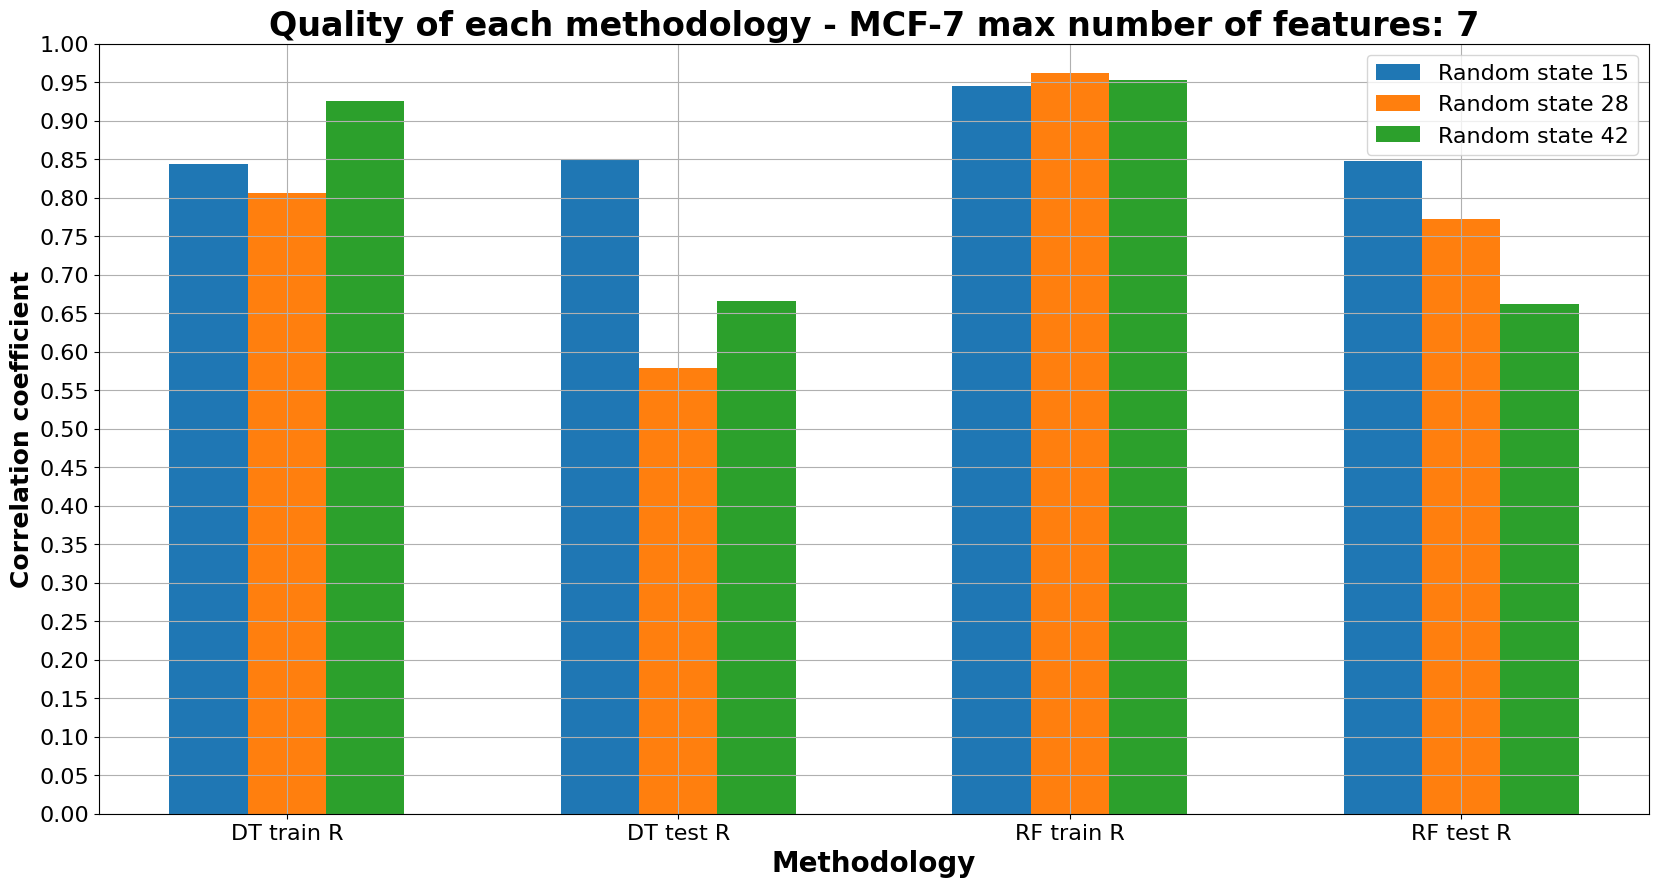

Random state - 15 ('DT - number of features used: 6.0', 'RF - number of features used: 6.0')
Random state - 28 ('DT - number of features used: 4.0', 'RF - number of features used: 6.0')
Random state - 42 ('DT - number of features used: 6.0', 'RF - number of features used: 6.0')
[0.8435310621038742, 0.8490631015009857, 0.945156244145722, 0.8470828152088354]
[0.8067266275260266, 0.5788863720704619, 0.9622709929006865, 0.7725823523082598]
[0.9250974432855168, 0.6663870801375169, 0.9527501485389981, 0.6624039809877339]


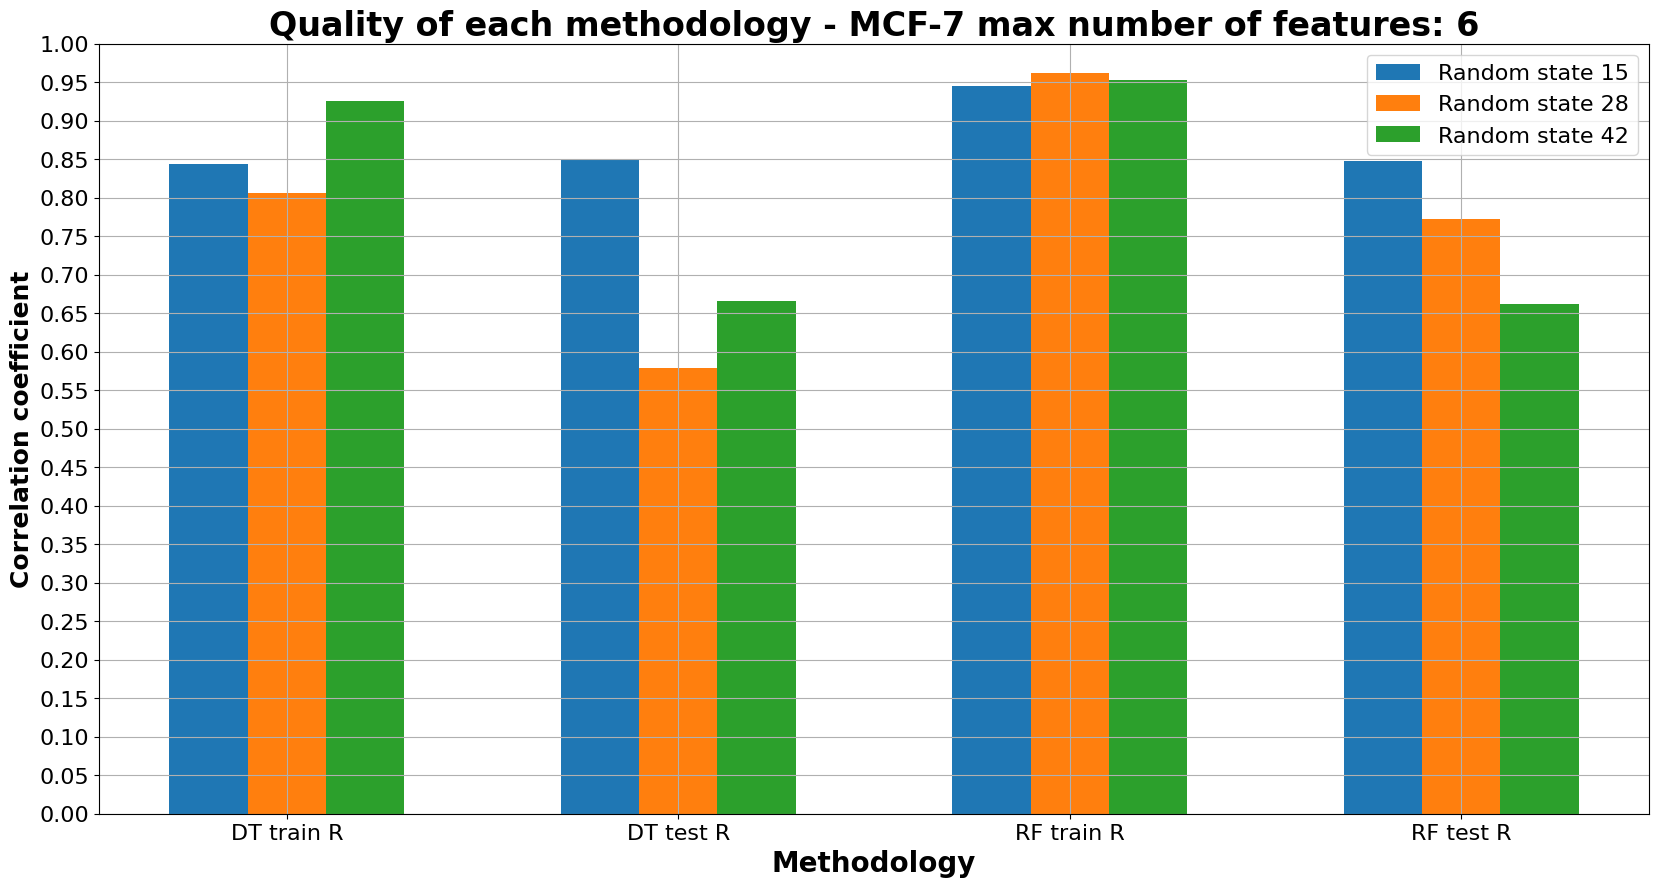

Random state - 15 ('DT - number of features used: 6.0', 'RF - number of features used: 6.0')
Random state - 28 ('DT - number of features used: 4.0', 'RF - number of features used: 6.0')
Random state - 42 ('DT - number of features used: 6.0', 'RF - number of features used: 6.0')
[0.8435310621038742, 0.8490631015009857, 0.945156244145722, 0.8470828152088354]
[0.8067266275260266, 0.5788863720704619, 0.9622709929006865, 0.7725823523082598]
[0.9250974432855168, 0.6663870801375169, 0.9527501485389981, 0.6624039809877339]


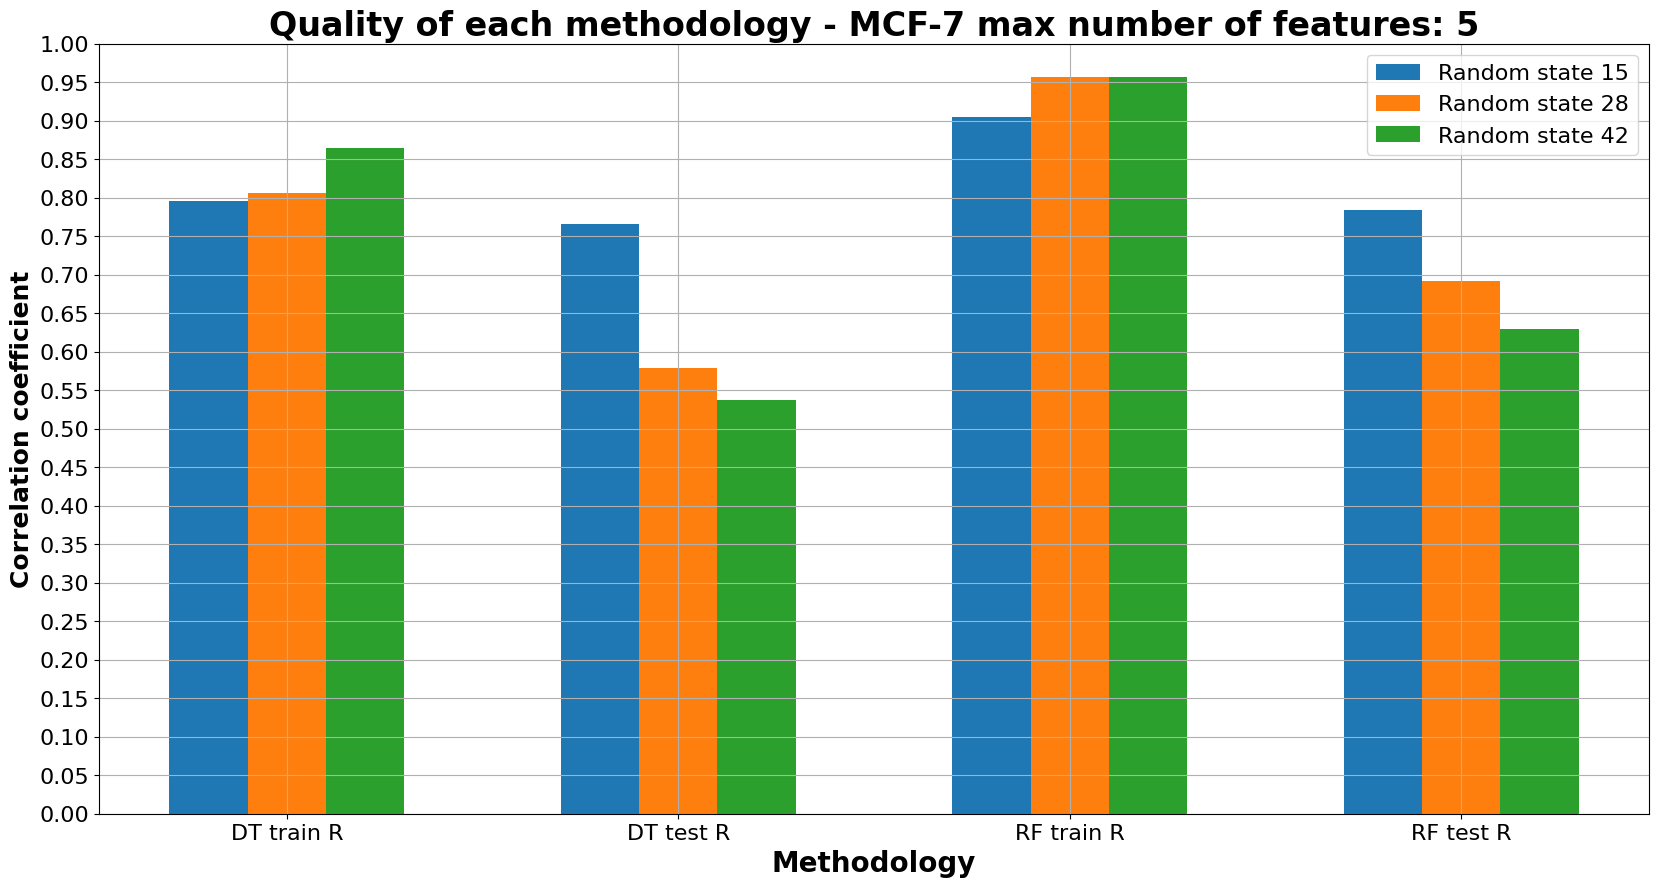

Random state - 15 ('DT - number of features used: 4.0', 'RF - number of features used: 4.0')
Random state - 28 ('DT - number of features used: 4.0', 'RF - number of features used: 4.0')
Random state - 42 ('DT - number of features used: 4.0', 'RF - number of features used: 4.0')
[0.7959369681181857, 0.7660302989047363, 0.9051955244679118, 0.7837627386732194]
[0.8067266275260266, 0.5788863720704619, 0.9563828487646977, 0.6924899356899538]
[0.8646854500902919, 0.5371299141302905, 0.956767076965924, 0.6292292538599767]


In [23]:
for i in range(8, 4, -1):
    x = prepare_best_plot('MCF-7', i)
    prepare_plot(x, 'MCF-7', i)
    print(handle_negative_corr(x[0]))
    print(handle_negative_corr(x[1]))
    print(handle_negative_corr(x[2]))

## Best models plot

Comments: (see different random states for each model)

- A549 -> random state 15, 5 features DT, 5 features RF
1. MLR (0.65, 0.55) -> 3 features
2. DT (0.92, 0.84) -> 5 features
3. RF (0.92, 0.82) -> 5 features
4. KNN (0.77, 0.83) -> 5 features
5. SVM (0.64, 0.18) -> 3 features

- BALB/3T3 -> random state 42, 6 features RF
1. MLR (0.73, 0.01) -> 3 features
2. DT (0.86, 0.75) -> 6 features
3. RF (0.93, 0.85) -> 6 features
4. KNN (0.77, 0.22) -> 3 features
5. SVM (0.68, 0.17) -> 3 features

- LoVo -> random state 28, 2 features RF
1. MLR (0.69, 0.40) -> 3 features
2. DT (0.94, 0.82) -> 5 features
3. RF (0.85, 0.70) -> 2 features
4. KNN (0.73, 0.38) -> 5 features
5. SVM (0.70, 0.01) -> 5 features

- LoVo/DX -> random state 42, 5 features RF
1. MLR (0.82, 0.78) -> 7 features
2. DT (0.86, 0.84) -> 7 features
3. RF (0.96, 0.83) -> 5 features
4. KNN (0.81, 0.01) -> 5 features
5. SVM (0.70, 0.63) -> 5 features

- MCF-7 -> random state 15, 4 features RF
1. MLR (0.70, 0.61) -> 4 features
2. DT (0.92, 0.53) -> 4 features
3. RF (0.91, 0.65) -> 4 features
4. KNN (0.70, 0.75) -> 4 features
5. SVM (0.69, 0.53) -> 4 features

In [24]:
df_a549 = pd.read_excel('../Data/Quality_A549_15_.xlsx', sheet_name='RF')
df_a549 = df_a549[df_a549['Number of features'] == 5]
df_a549['Training data R score'] = handle_negative_corr(df_a549['Training data R^2 score'])
df_a549['Test data R score'] = handle_negative_corr(df_a549['Test data R^2 score'])
df_a549

Unnamed: 0  Correlation threshold  Training data R^2 score  \
323         323                   0.50                 0.852952   
324         324                   0.50                 0.860201   
325         325                   0.50                 0.865749   
326         326                   0.50                 0.887848   
327         327                   0.50                 0.888773   
328         328                   0.50                 0.892504   
329         329                   0.50                 0.908859   
330         330                   0.50                 0.909170   
331         331                   0.50                 0.913283   
332         332                   0.50                 0.918630   
333         333                   0.50                 0.917600   
334         334                   0.50                 0.915991   
335         335                   0.50                 0.921486   
336         336                   0.50                 0.924538   
337         337                   0.50                 0.921465   
338         338                   0.50                 0.922737   
339         339                   0.50                 0.924854   
340         340                   0.50                 0.927070   
341         341                   0.50                 0.920711   
342         342                   0.51                 0.852952   
343         343                   0.51                 0.860201   
344         344                   0.51                 0.865749   
345         345                   0.51                 0.887848   
346         346                   0.51                 0.888773   
347         347                   0.51                 0.892504   
348         348                   0.51                 0.908859   
349         349                   0.51                 0.909170   
350         350                   0.51                 0.913283   
351         351                   0.51                 0.918630   
352         352                   0.51                 0.917600   
353         353                   0.51                 0.915991   
354         354                   0.51                 0.921486   
355         355                   0.51                 0.924538   
356         356                   0.51                 0.921465   
357         357                   0.51                 0.922737   
358         358                   0.51                 0.924854   
359         359                   0.51                 0.927070   
360         360                   0.51                 0.920711   

     Test data R^2 score  Training RMSE  Test RMSE  Number of features  \
323             0.693940       0.357987   0.573479                   5   
324             0.699356       0.349052   0.568382                   5   
325             0.668966       0.342057   0.596418                   5   
326             0.623941       0.312638   0.635685                   5   
327             0.648644       0.311347   0.614452                   5   
328             0.672695       0.306080   0.593049                   5   
329             0.683983       0.281835   0.582732                   5   
330             0.668412       0.281354   0.596917                   5   
331             0.710288       0.274910   0.557952                   5   
332             0.703868       0.266300   0.564101                   5   
333             0.707403       0.267980   0.560723                   5   
334             0.732924       0.270583   0.535712                   5   
335             0.736283       0.261585   0.532333                   5   
336             0.734897       0.256449   0.533730                   5   
337             0.729516       0.261619   0.539119                   5   
338             0.743151       0.259492   0.525356                   5   
339             0.739241       0.255913   0.529339                   5   
340             0.734946       0.252110   0.533681         

In [25]:
df_ = pd.read_excel('../Data/Quality_BALB_3T3_42_.xlsx', sheet_name='RF')
df_ = df_[df_['Number of features'] == 6]
df_['Training data R score'] = handle_negative_corr(df_['Training data R^2 score'])
df_['Test data R score'] = handle_negative_corr(df_['Test data R^2 score'])
df_

Unnamed: 0  Correlation threshold  Training data R^2 score  \
342         342                   0.51                 0.869233   
343         343                   0.51                 0.923683   
344         344                   0.51                 0.934524   
345         345                   0.51                 0.937457   
346         346                   0.51                 0.929701   
347         347                   0.51                 0.940844   
348         348                   0.51                 0.945992   
349         349                   0.51                 0.943862   
350         350                   0.51                 0.940881   
351         351                   0.51                 0.940214   
352         352                   0.51                 0.939011   
353         353                   0.51                 0.939990   
354         354                   0.51                 0.941761   
355         355                   0.51                 0.945607   
356         356                   0.51                 0.946995   
357         357                   0.51                 0.948830   
358         358                   0.51                 0.946417   
359         359                   0.51                 0.944971   
360         360                   0.51                 0.943980   

     Test data R^2 score  Training RMSE  Test RMSE  Number of features  \
342             0.716186       0.318598   0.424152                   6   
343             0.597886       0.243391   0.504870                   6   
344             0.681066       0.225443   0.449630                   6   
345             0.701507       0.220334   0.434983                   6   
346             0.675674       0.233598   0.453414                   6   
347             0.604822       0.214286   0.500497                   6   
348             0.648896       0.204749   0.471762                   6   
349             0.649432       0.208749   0.471401                   6   
350             0.665910       0.214219   0.460189                   6   
351             0.664213       0.215424   0.461356                   6   
352             0.683600       0.217581   0.447840                   6   
353             0.657975       0.215827   0.465622                   6   
354             0.616112       0.212619   0.493295                   6   
355             0.597845       0.205478   0.504895                   6   
356             0.570470       0.202840   0.521797                   6   
357             0.577984       0.199298   0.517213                   6   
358             0.591313       0.203942   0.508979                   6   
359             0.588724       0.206677   0.510589                   6   
360             0.591825       0.208528   0.508661                   6   

     Number of estimators  Training data R score  Test data R score  
342                     2               0.932327           0.846278  
343                     3               0.961084           0.773231  
344                     4               0.966708           0.825268  
345                     5               0.968224           0.837560  
346                     6               0.964210           0.821994  
347                     7               0.969971           0.777703  
348                     8               0.972621           0.805541  
349                     9               0.971525           0.805873  
350                    10               0.969990           0.816033  
351                    11               0.969646           0.814993  
352                    12               0.969026           0.826801  
353                    13               0.969531           0.811157  
354                    14               0.970444           0.784928  
355                    15               0.972423           0.773204  
356                    16               0.973136           0.755294  
357                    17               0.974079           0.76

In [26]:
df_ = pd.read_excel('../Data/Quality_LoVo_28_.xlsx', sheet_name='RF')
df_ = df_[df_['Number of features'] == 2]
df_['Training data R score'] = handle_negative_corr(df_['Training data R^2 score'])
df_['Test data R score'] = handle_negative_corr(df_['Test data R^2 score'])
df_

Unnamed: 0  Correlation threshold  Training data R^2 score  \
380         380                   0.53                 0.726452   
381         381                   0.53                 0.730699   
382         382                   0.53                 0.729826   
383         383                   0.53                 0.755753   
384         384                   0.53                 0.772016   
385         385                   0.53                 0.771714   
386         386                   0.53                 0.773504   
387         387                   0.53                 0.772194   
388         388                   0.53                 0.770797   
389         389                   0.53                 0.777861   
390         390                   0.53                 0.780498   
391         391                   0.53                 0.779444   
392         392                   0.53                 0.783158   
393         393                   0.53                 0.778982   
394         394                   0.53                 0.780691   
395         395                   0.53                 0.781139   
396         396                   0.53                 0.776384   
397         397                   0.53                 0.775154   
398         398                   0.53                 0.775951   
399         399                   0.54                 0.726452   
400         400                   0.54                 0.730699   
401         401                   0.54                 0.729826   
402         402                   0.54                 0.755753   
403         403                   0.54                 0.772016   
404         404                   0.54                 0.771714   
405         405                   0.54                 0.773504   
406         406                   0.54                 0.772194   
407         407                   0.54                 0.770797   
408         408                   0.54                 0.777861   
409         409                   0.54                 0.780498   
410         410                   0.54                 0.779444   
411         411                   0.54                 0.783158   
412         412                   0.54                 0.778982   
413         413                   0.54                 0.780691   
414         414                   0.54                 0.781139   
415         415                   0.54                 0.776384   
416         416                   0.54                 0.775154   
417         417                   0.54                 0.775951   

     Test data R^2 score  Training RMSE  Test RMSE  Number of features  \
380             0.267403       0.490898   0.573263                   2   
381             0.199666       0.487072   0.599180                   2   
382             0.237774       0.487861   0.584741                   2   
383             0.311228       0.463862   0.555852                   2   
384             0.352617       0.448153   0.538893                   2   
385             0.376864       0.448449   0.528704                   2   
386             0.352702       0.446688   0.538857                   2   
387             0.319981       0.447978   0.552309                   2   
388             0.336020       0.449349   0.545757                   2   
389             0.334133       0.442371   0.546531                   2   
390             0.299672       0.439737   0.560496                   2   
391             0.317294       0.440791   0.553399                   2   
392             0.339342       0.437064   0.544390                   2   
393             0.395078       0.441253   0.520920                   2   
394             0.403927       0.439544   0.517096                   2   
395             0.403071       0.439095   0.517467                   2   
396             0.431995       0.443838   0.504775                   2   
397             0.404526       0.445058   0.516836         

In [27]:
df_ = pd.read_excel('../Data/Quality_LoVo_DX_42_.xlsx', sheet_name='RF')
df_ = df_[df_['Number of features'] == 5]
df_['Training data R score'] = handle_negative_corr(df_['Training data R^2 score'])
df_['Test data R score'] = handle_negative_corr(df_['Test data R^2 score'])
df_

Unnamed: 0  Correlation threshold  Training data R^2 score  \
570         570                   0.63                 0.849392   
571         571                   0.63                 0.877695   
572         572                   0.63                 0.886607   
573         573                   0.63                 0.894969   
574         574                   0.63                 0.904921   
575         575                   0.63                 0.918333   
576         576                   0.63                 0.916942   
577         577                   0.63                 0.923954   
578         578                   0.63                 0.918480   
579         579                   0.63                 0.920255   
580         580                   0.63                 0.916592   
581         581                   0.63                 0.916344   
582         582                   0.63                 0.923535   
583         583                   0.63                 0.927928   
584         584                   0.63                 0.931174   
585         585                   0.63                 0.934467   
586         586                   0.63                 0.935167   
587         587                   0.63                 0.937938   
588         588                   0.63                 0.937747   

     Test data R^2 score  Training RMSE  Test RMSE  Number of features  \
570             0.290146       0.373186   0.608242                   5   
571             0.320146       0.336297   0.595251                   5   
572             0.387461       0.323813   0.565014                   5   
573             0.467702       0.311645   0.526707                   5   
574             0.516674       0.296513   0.501895                   5   
575             0.530785       0.274806   0.494514                   5   
576             0.617333       0.277136   0.446583                   5   
577             0.602381       0.265179   0.455225                   5   
578             0.586091       0.274558   0.464456                   5   
579             0.563115       0.271552   0.477173                   5   
580             0.592591       0.277719   0.460795                   5   
581             0.612007       0.278132   0.449681                   5   
582             0.624988       0.265908   0.442094                   5   
583             0.607313       0.258158   0.452393                   5   
584             0.616693       0.252278   0.446957                   5   
585             0.605643       0.246168   0.453354                   5   
586             0.608711       0.244850   0.451587                   5   
587             0.602155       0.239559   0.455354                   5   
588             0.598890       0.239929   0.457218                   5   

     Number of estimators  Training data R score  Test data R score  
570                     2               0.921625           0.538652  
571                     3               0.936854           0.565815  
572                     4               0.941598           0.622463  
573                     5               0.946028           0.683888  
574                     6               0.951273           0.718800  
575                     7               0.958297           0.728550  
576                     8               0.957571           0.785706  
577                     9               0.961225           0.776132  
578                    10               0.958374           0.765566  
579                    11               0.959299           0.750410  
580                    12               0.957388           0.769800  
581                    13               0.957258           0.782309  
582                    14               0.961007           0.790562  
583                    15               0.963290           0.779303  
584                    16               0.964973           0.785298  
585                    17               0.966678           0.77

In [28]:
df_ = pd.read_excel('../Data/Quality_MCF-7_15_.xlsx', sheet_name='RF')
df_ = df_[df_['Number of features'] == 4]
df_['Training data R score'] = handle_negative_corr(df_['Training data R^2 score'])
df_['Test data R score'] = handle_negative_corr(df_['Test data R^2 score'])
df_

Unnamed: 0  Correlation threshold  Training data R^2 score  \
323         323                   0.50                 0.823725   
324         324                   0.50                 0.819379   
325         325                   0.50                 0.861725   
326         326                   0.50                 0.861772   
327         327                   0.50                 0.876076   
328         328                   0.50                 0.887302   
329         329                   0.50                 0.891312   
330         330                   0.50                 0.885151   
331         331                   0.50                 0.897883   
332         332                   0.50                 0.900694   
333         333                   0.50                 0.898891   
334         334                   0.50                 0.897355   
335         335                   0.50                 0.903932   
336         336                   0.50                 0.902161   
337         337                   0.50                 0.897602   
338         338                   0.50                 0.901345   
339         339                   0.50                 0.903325   
340         340                   0.50                 0.909007   
341         341                   0.50                 0.910494   
342         342                   0.51                 0.823725   
343         343                   0.51                 0.819379   
344         344                   0.51                 0.861725   
345         345                   0.51                 0.861772   
346         346                   0.51                 0.876076   
347         347                   0.51                 0.887302   
348         348                   0.51                 0.891312   
349         349                   0.51                 0.885151   
350         350                   0.51                 0.897883   
351         351                   0.51                 0.900694   
352         352                   0.51                 0.898891   
353         353                   0.51                 0.897355   
354         354                   0.51                 0.903932   
355         355                   0.51                 0.902161   
356         356                   0.51                 0.897602   
357         357                   0.51                 0.901345   
358         358                   0.51                 0.903325   
359         359                   0.51                 0.909007   
360         360                   0.51                 0.910494   

     Test data R^2 score  Training RMSE  Test RMSE  Number of features  \
323             0.492083       0.390625   0.767939                   4   
324             0.614284       0.395412   0.669213                   4   
325             0.495651       0.345969   0.765237                   4   
326             0.472072       0.345911   0.782920                   4   
327             0.532895       0.327523   0.736440                   4   
328             0.499692       0.312337   0.762165                   4   
329             0.494367       0.306729   0.766211                   4   
330             0.462619       0.315304   0.789899                   4   
331             0.422784       0.297314   0.818652                   4   
332             0.424585       0.293192   0.817374                   4   
333             0.451898       0.295842   0.797739                   4   
334             0.480492       0.298081   0.776652                   4   
335             0.482197       0.288373   0.775377                   4   
336             0.522720       0.291019   0.744418                   4   
337             0.531393       0.297722   0.737623                   4   
338             0.536501       0.292231   0.733593                   4   
339             0.532348       0.289282   0.736871                   4   
340             0.534079       0.280653   0.735506         